# Question 1 - Further Data Understanding

### Importing modules and reading in the data from homework 1

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [183]:
#Load in the updated data file from homework 1

df = pd.read_csv('diarmuid-cleaned-1.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# Q1.1 Fixing mistakes from homework 1

Two mysterious 'unnamed columns' keep appearing in my dataset every time I save it. The customer column is unnecessary. The rows in my dataframe still retain their original identifier, enabling them to be matched with customer ID at a late of date. I these columns here.

In [184]:
#drop the mysterious 'unamed: 0 and unnamed: 0.1' columns, and the redundant 'customer' column
df = df.drop('Unnamed: 0', 1)
df = df.drop('Unnamed: 0.1', 1)
df = df.drop('customer', 1)



In [354]:
print(df.dtypes)

age                             int64
regionType                     object
marriageStatus                 object
children                         bool
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                       bool
currentHandsetPrice           float64
creditRating                   object
homeOwner                        bool
creditCard                       bool
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCus

To make modelling easier, I should convert churn to int64, and make sure that all of my categories are properly given this datatype.

In [6]:
df['income']=df['income'].astype('category')
df['churn']=df['churn'].astype(np.int64)
df['regionType']=df['regionType'].astype('category')
df['creditRating']=df['creditRating'].astype('category')
df['marriageStatus']=df['marriageStatus'].astype('category')

## Q1.2 Splitting the data set into train and test datasets

I found this code on stackoverflow. If randomly creates a 'mask' list of true/false values. Approximately 70% of the values will be true. The mask can be used to split the data set. Though it won't be an exact 70:30 split, it will be close enough

In [7]:

msk = np.random.rand(len(df)) < 0.7

df_train = df[msk]

df_test = df[~msk]

df_train_y = df_train.churn
df_test_y = df_test.churn

In [357]:
print(df_train.shape[0])
print(df_test.shape[0])

514
211


# Q1.3 Plotting correlations for all continuous features

## There was quite a bit of class discussion as to whether or not we could include 'churn' in this correlation matrix

As such, I have made two correlation matrices.

In [13]:
def standfordCorrMatrix(df, columns):
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
#Copied from example  in class lab notebook
    sns.set(style="white")
    corr = df[columns].corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(20, 20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
                square=True, xticklabels=True, yticklabels=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
    plt.yticks(rotation = 0)
    plt.xticks(rotation = 45)
    plt.show()
    plt.clf()

### 'Correlation' matrix with 'churn'

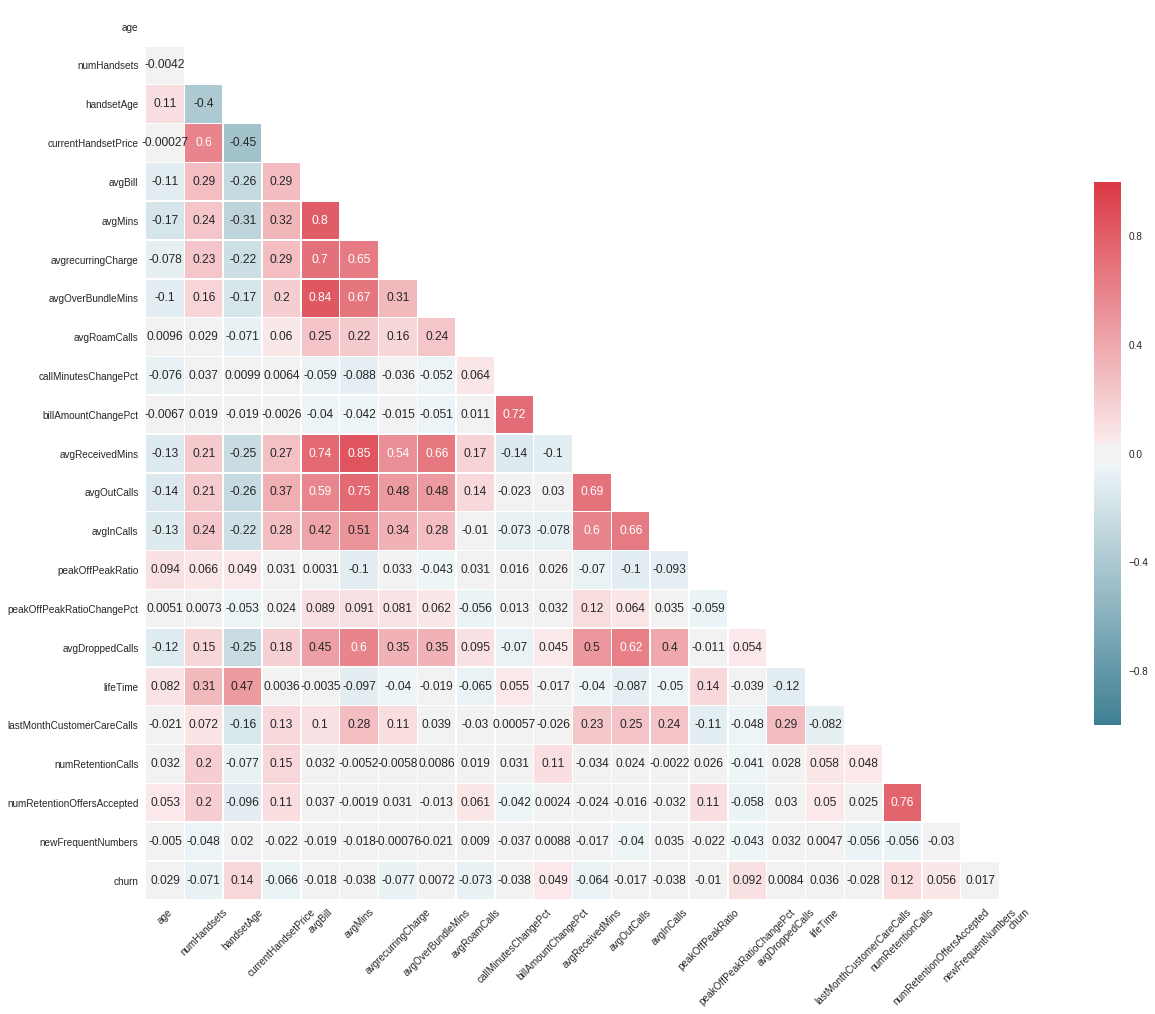

In [16]:
continuous_columns_with_churn = df[['age','numHandsets','handsetAge','currentHandsetPrice', 'avgBill',
                         'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 
                         'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 
                         'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls',
                         'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls',
                         'numRetentionOffersAccepted', 'newFrequentNumbers', 'churn']].columns

standfordCorrMatrix(df_train, continuous_columns_with_churn)

What is interesting for our model here is the small 'correlation' (0.14) between churn and handset age, and also for 0.12 for numRetentionCalls. I am uncertain if the relationship between a continuous variable and a binary target feature can be called a 'correlation'.

However, in the case of handsetAge I think this is worth pursuing further below, as we would expect customers who are thinking of buying a new phone to also consider switching provider.

For 'numRetentionCalls', I know from homework 1 that the number of customers having a non zero value is too small to make this feature of any significant use to a model that predicts churn.

### Correlation matrix without 'churn'

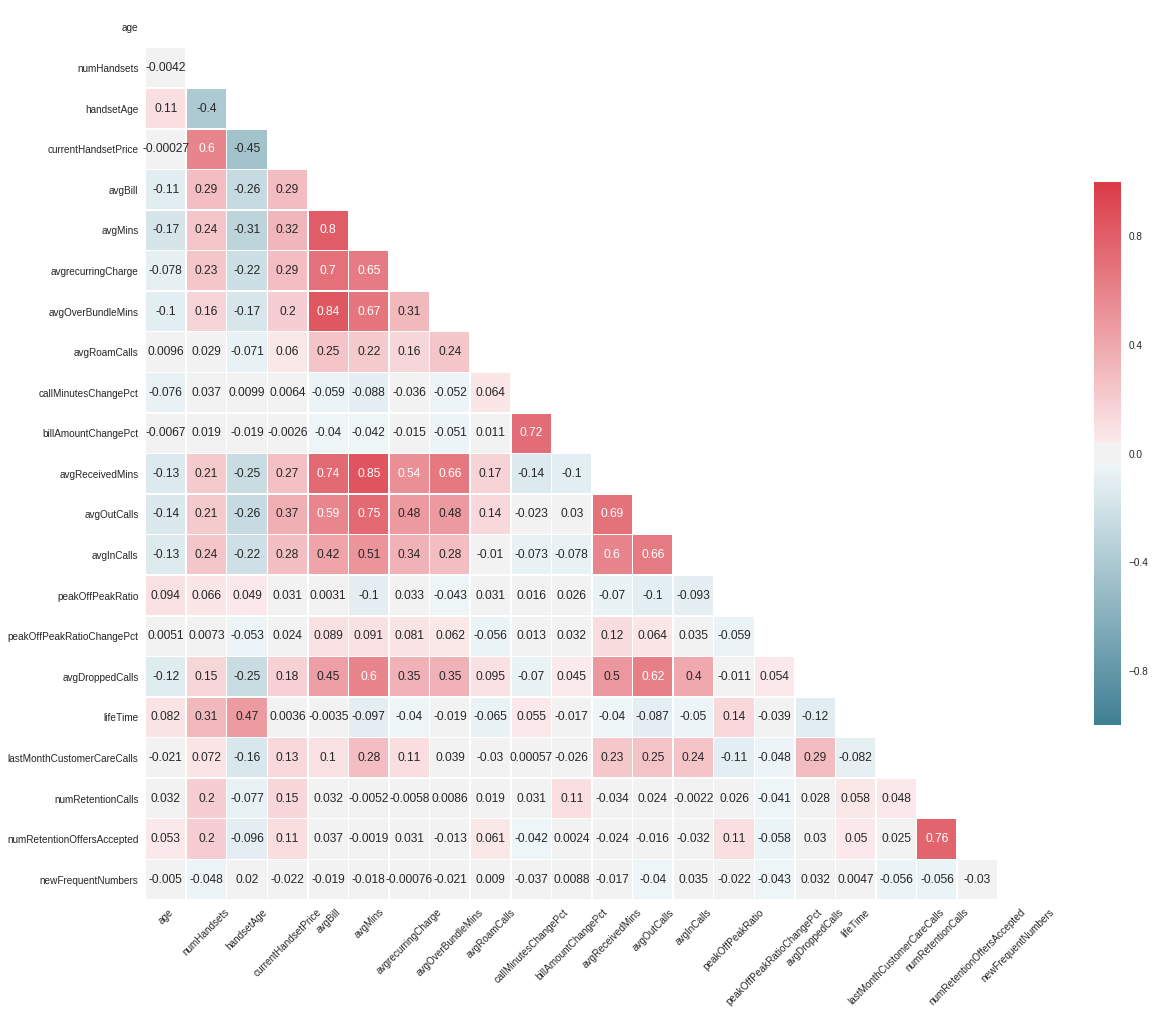

In [14]:
continuous_columns = df[['age','numHandsets','handsetAge','currentHandsetPrice', 'avgBill',
                         'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 
                         'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 
                         'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls',
                         'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls',
                         'numRetentionOffersAccepted', 'newFrequentNumbers']].columns


standfordCorrMatrix(df_train, continuous_columns)

As I discussed in my homweork 1 notebook, there is a high correlation between a number of continuous features. The most significant group is those that refer to the amount a customer has used his phone, and those that refer to how large his/her bill is. There is also an obvious correlation between the number of retention calls made and the number of retention offers accepted - the customer is more likely to accept a retention offer if one is made in the first place. There is a correlation between lifeTime and handsetAge, which is quite self explanatory - for customers who are on their first phone, their lifeTime should directly map with their handsetAge. 

## Plot scatter plots for the correlations of all continuous features

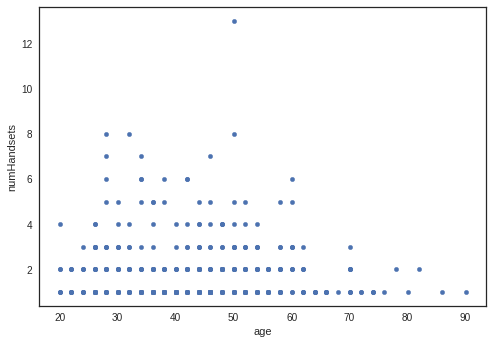

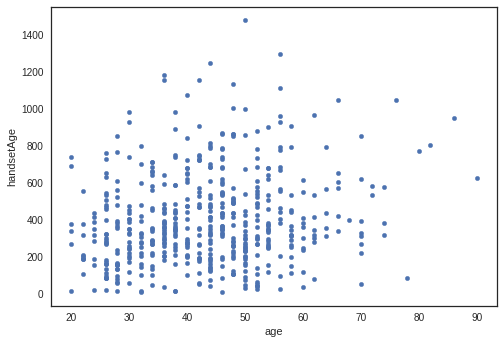

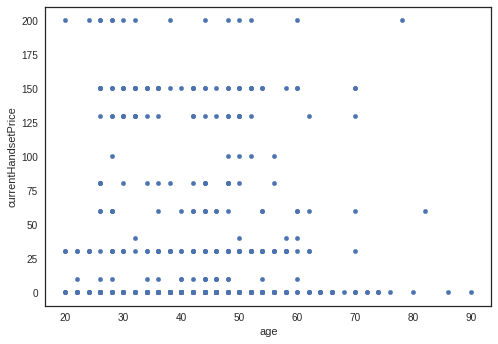

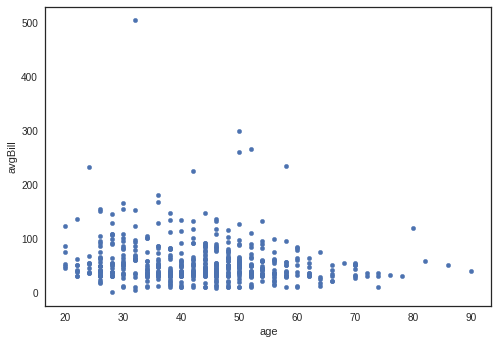

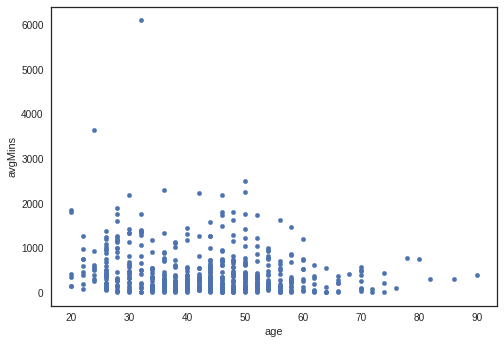

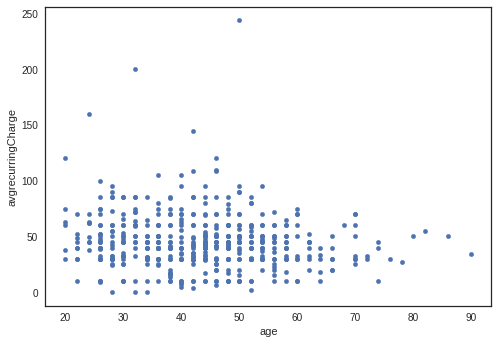

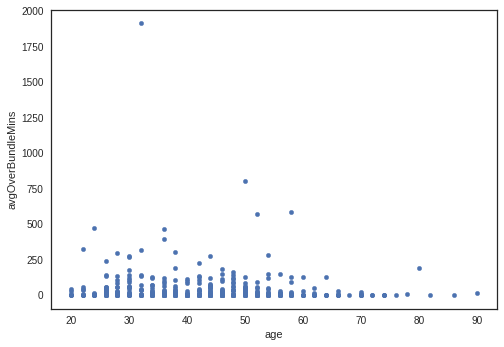

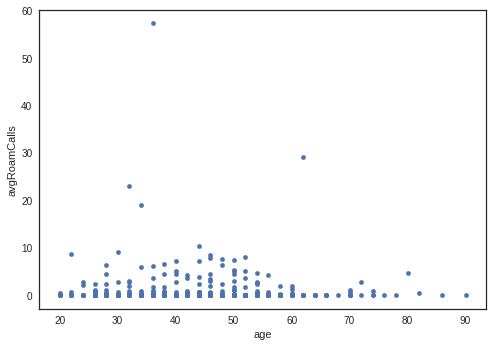

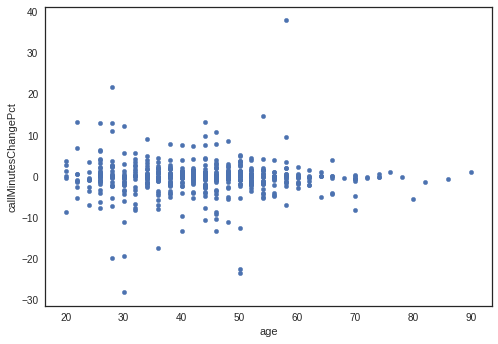

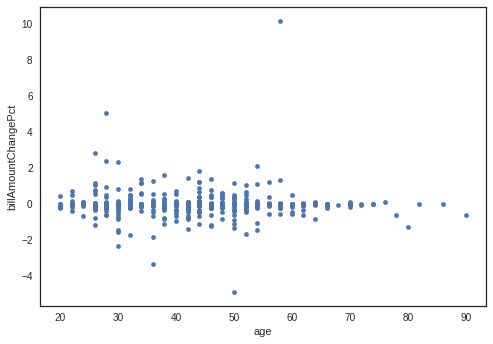

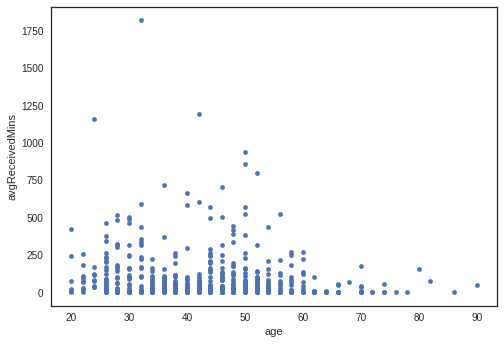

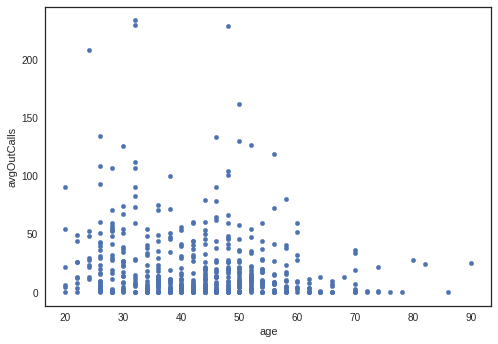

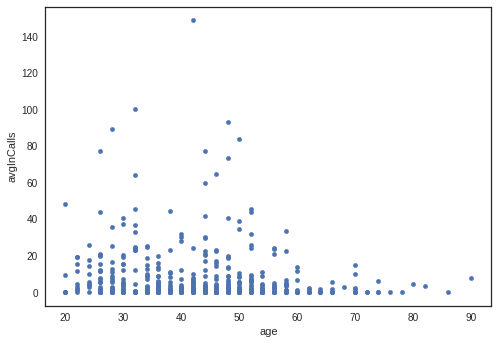

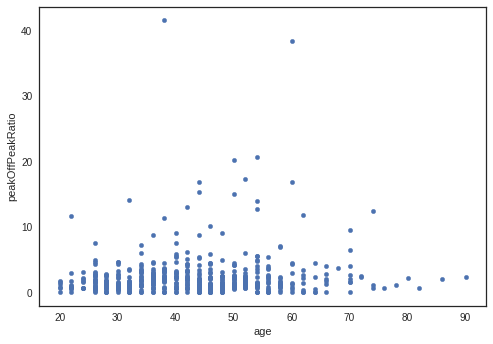

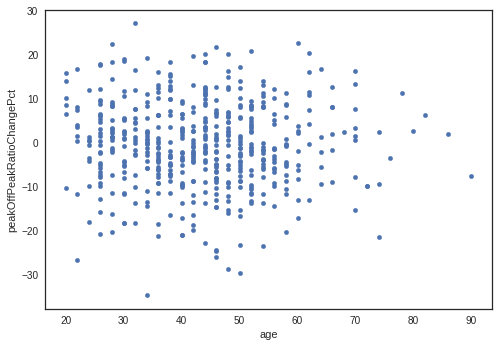

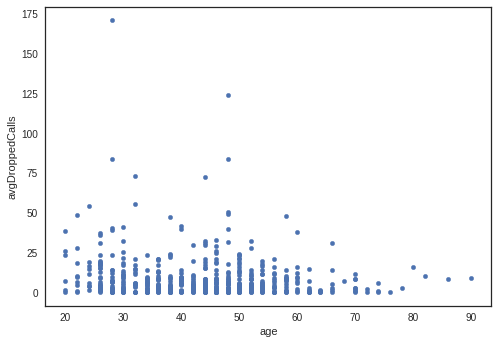

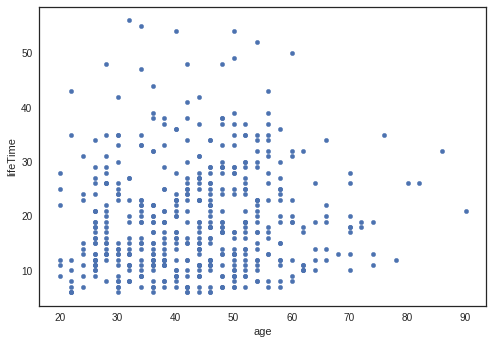

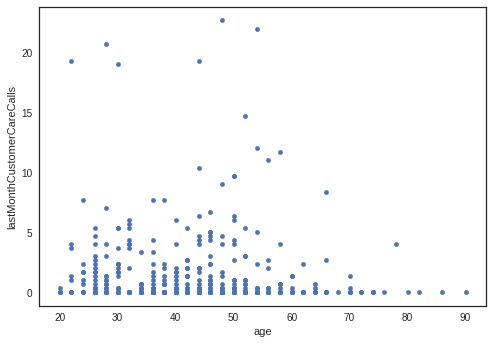

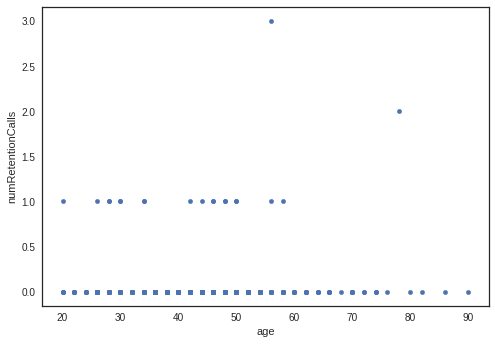

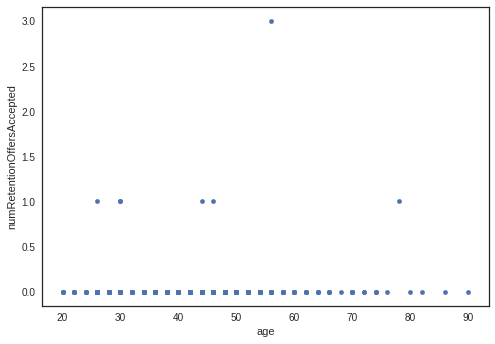

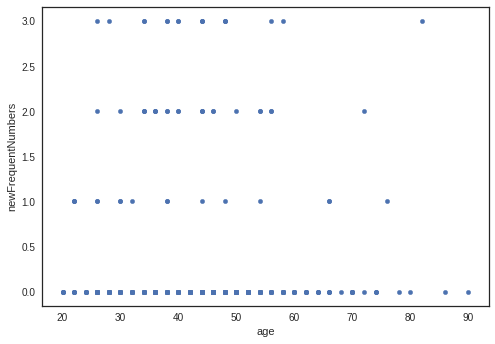

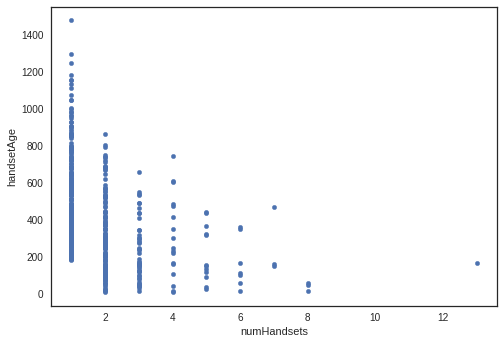

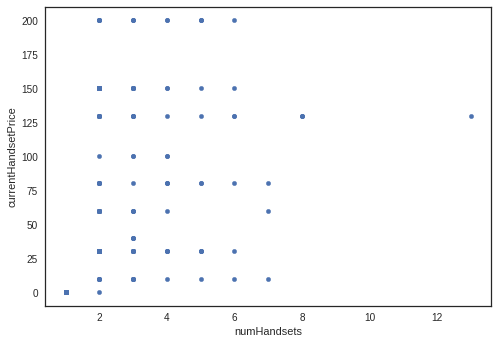

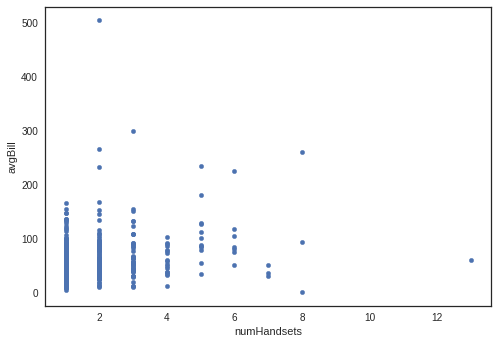

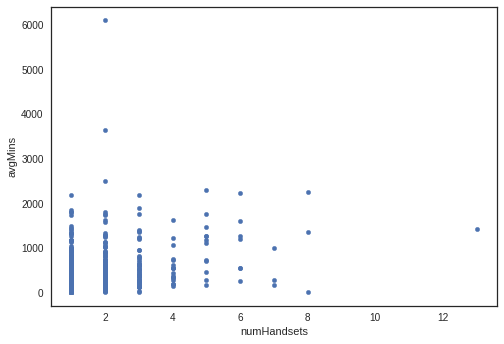

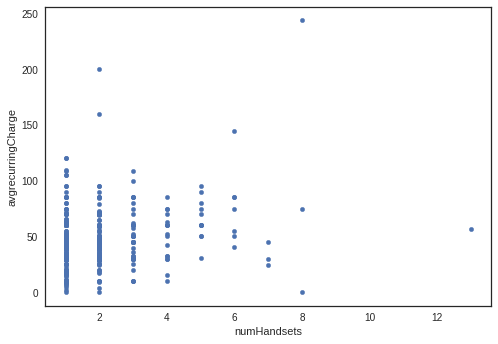

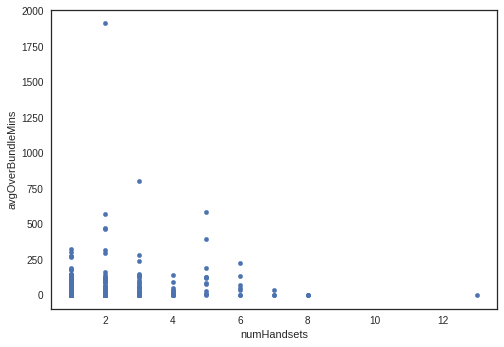

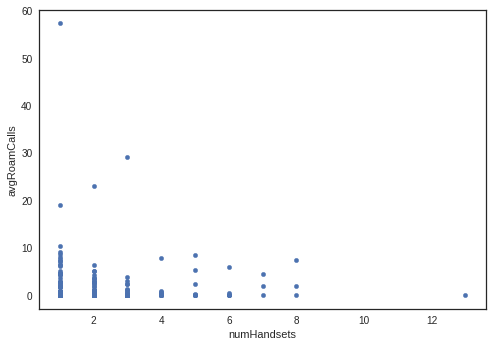

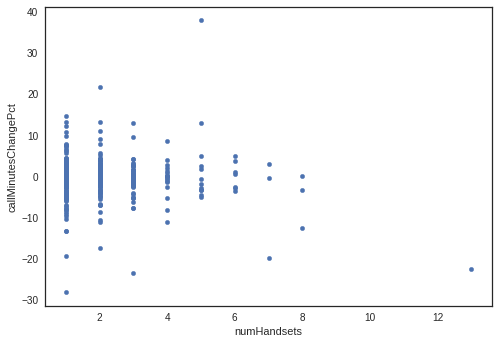

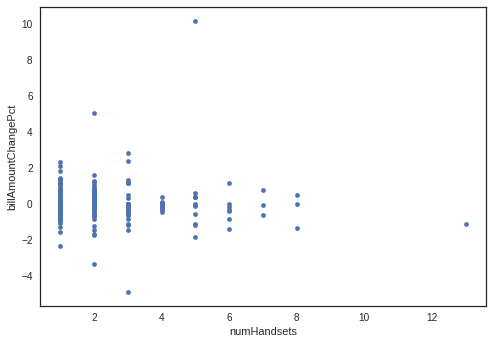

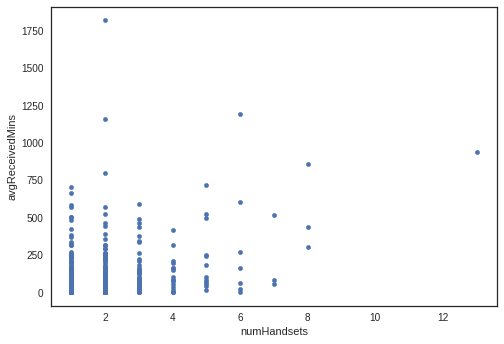

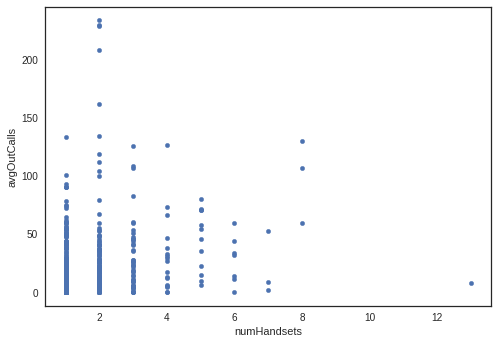

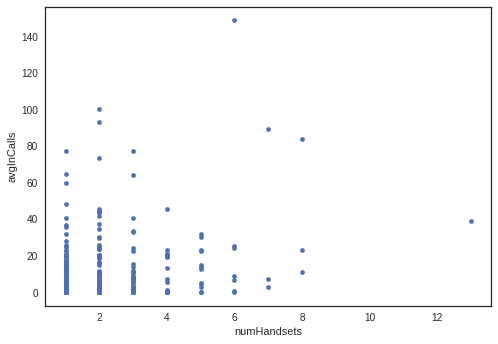

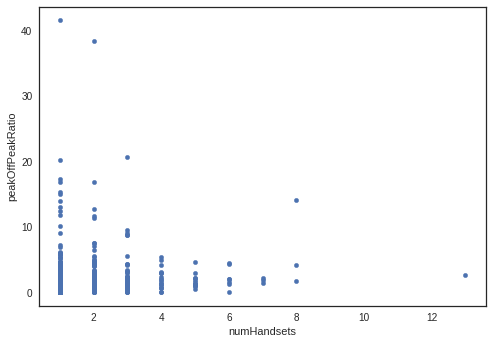

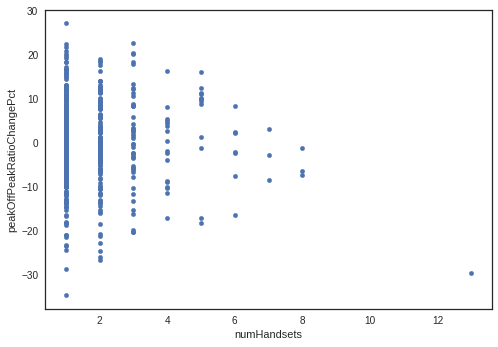

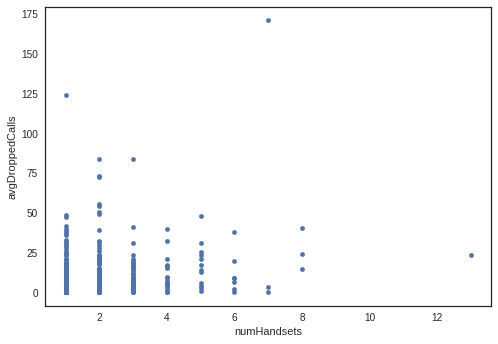

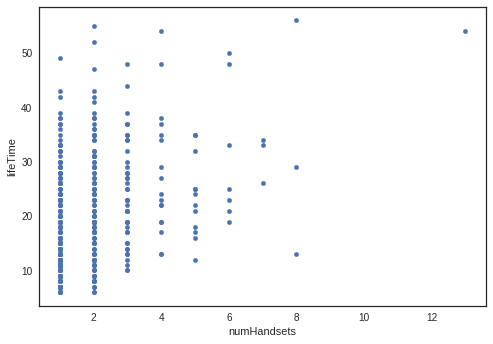

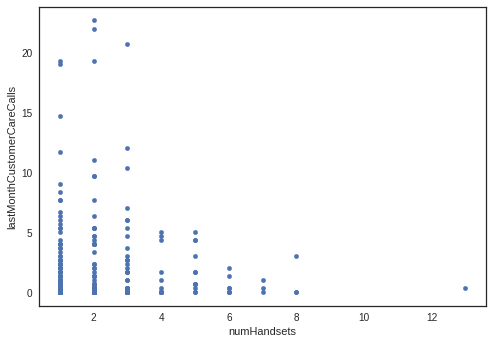

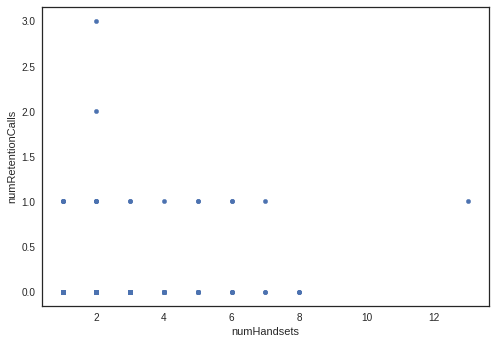

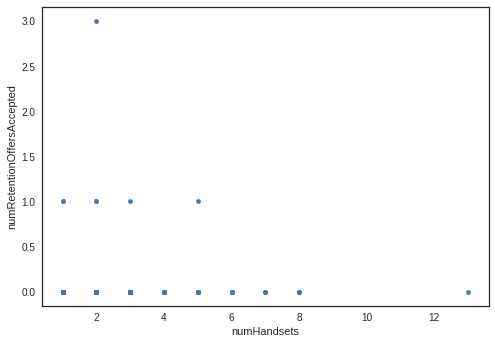

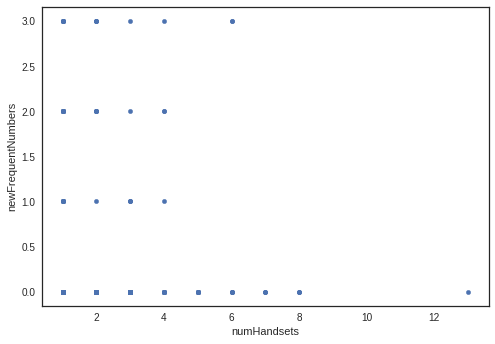

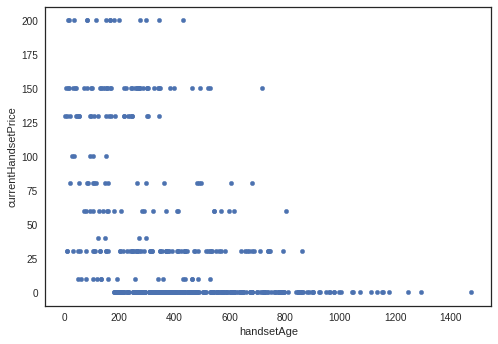

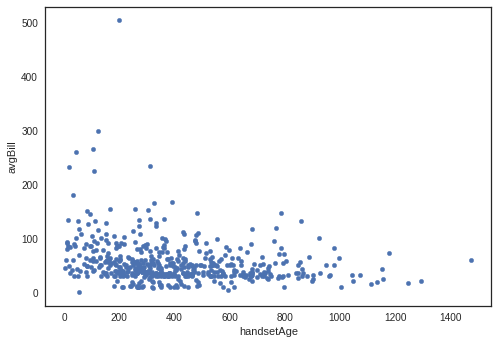

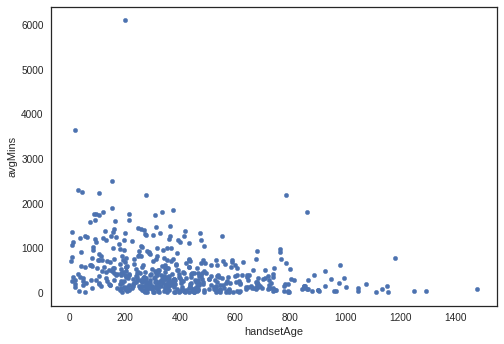

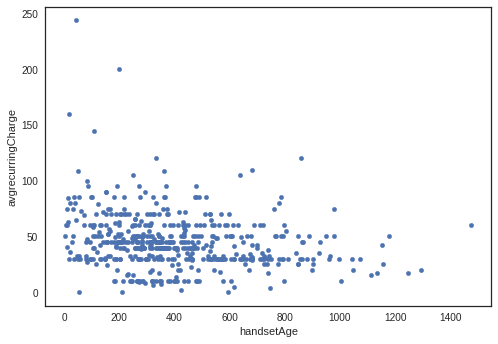

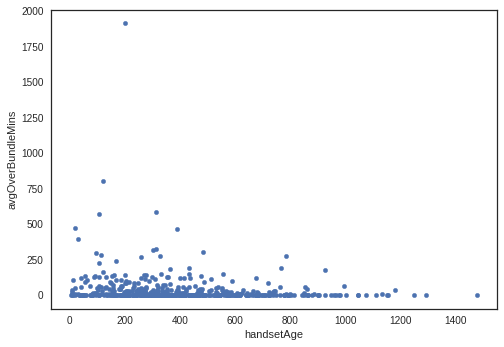

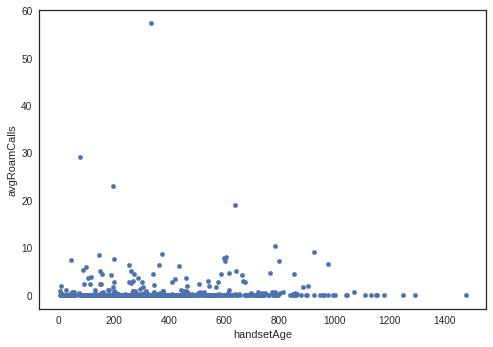

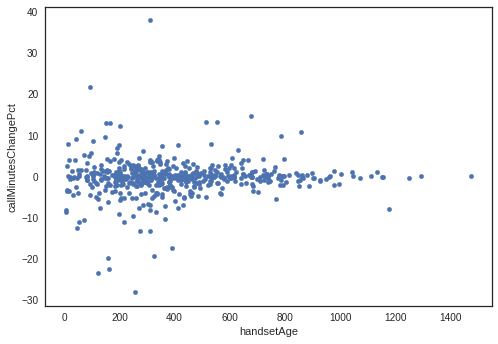

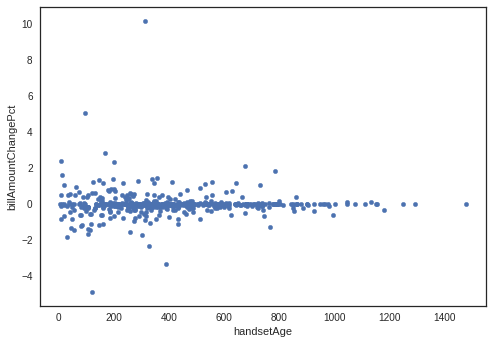

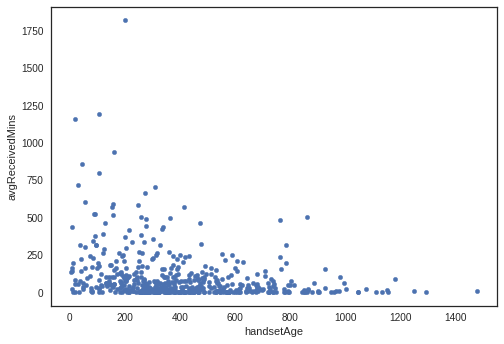

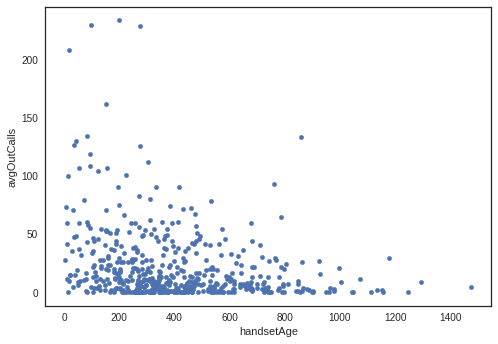

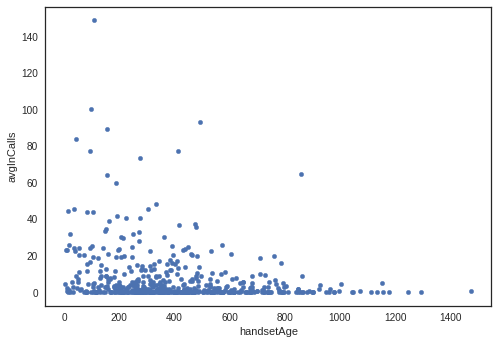

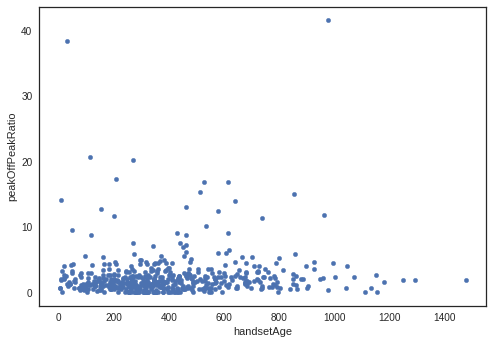

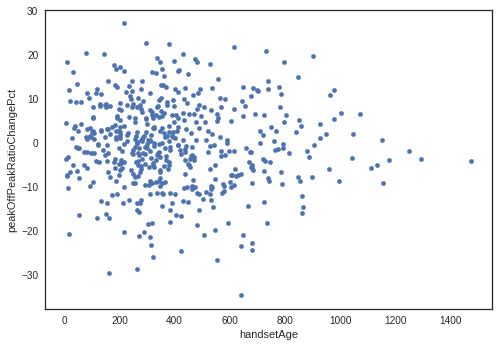

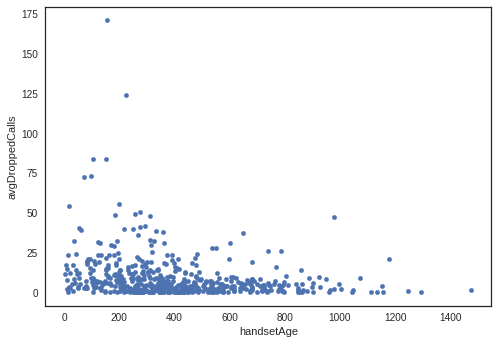

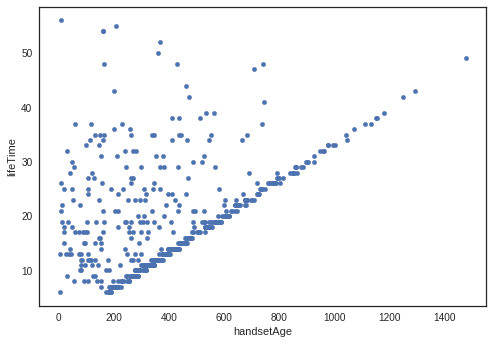

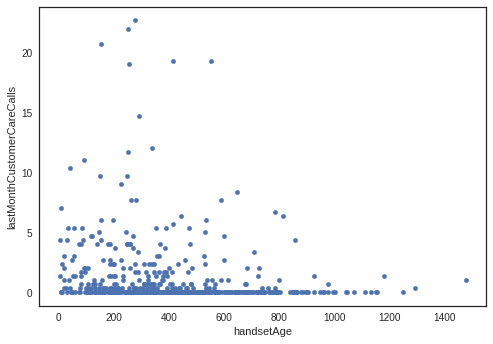

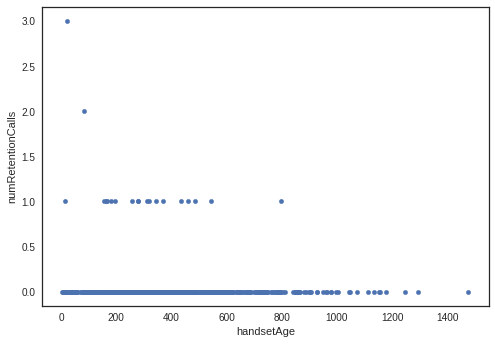

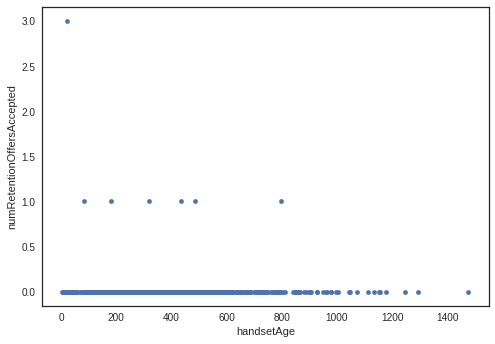

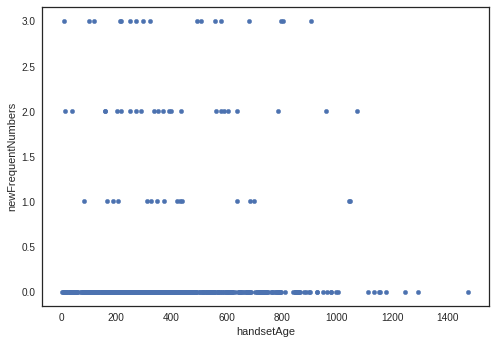

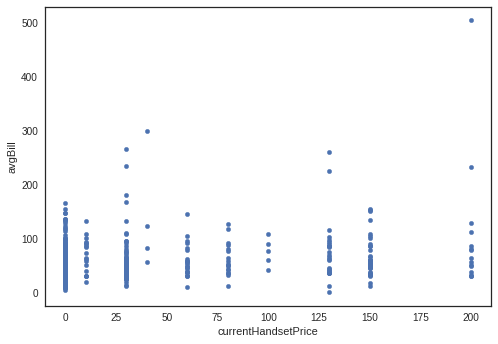

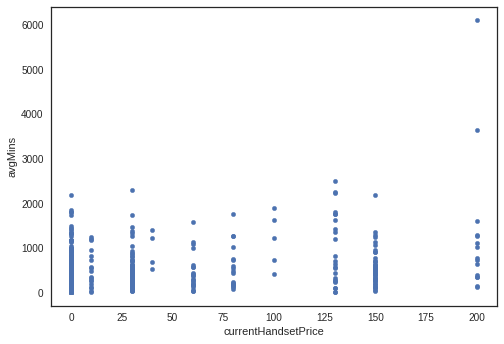

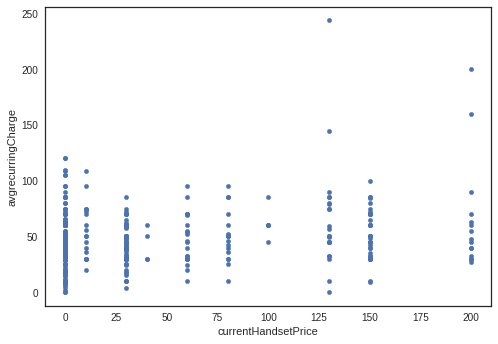

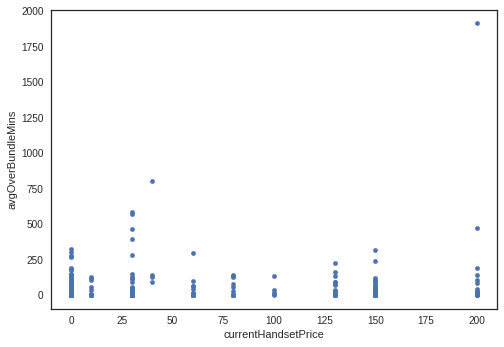

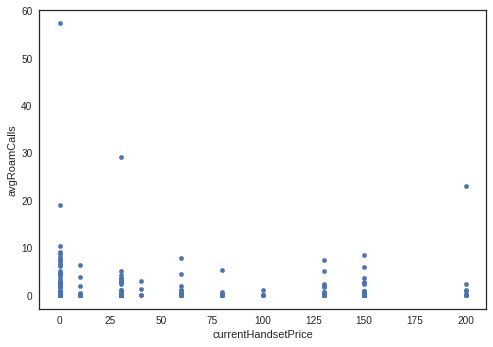

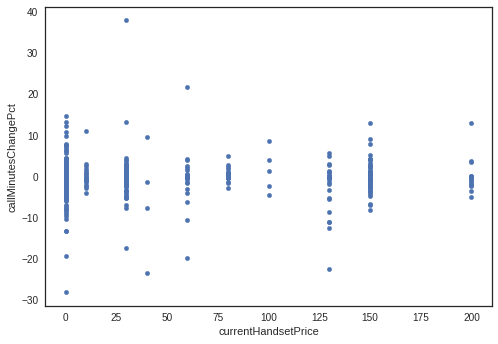

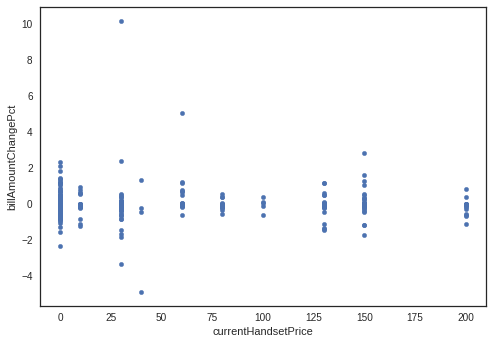

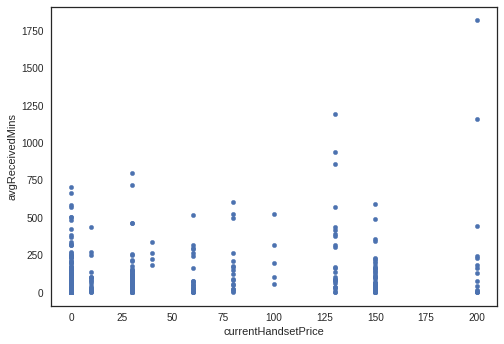

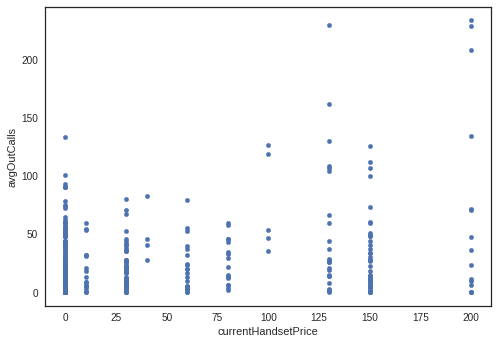

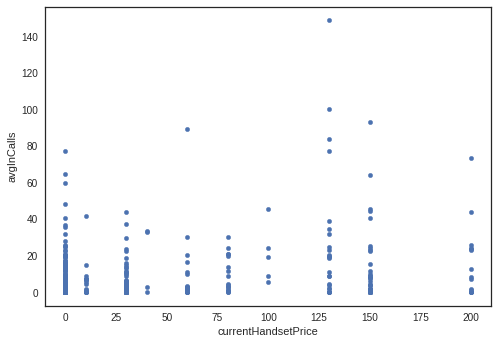

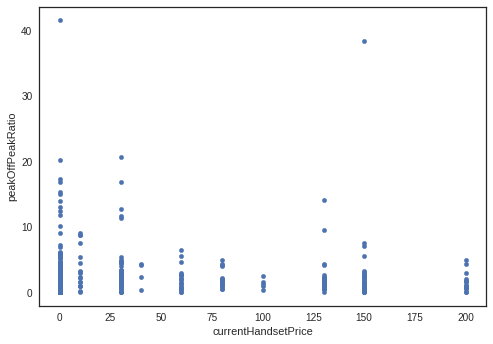

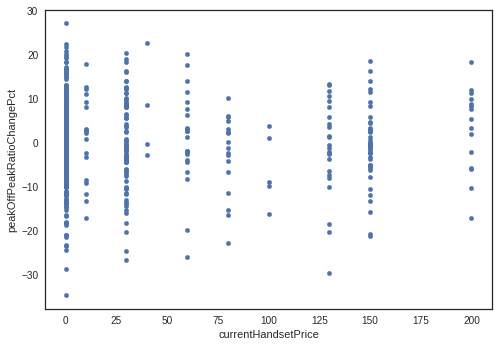

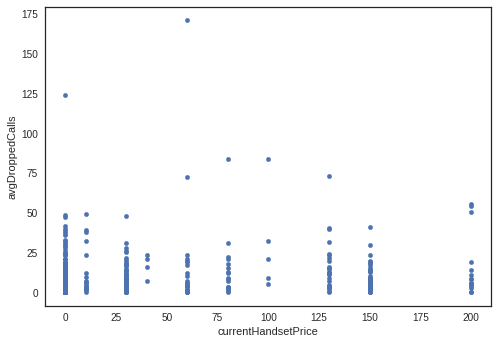

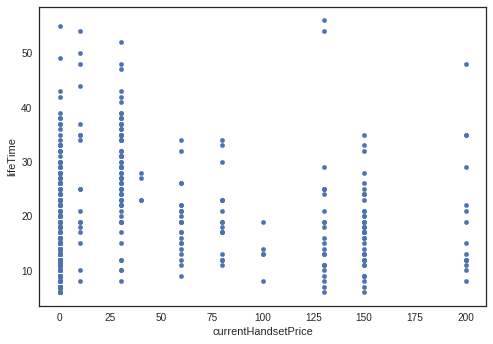

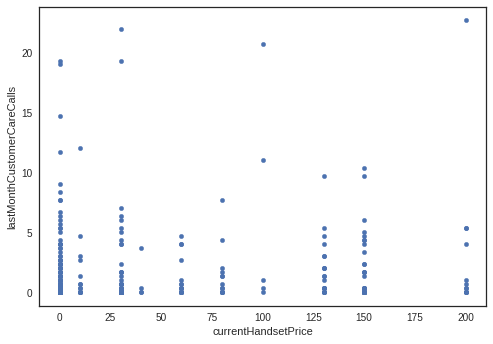

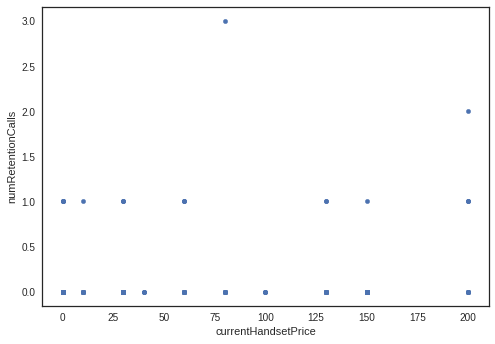

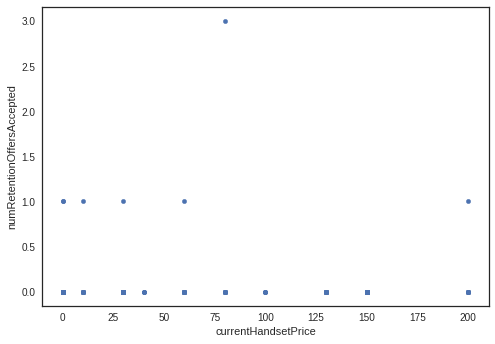

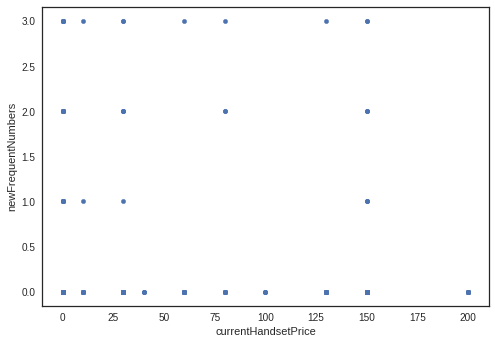

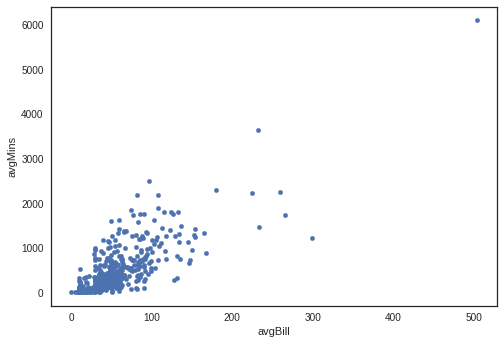

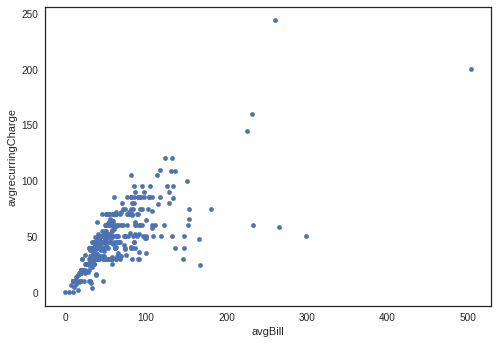

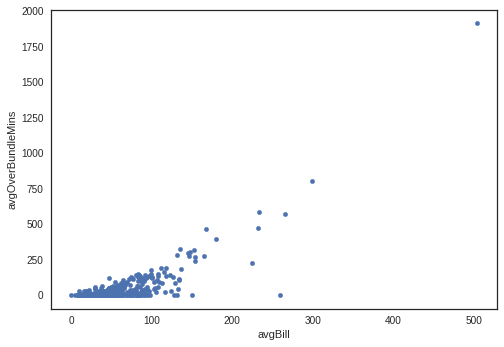

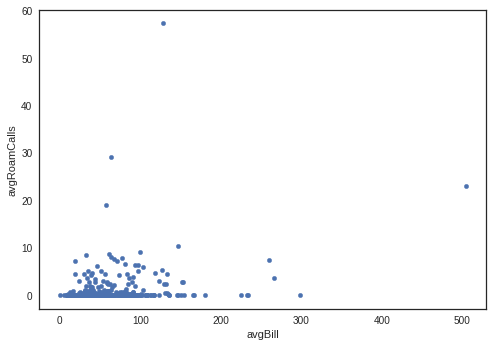

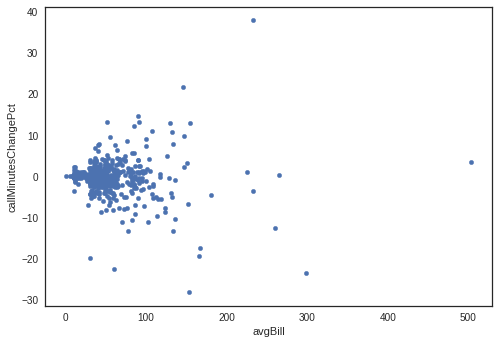

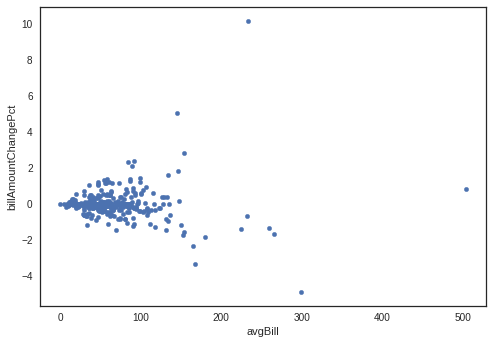

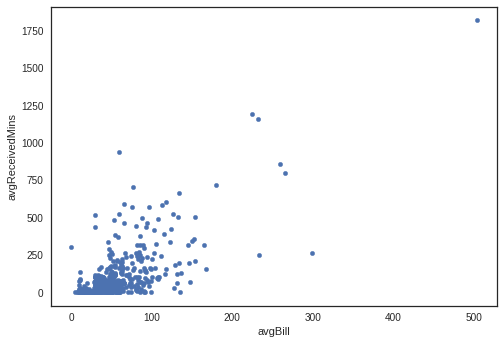

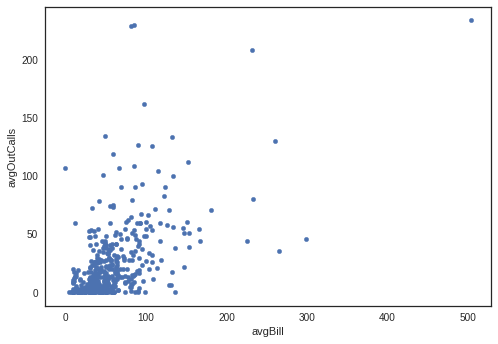

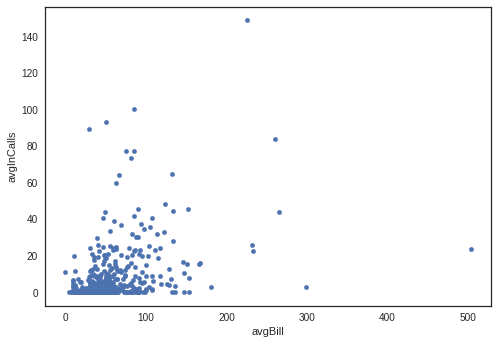

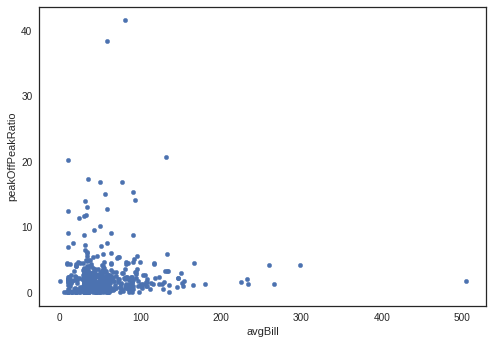

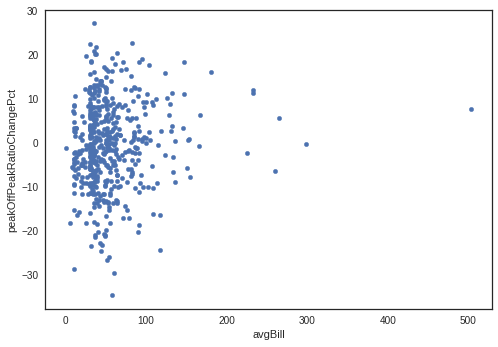

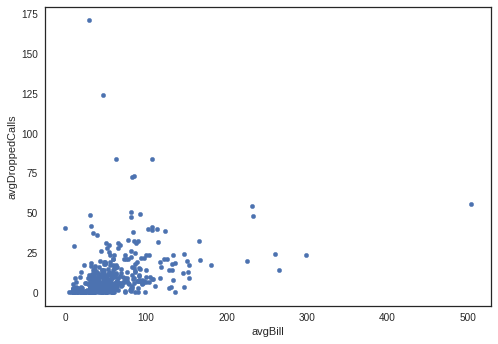

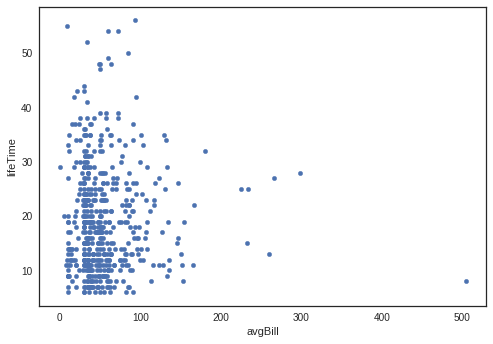

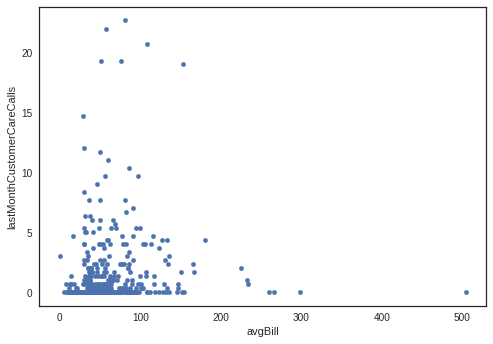

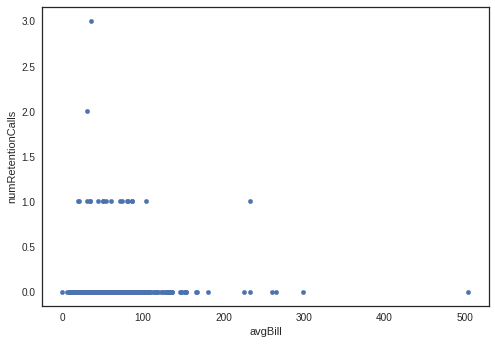

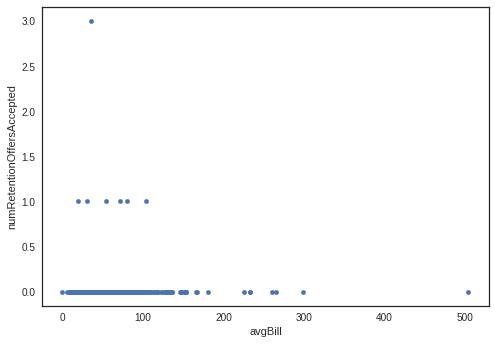

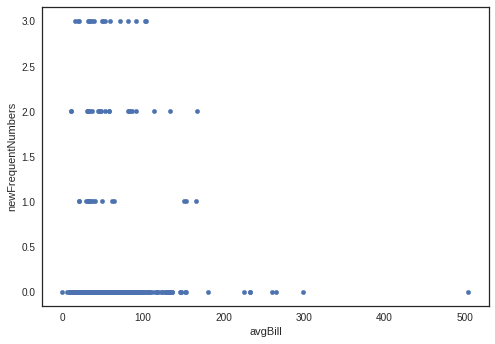

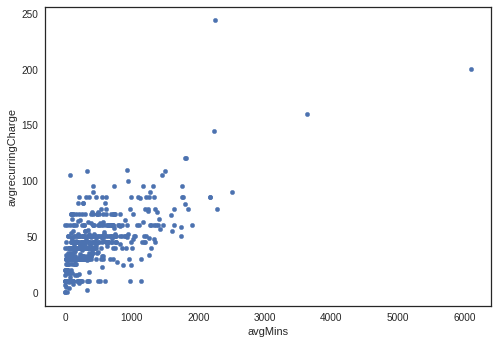

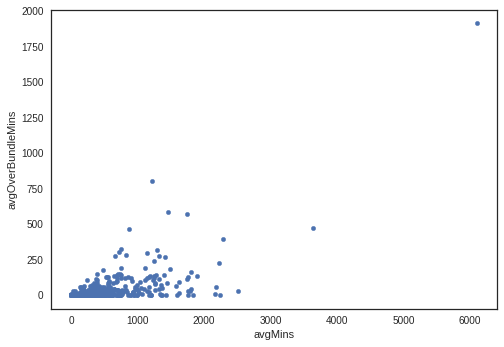

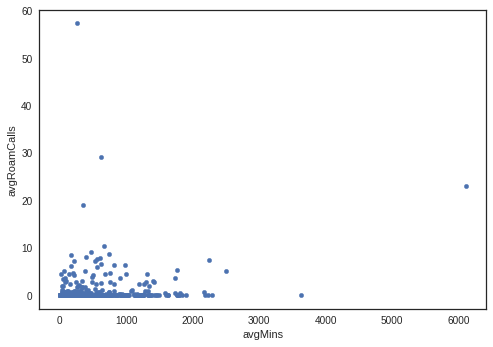

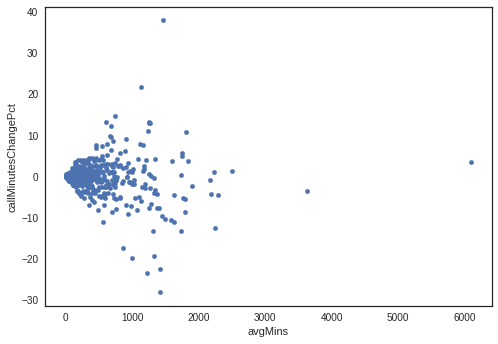

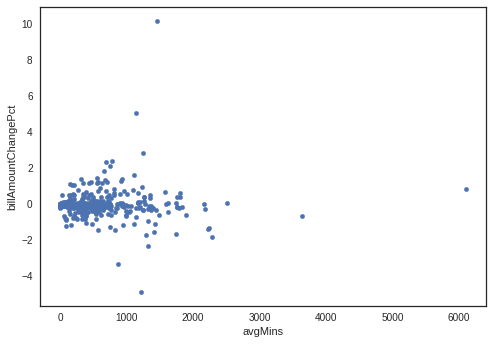

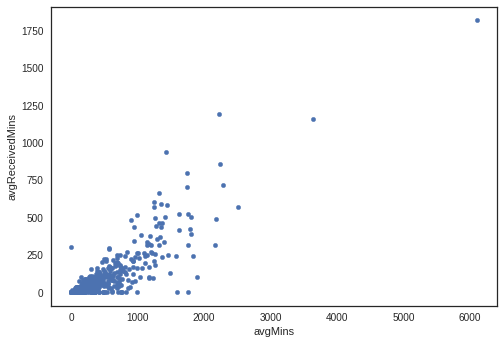

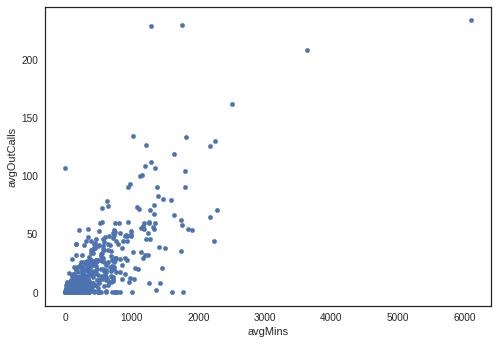

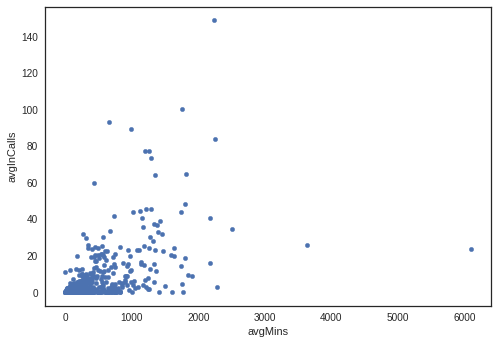

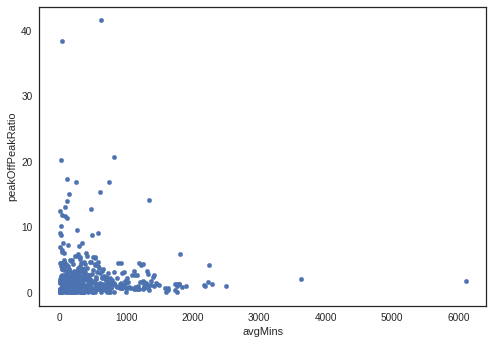

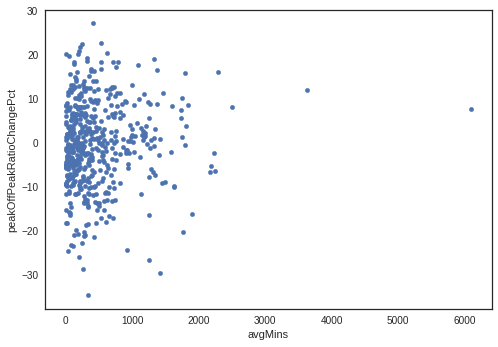

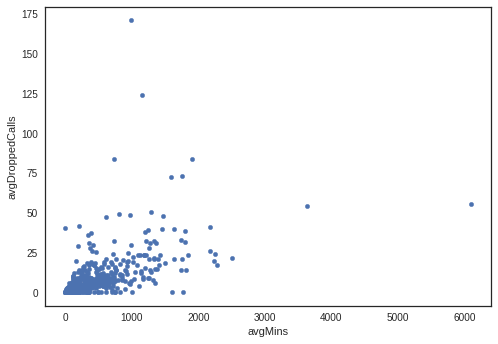

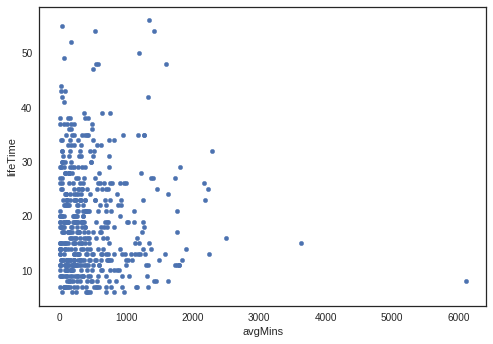

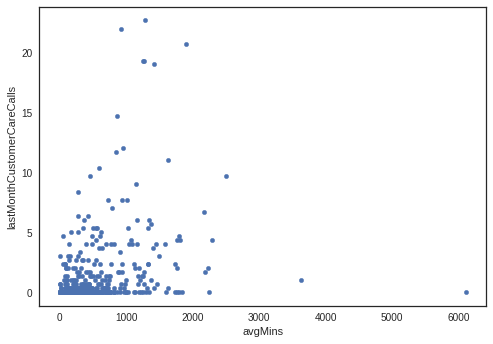

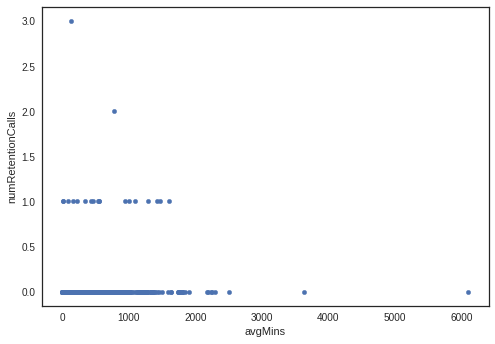

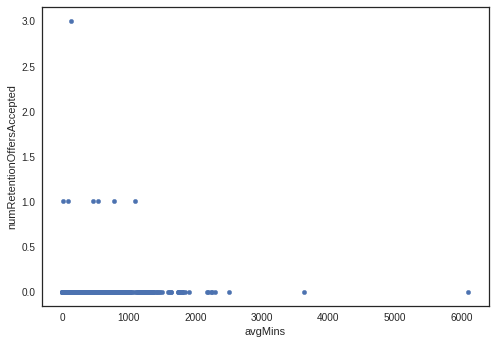

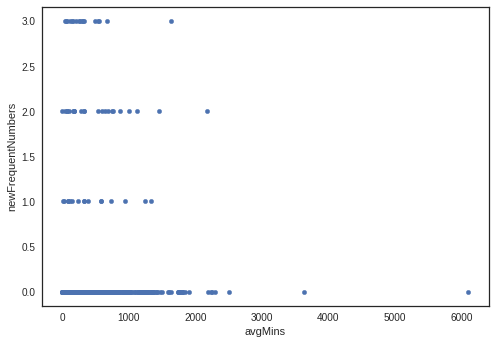

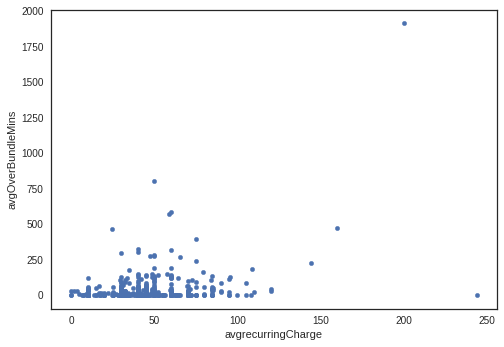

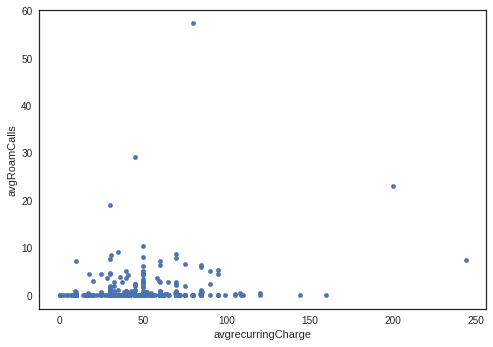

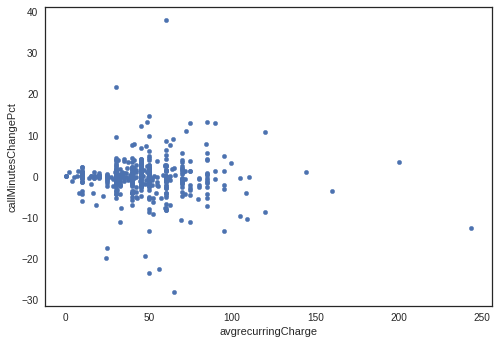

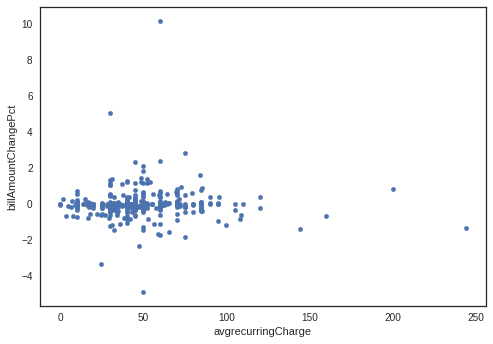

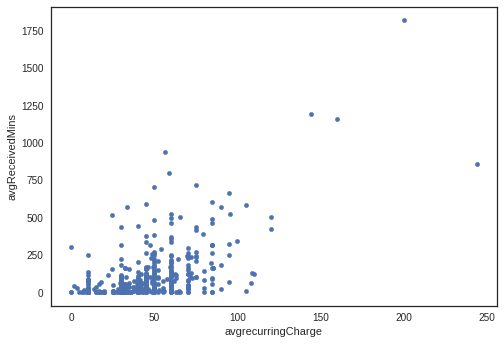

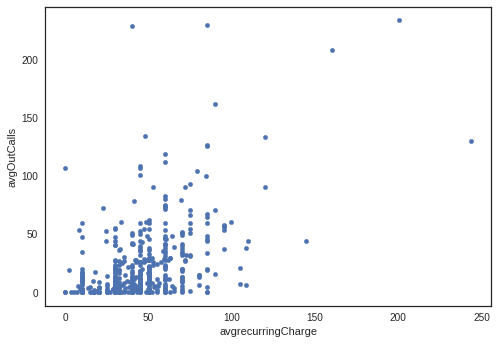

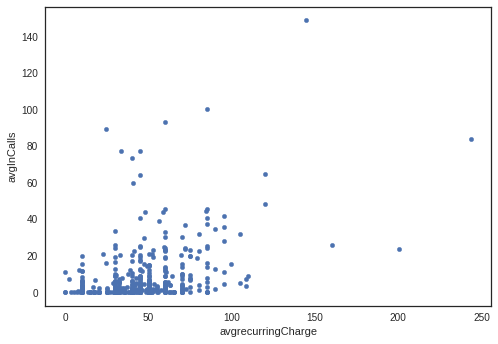

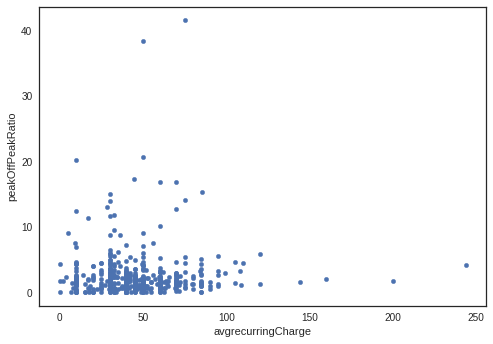

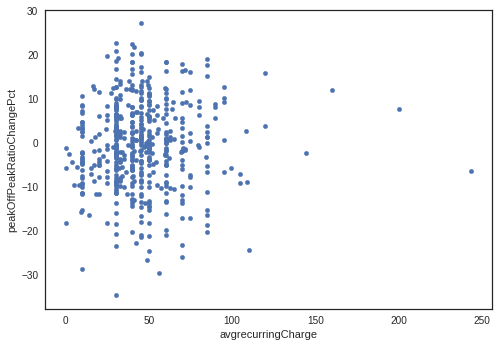

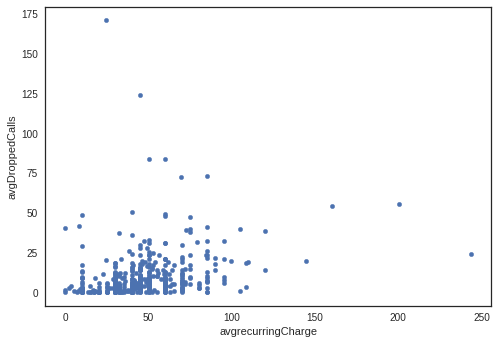

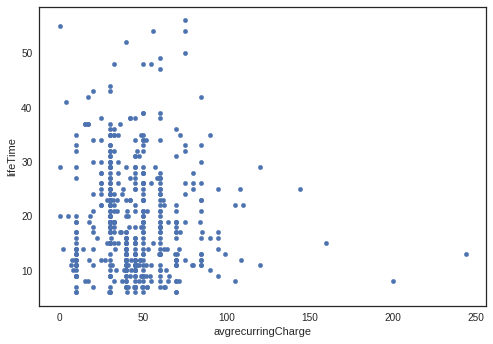

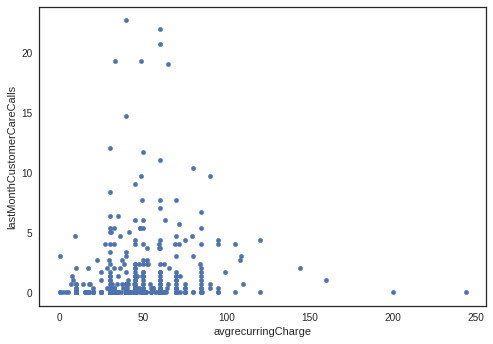

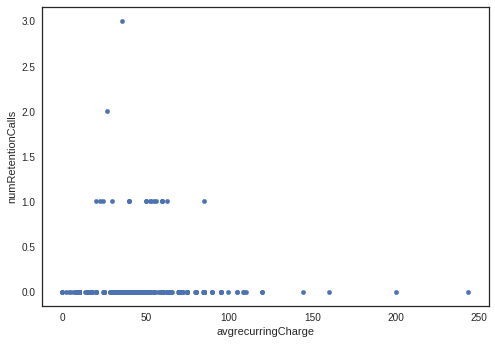

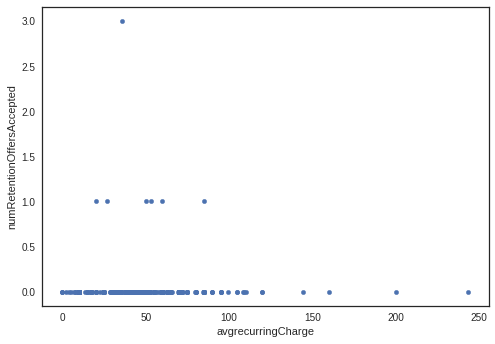

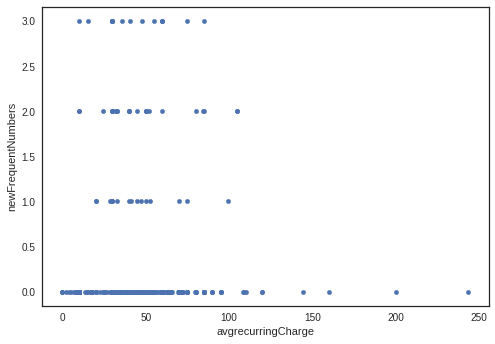

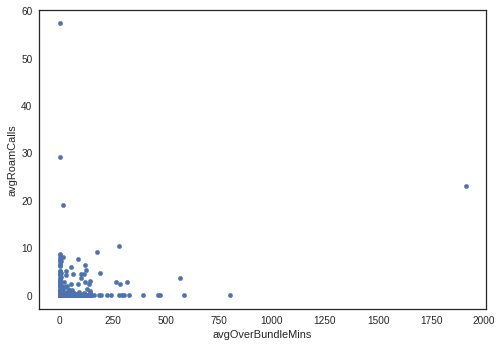

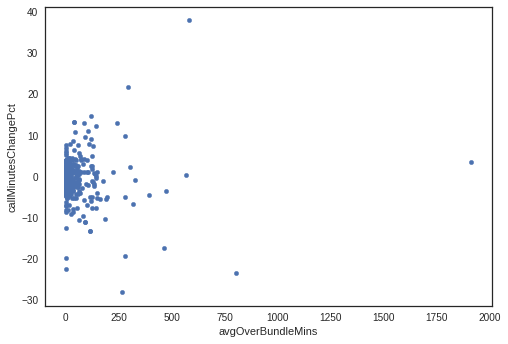

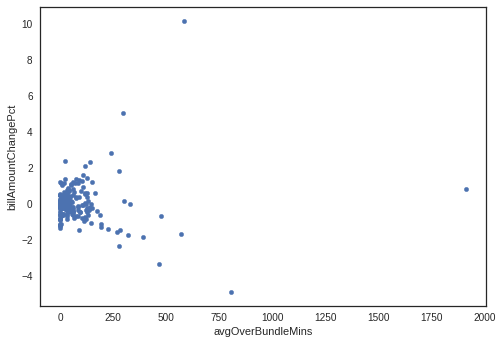

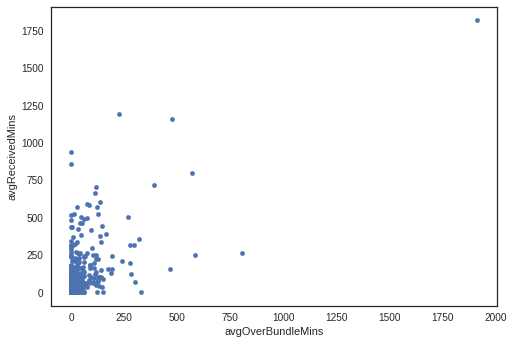

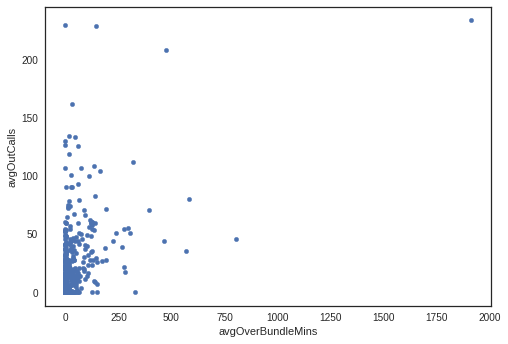

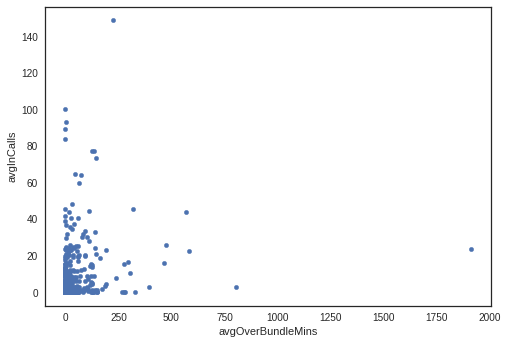

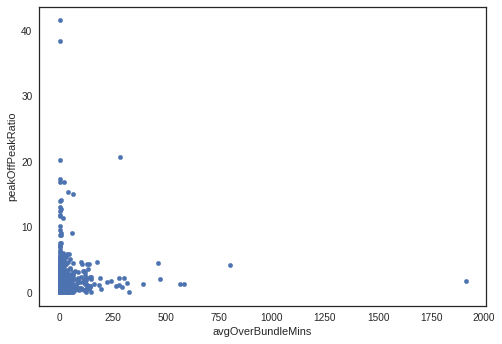

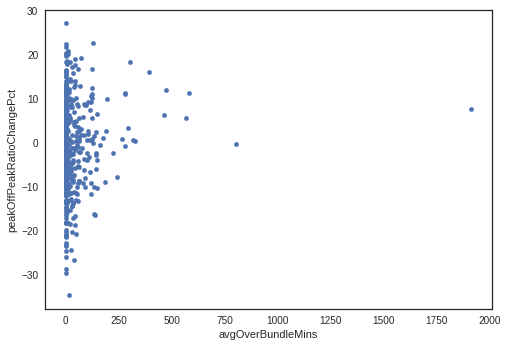

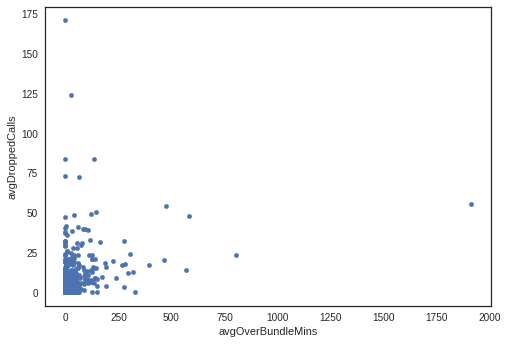

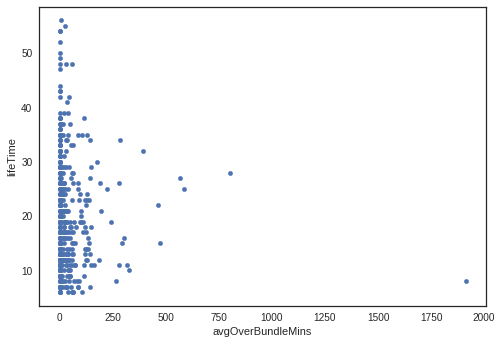

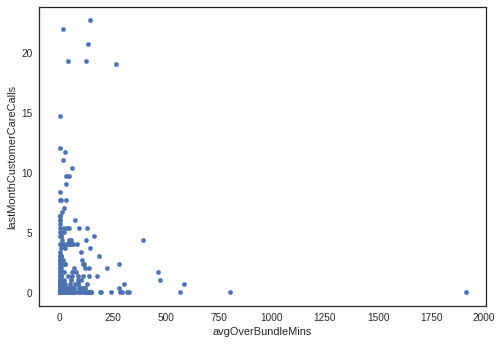

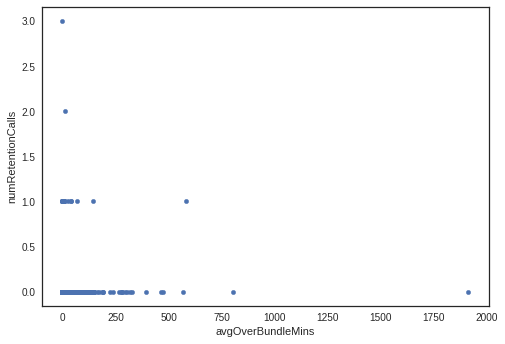

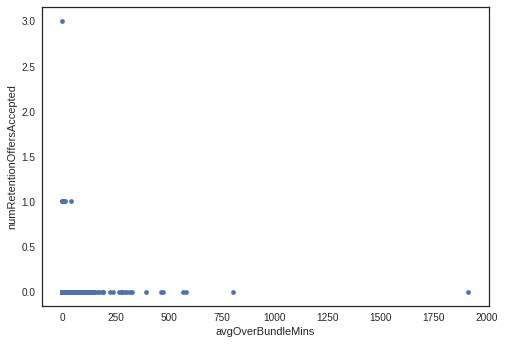

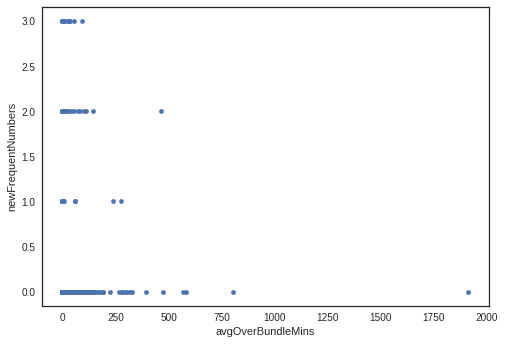

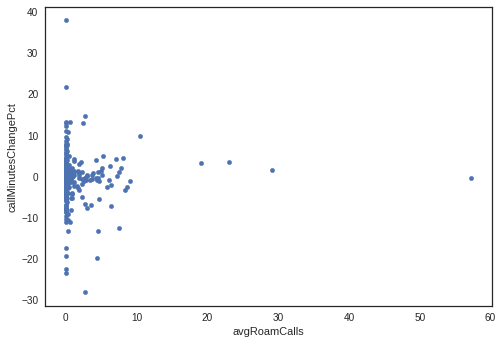

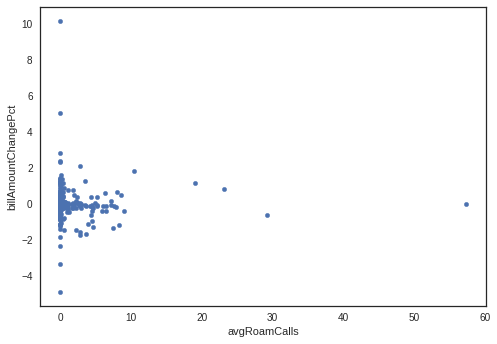

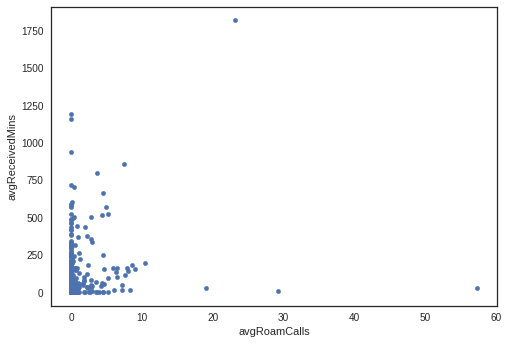

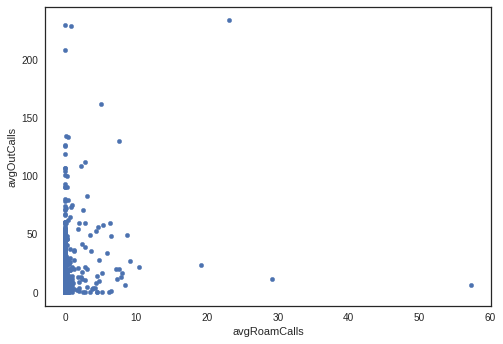

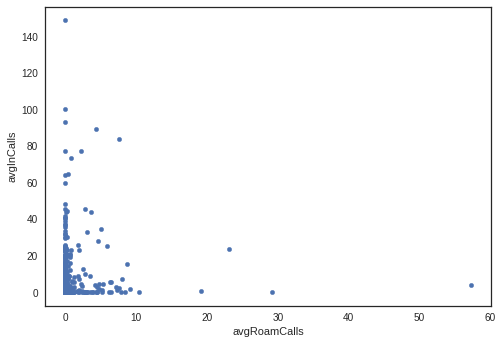

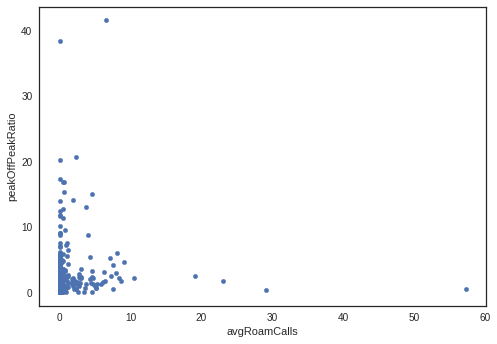

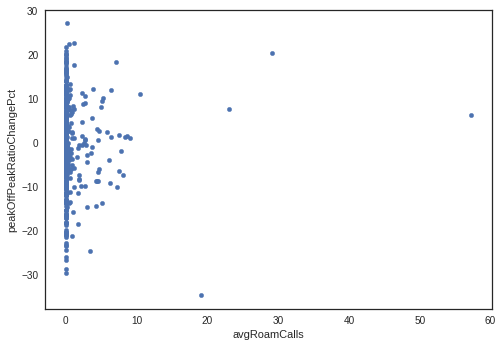

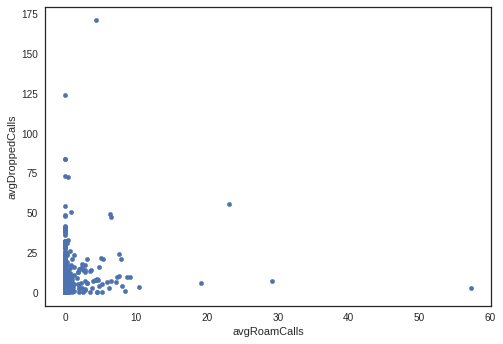

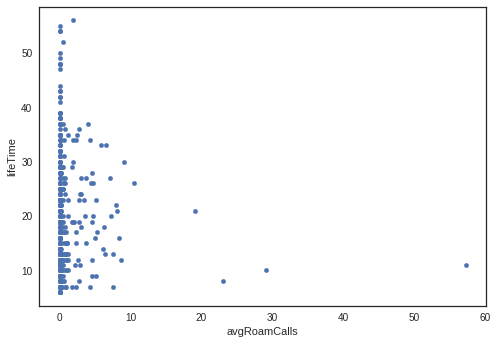

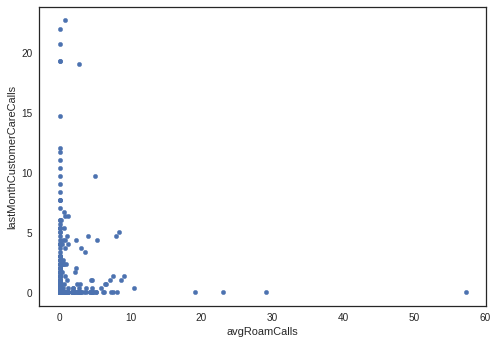

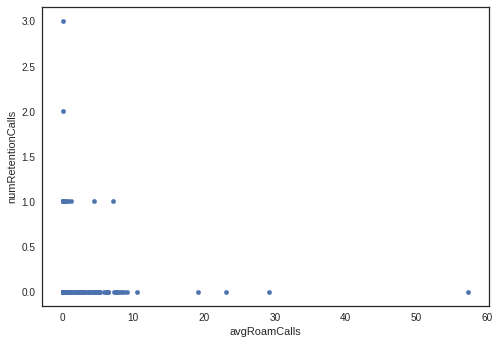

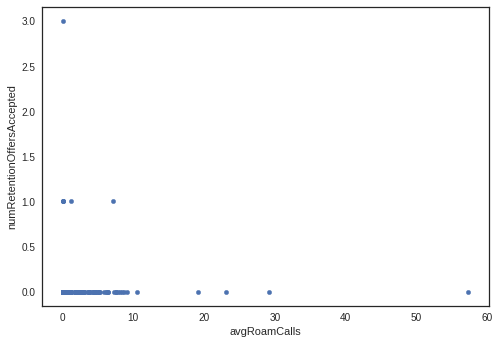

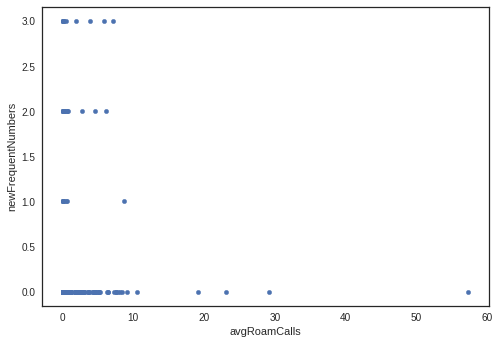

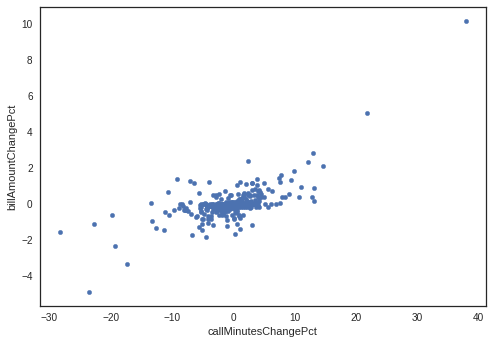

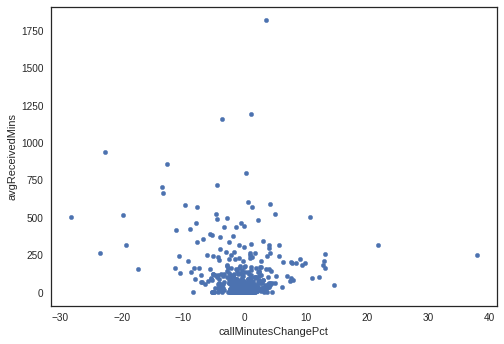

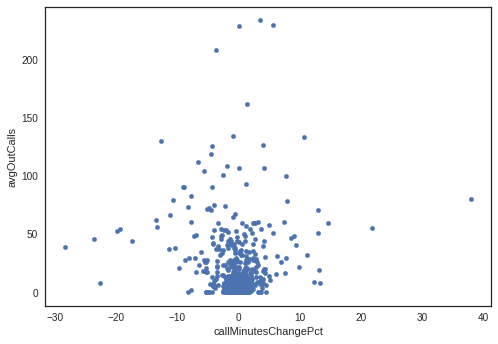

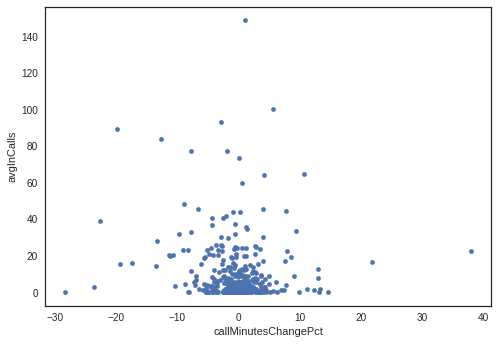

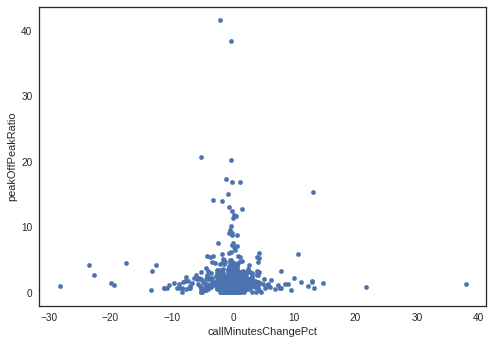

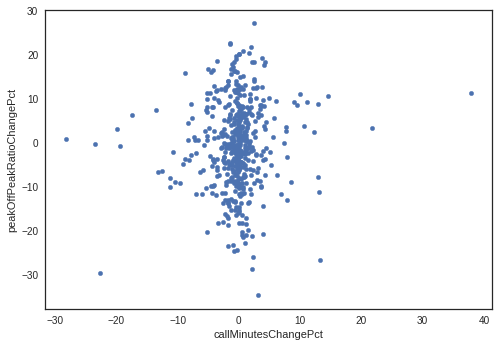

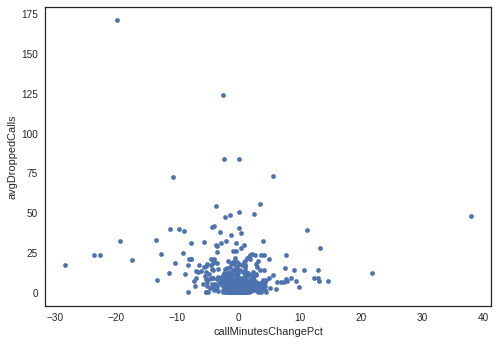

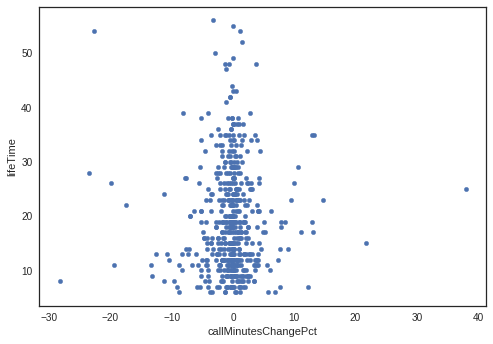

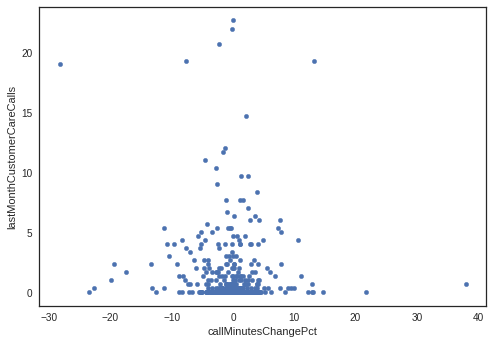

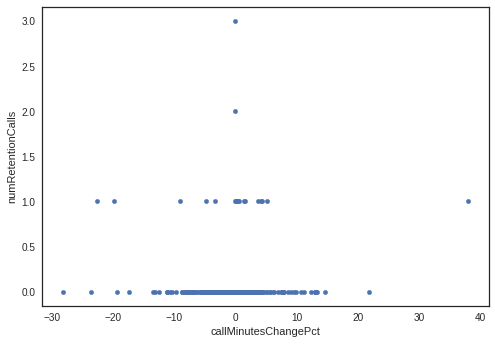

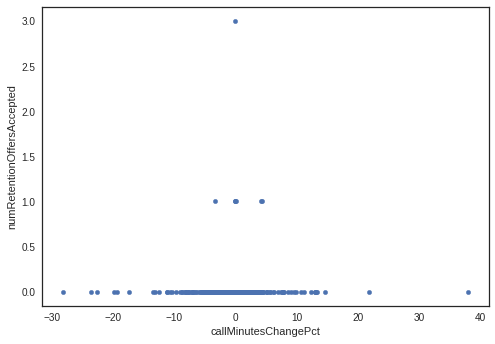

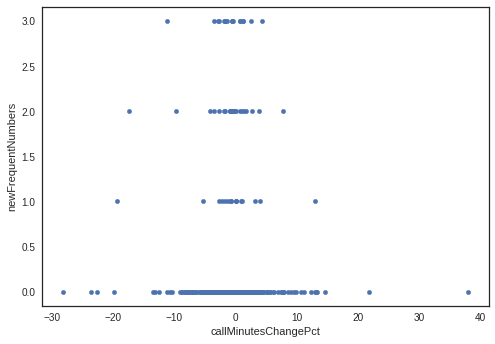

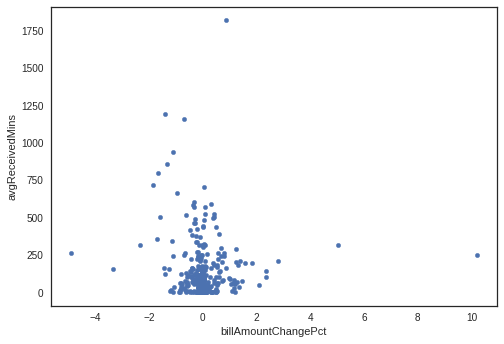

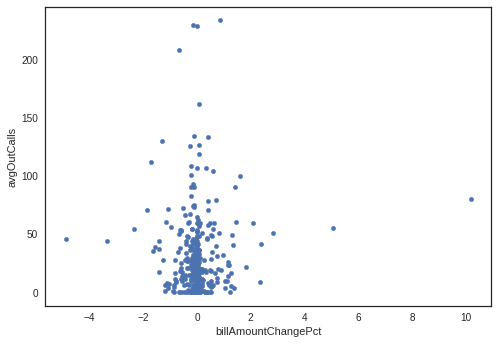

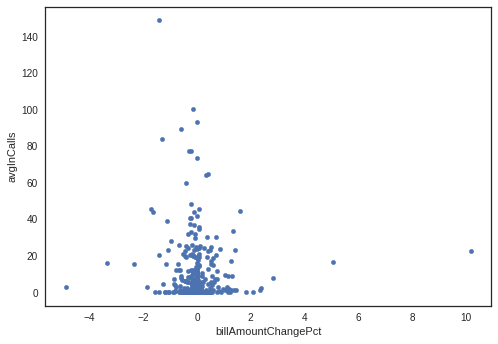

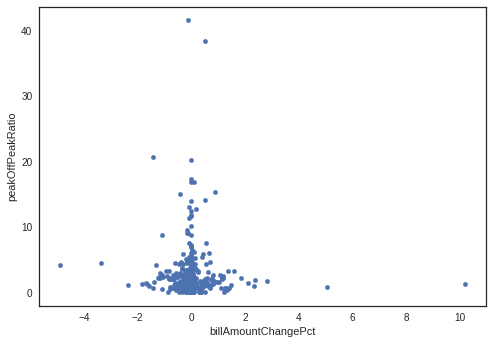

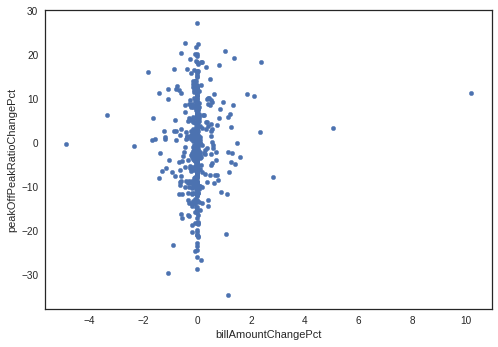

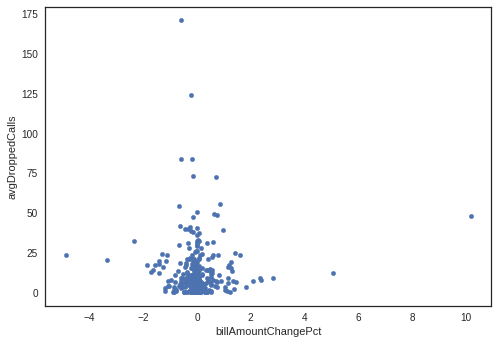

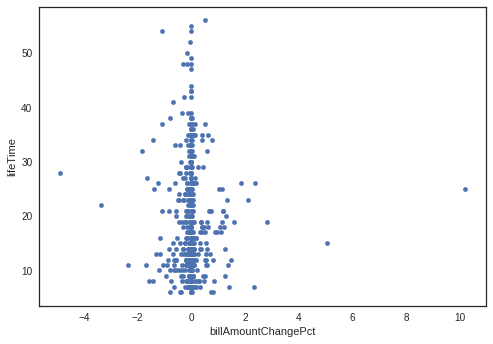

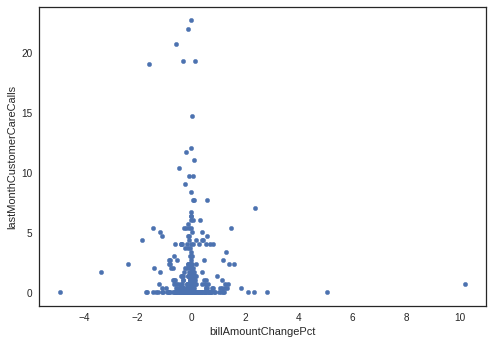

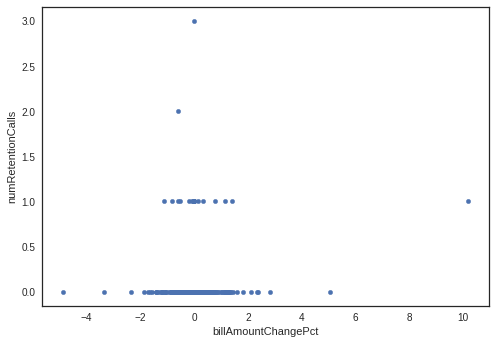

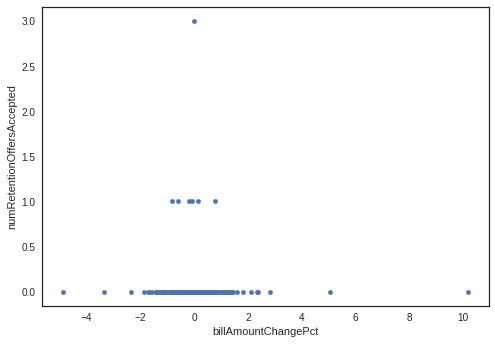

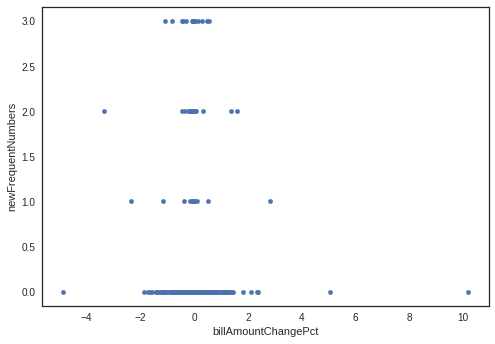

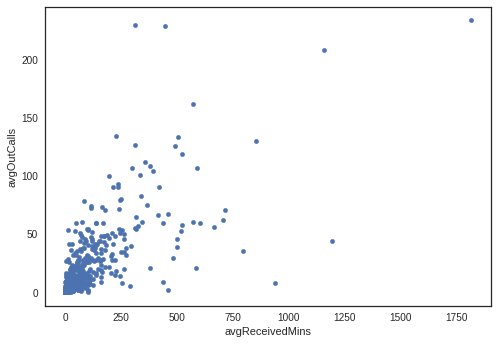

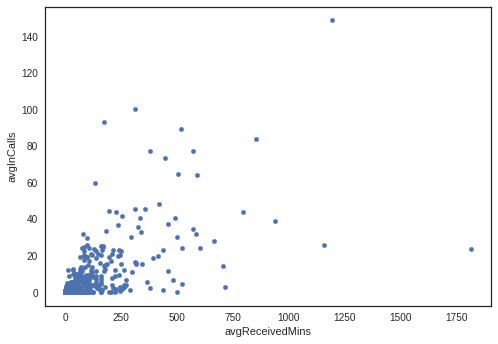

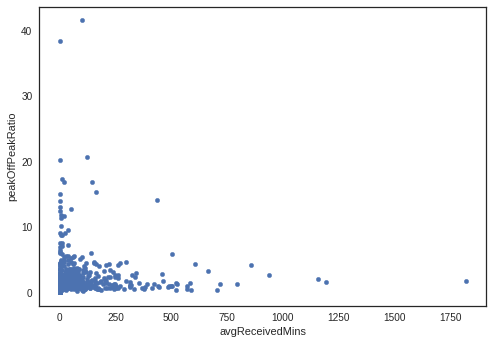

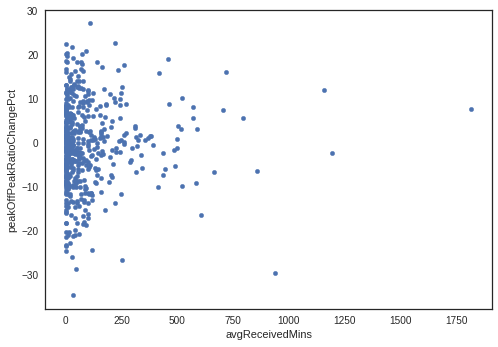

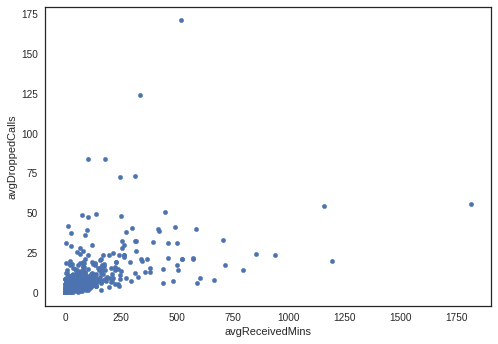

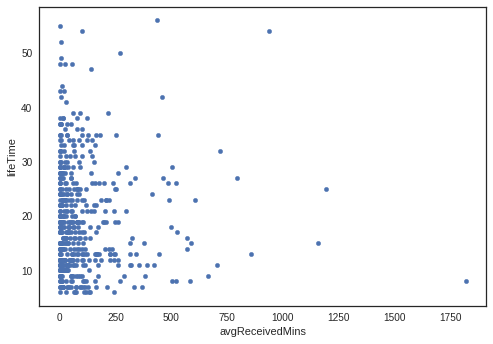

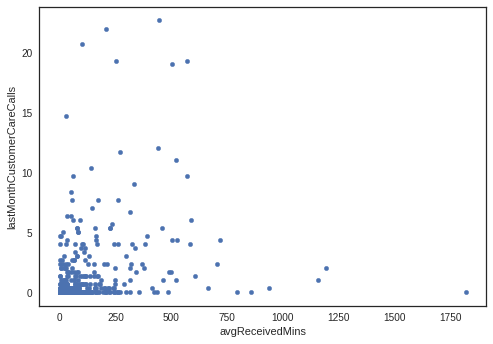

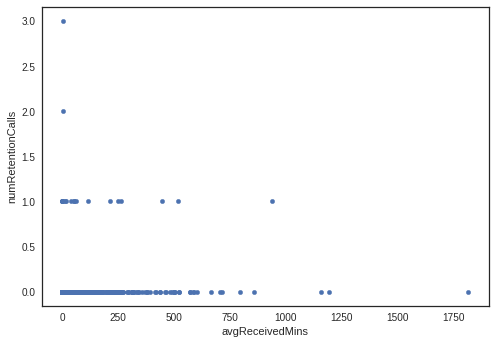

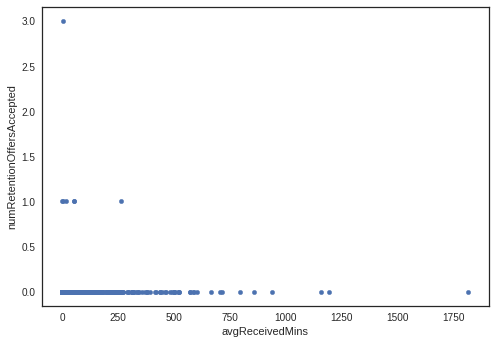

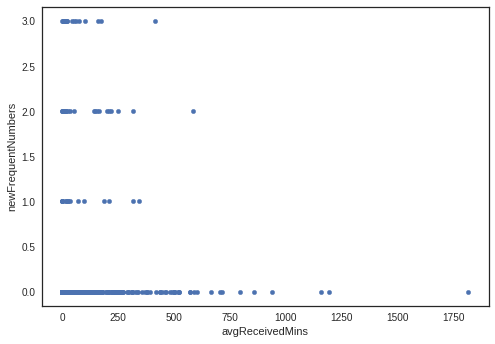

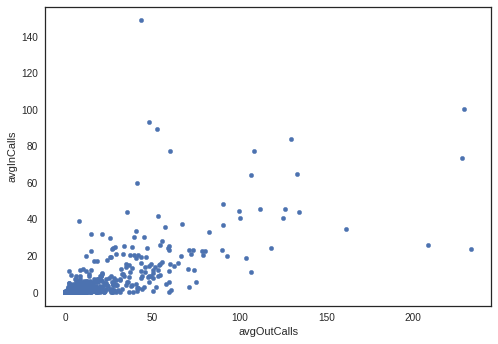

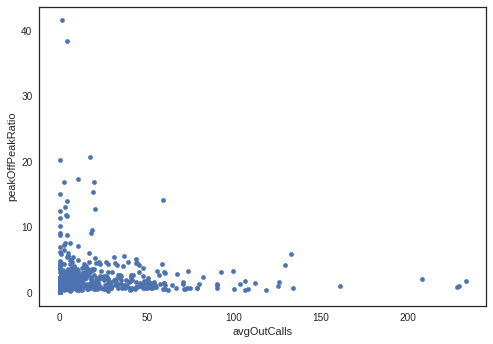

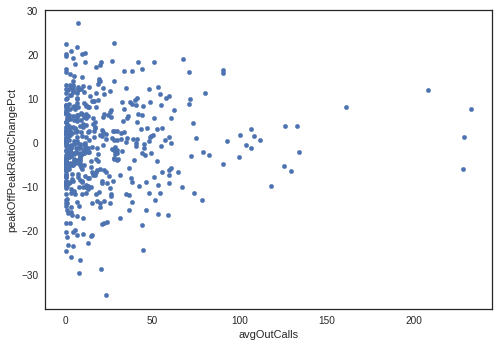

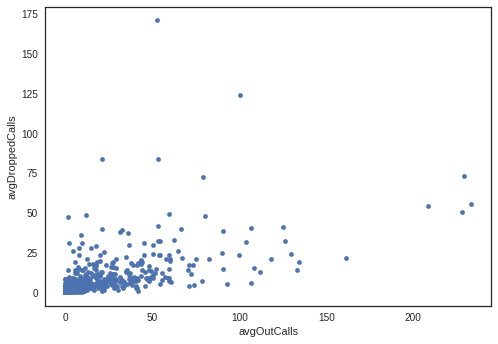

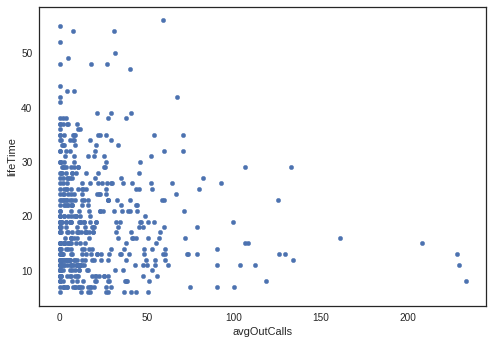

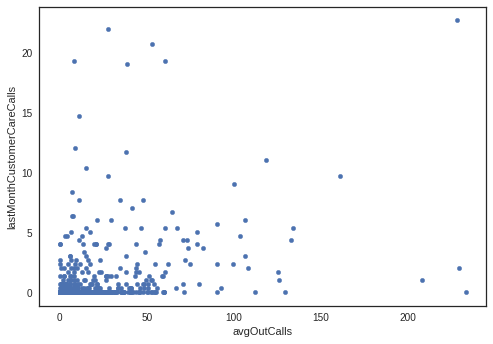

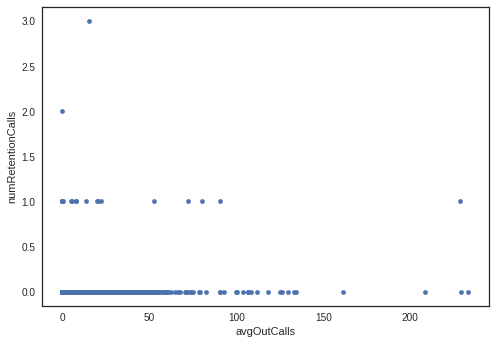

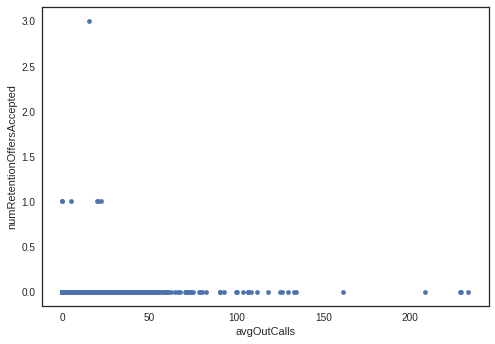

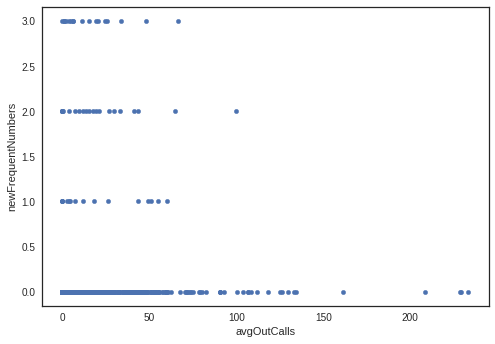

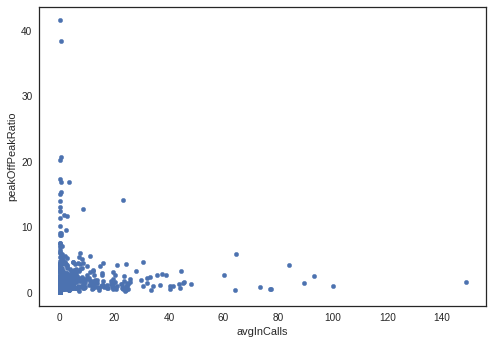

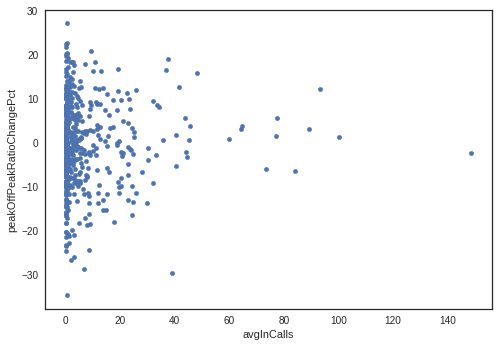

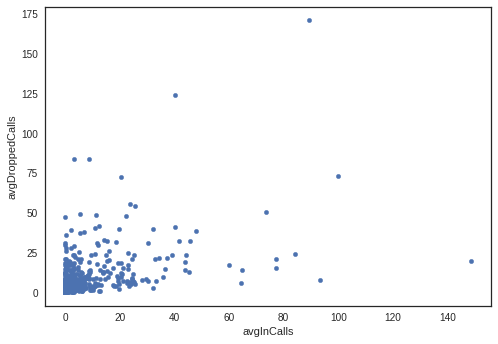

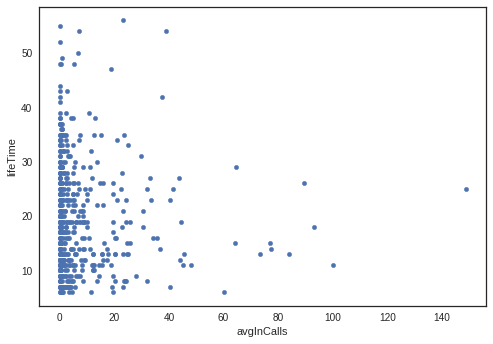

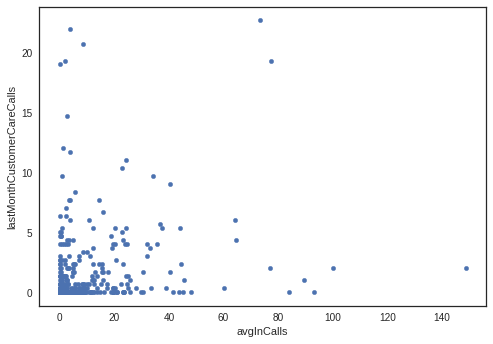

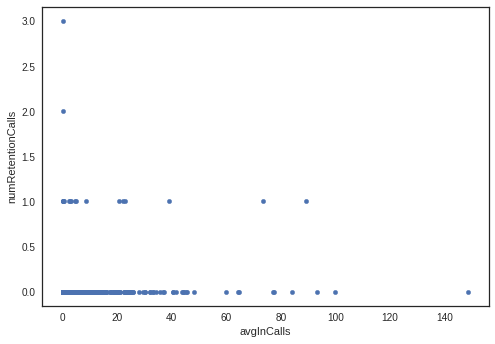

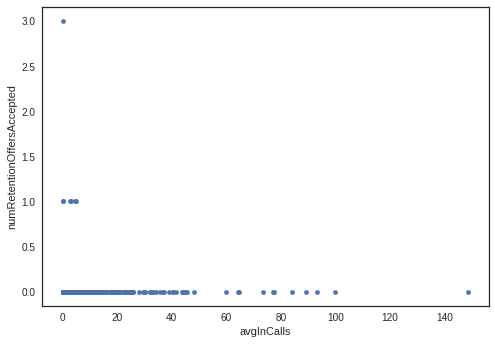

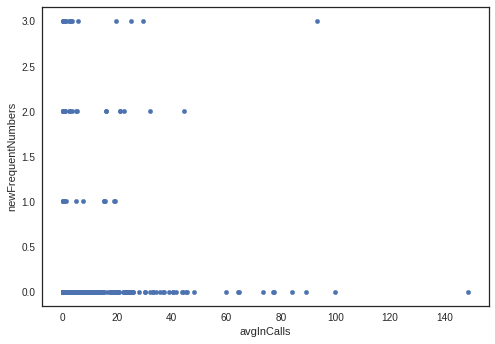

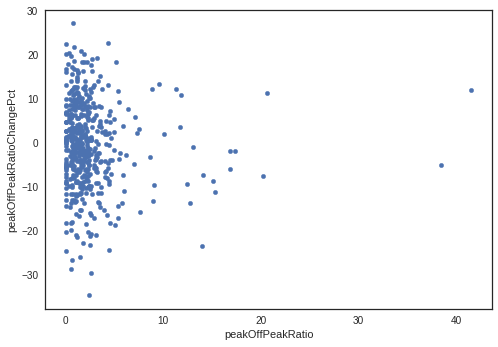

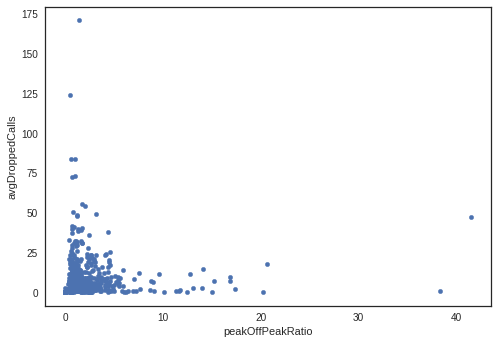

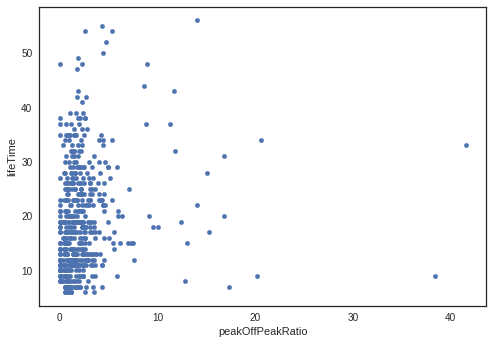

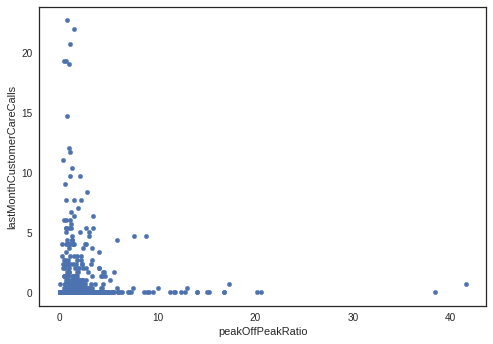

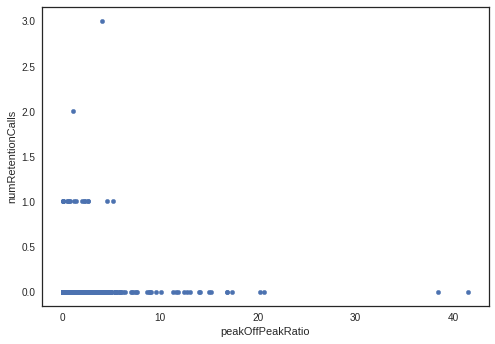

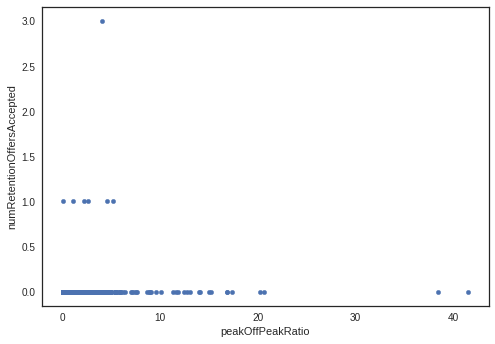

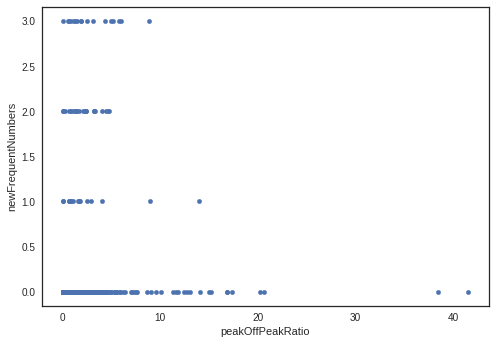

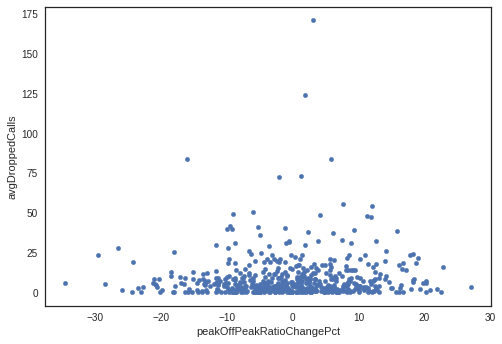

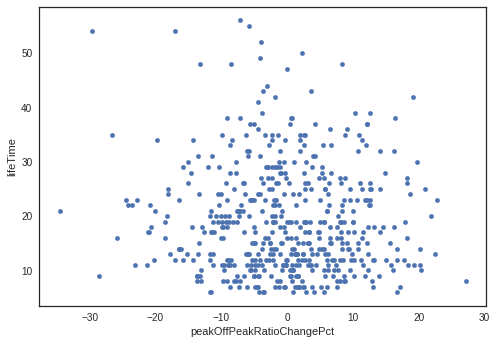

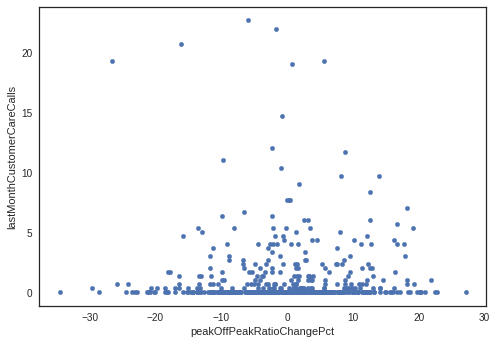

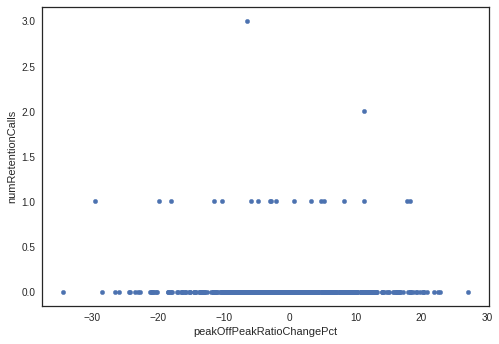

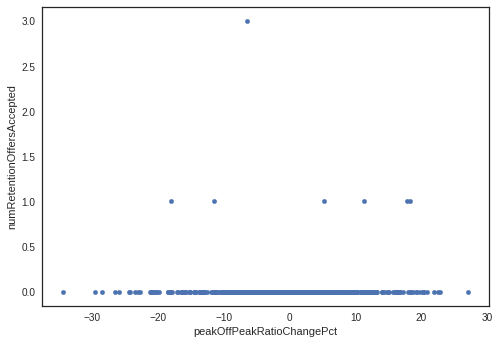

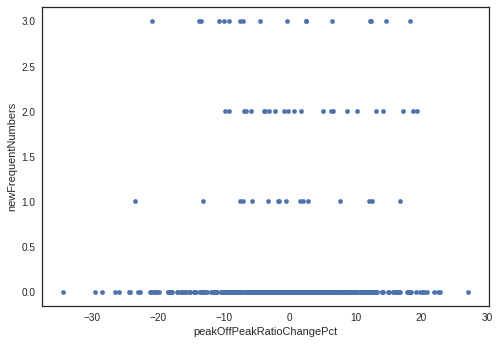

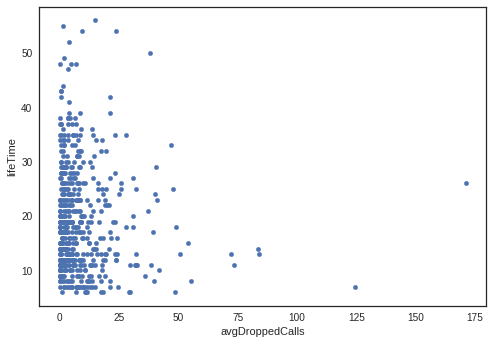

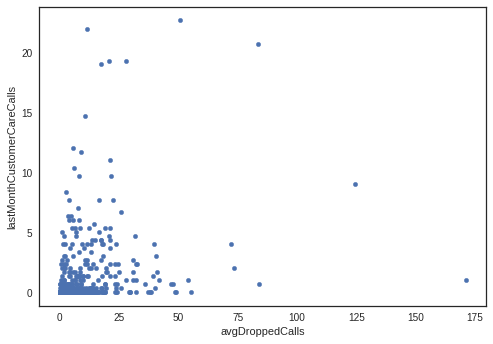

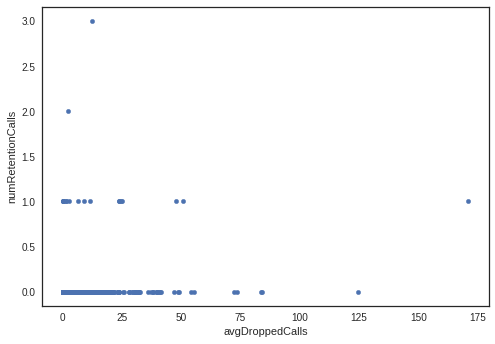

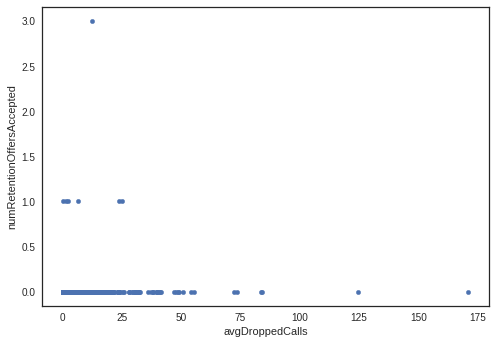

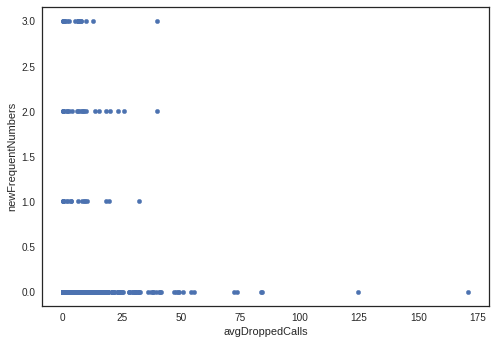

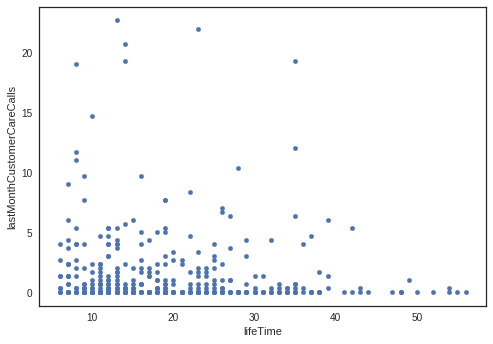

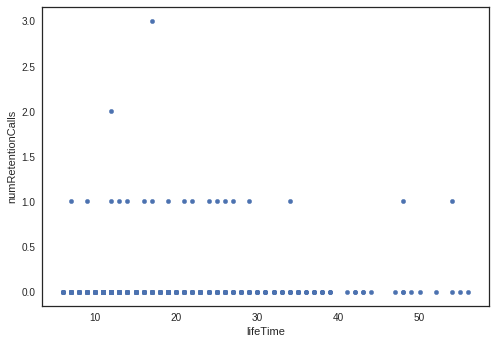

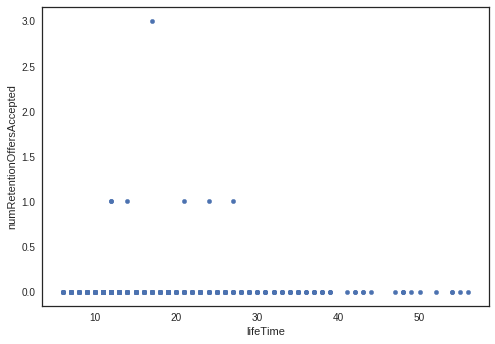

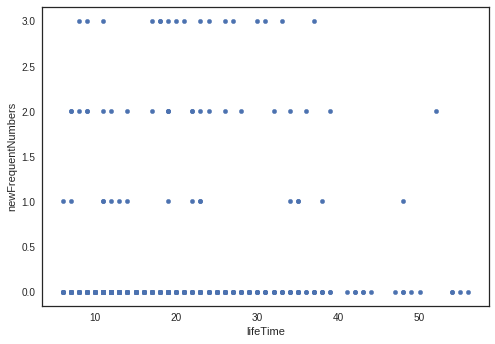

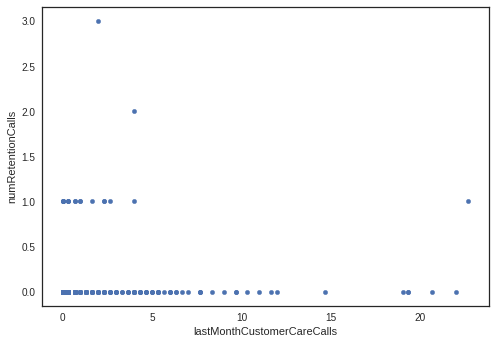

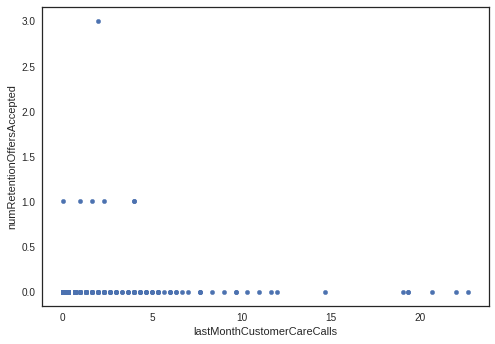

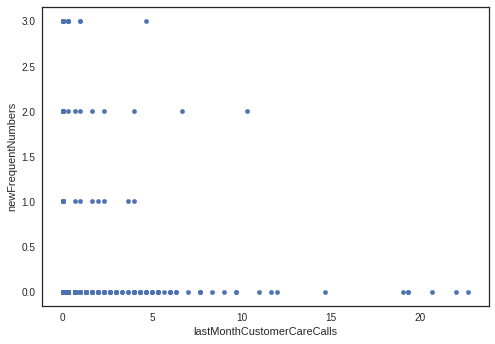

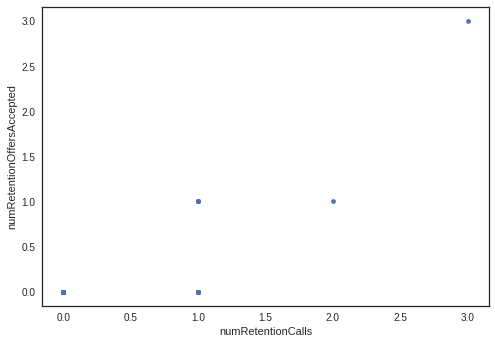

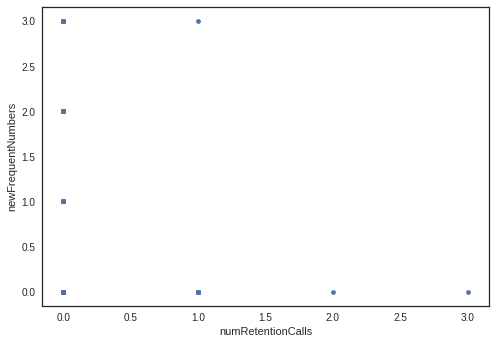

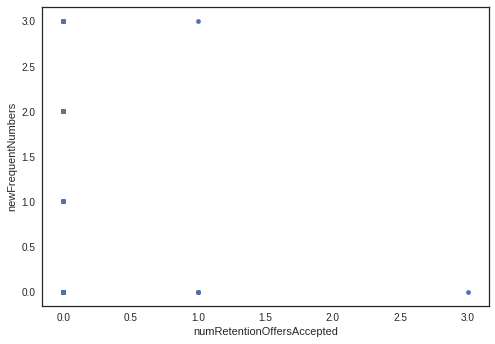

In [361]:
plotted=[]
for colA in continuous_columns:
    
    for colB in continuous_columns:
        
        if colB != colA and colB+colA not in plotted:
            plotted.append(colA+colB)
            df_train.plot(kind='scatter', x=colA, y=colB)
            plt.show()
            plt.clf( )

As mentioned in the homework 1 sample solution, handsetage/lifetime have a linear cut off, as no phone is older than its owner.

AvgDroppedCalls appears to have slightly higher values for phones with a low handset age. The customers with new pones could be receiving unsolicited spam calls and dropping them. However, it is impossible to verify this from the data.

AvgBill and avgRecurring charge appear to be somewhat linearly correlated, with no customer having an avgBill significantly less than his/her avgrecurringCharge. This is similar for avgBill and avgOverBundleMins. The shape is less linear for avgMins and avgBill, suggesting that customers get a certain amount of minutes that are not included in their bill.

The distribution of callMinutesChangePct is wider for increasing values of avgMins.

AvgMins and avgOut calls have something of a linear relationship, which I feel is self explanatory.

Values of peakOffPeakRatio are higher for lower values of avgMins, while values of avgMins are higher for lower values of peakOffPeakRatio. All this suggests is that customers are more likely to use their phone during peak time.

Bill amount change pct is both high and low for customers with a low amount of avgRoamCalls, suggesting that making occasional roaming calls is responsible for alot of the bill amount change in the first place. A similar relationship with peak off peak ratio suggests that occasional peak time calls can be responsible for an increased/decreased bill (i.e the customer doesn't usually make peak time calls, so they do it registers as a change in their bill.

The number of customer care calls is significantly higher for those with a low peakOffPeakRatio, and it is difficult to understand why this may be from the data.

## Plotting a small group of continuous features as a scatter matrix
This might make it easier to see and understand some of the points I made above.

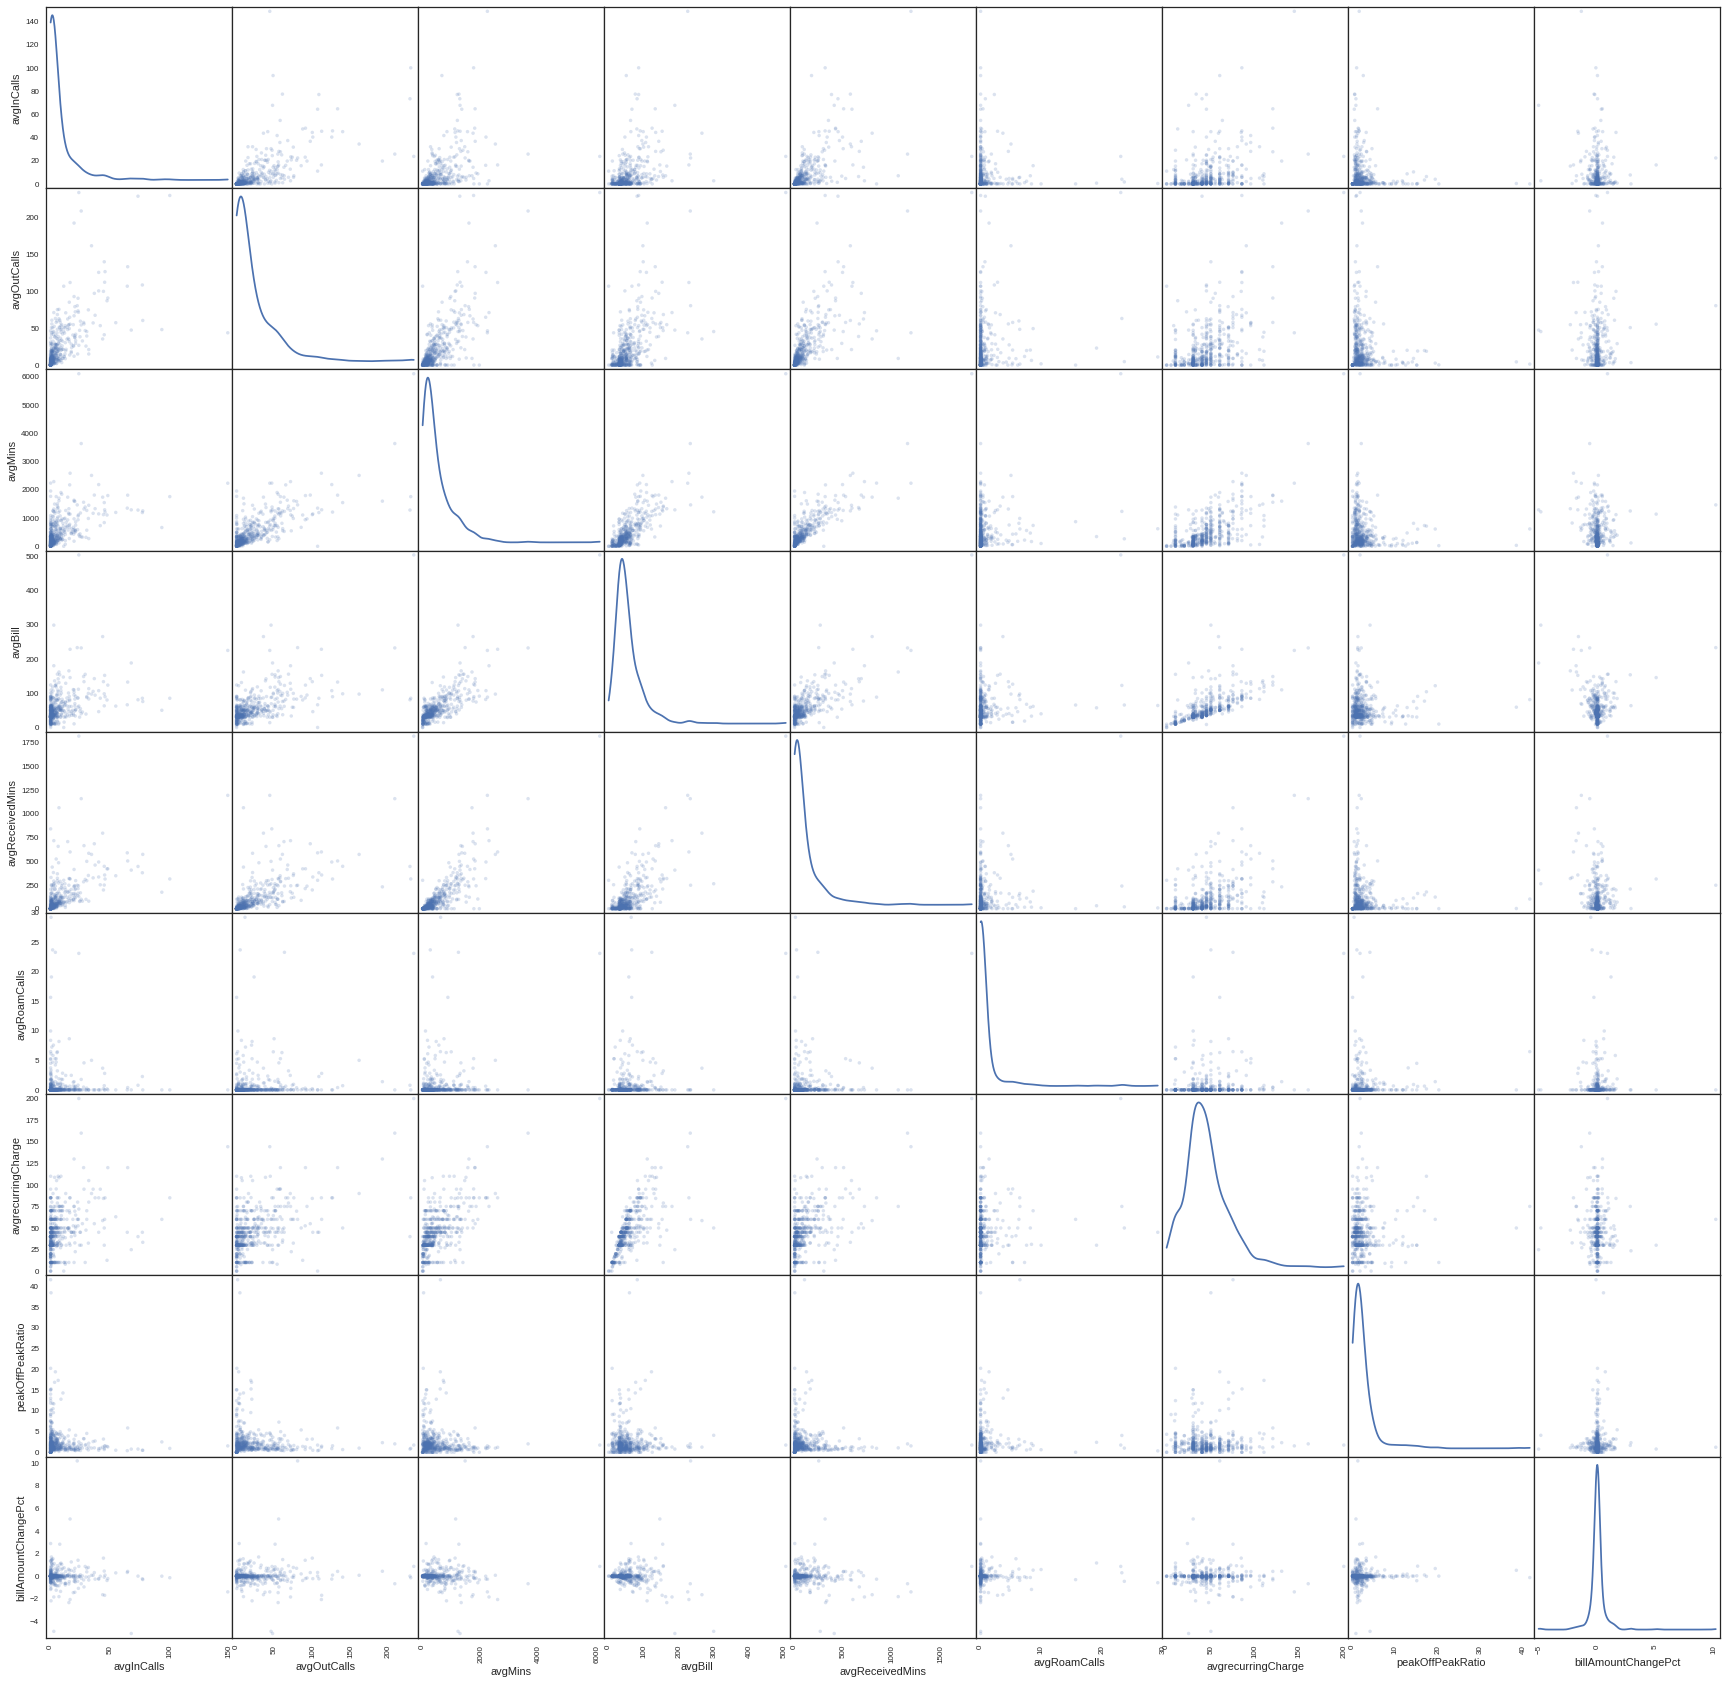

In [15]:
#code from stack overflow
from pandas.plotting import scatter_matrix
ax=scatter_matrix(df_train[['avgInCalls','avgOutCalls','avgMins','avgBill','avgReceivedMins', 'avgRoamCalls','avgrecurringCharge','peakOffPeakRatio','billAmountChangePct']], alpha=0.2, figsize=(30, 30), diagonal='kde')
plt.savefig(r"scatter.png")
plt.show()

# Q1.4 Plotting categorical features with churn

In [362]:
categorical_columns = df[['regionType','marriageStatus','income','creditRating', 'creditCard', 'children', 'smartPhone', 'homeOwner']].columns

In [363]:
#code copied from lab notebook example

def barplots(colA, colB, clean_df):
    clean_df = clean_df.copy()
    import matplotlib.patches as mpatches
    values = pd.unique(clean_df[colA].ravel())

    # Insert a new column called 'percent' and fill it with 0s
    clean_df['percent'] = 0

    
    for r in values:
        count = 1 / clean_df[clean_df[colA] == r].count()[colB]
        index_list = clean_df[clean_df[colA] == r].index.tolist()
        for i in index_list:
            clean_df.loc[i, 'percent'] = count * 100

    
    group = clean_df[['percent',colA, colB]].groupby([colA, colB]).sum()

    # Plot values of group in a stacked bar chart
    my_plot = group.unstack().plot(kind='bar', stacked=True, title= colB +"by "+colA, figsize=(15,7))

    # Define label colours and text and add to the plot
    red_patch = mpatches.Patch(color='green', label='Churned')
    blue_patch = mpatches.Patch(color='blue', label="Didn't churn")
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # Define x and y labels and min and max values for the y axis
    my_plot.set_xlabel(colA)
    my_plot.set_ylabel(colB)
    my_plot.set_ylim([0,100])
    plt.show()
    plt.clf()



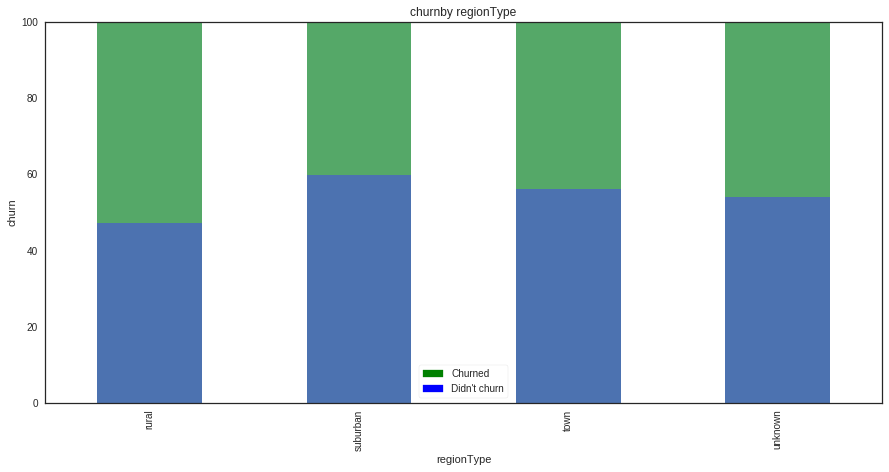

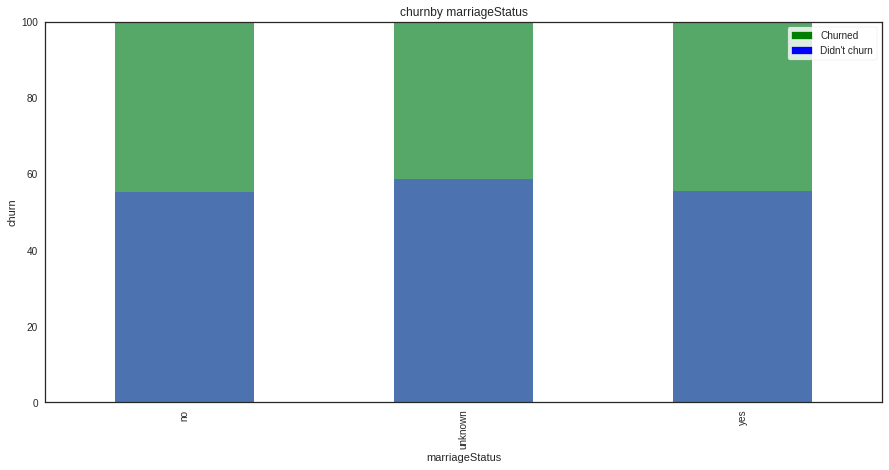

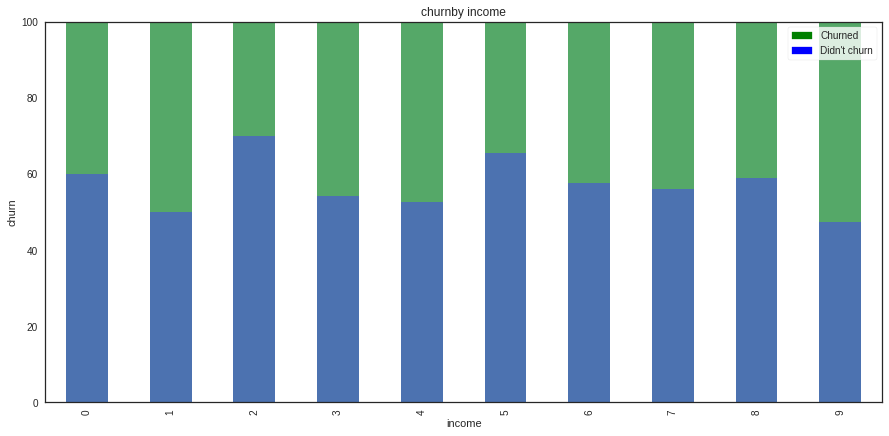

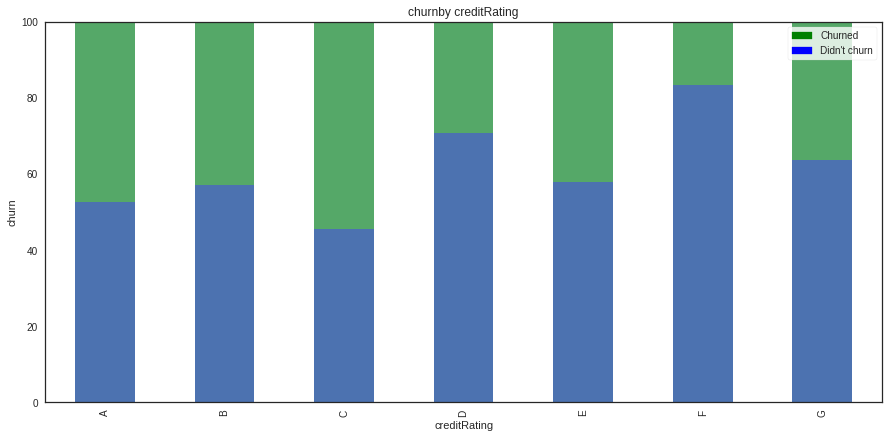

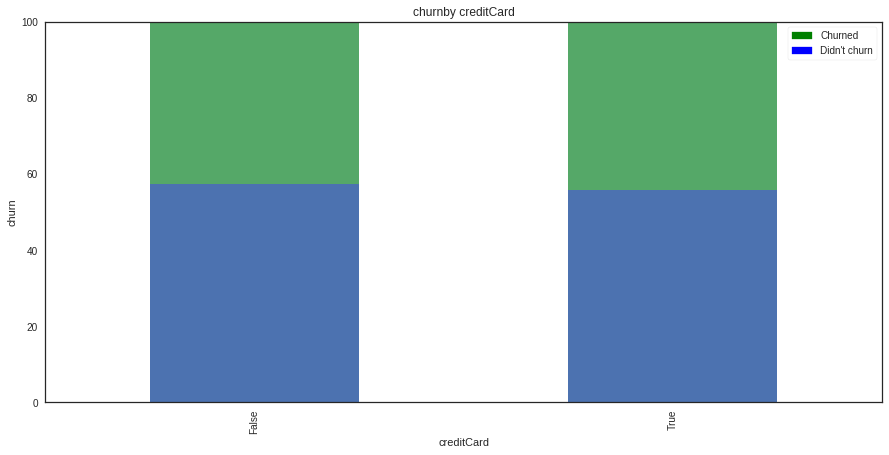

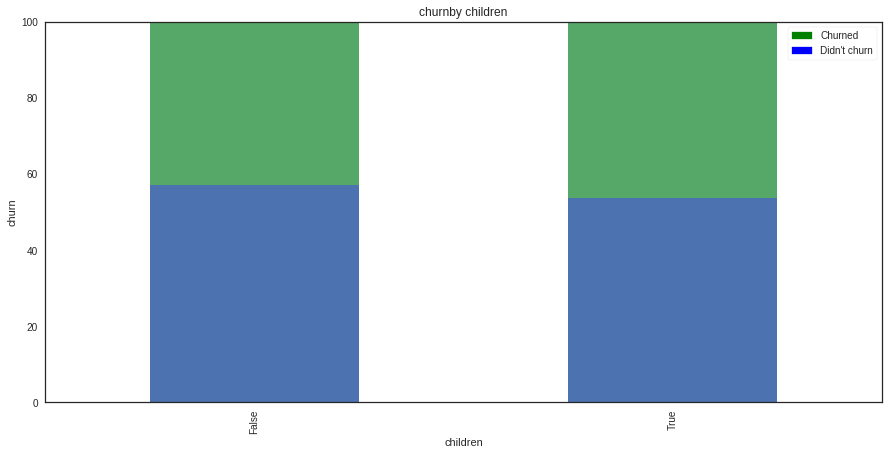

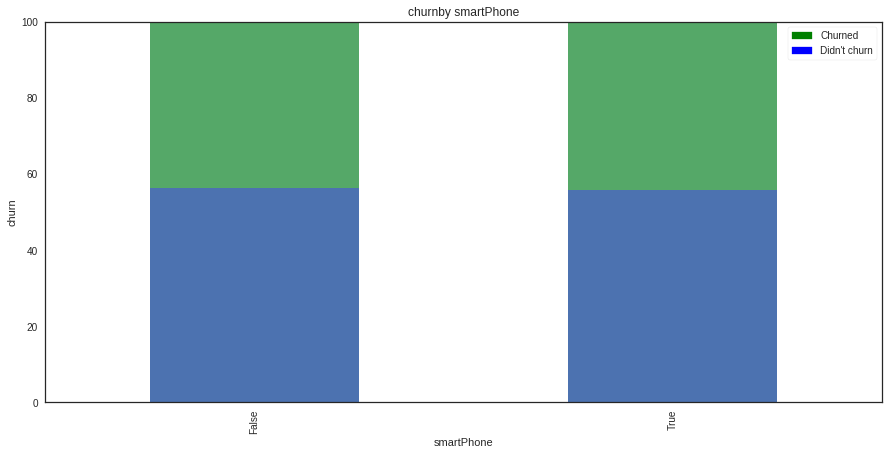

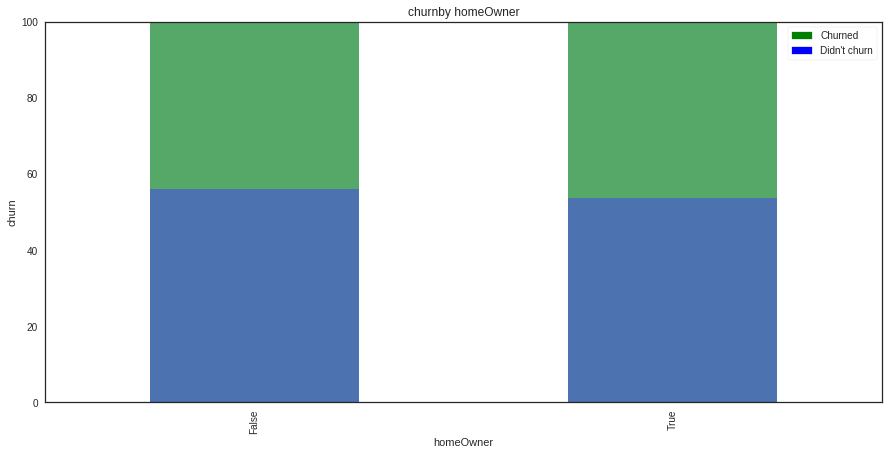

In [364]:

for column in categorical_columns:
    
    if column != 'churn':
            
            barplots(column, 'churn', df_train)
    
    

My boolean categorical features provide virtually no information about churn. The same is true of marriage status. The levels of churn are almost identical for every value.

Rural customers seem more likely to churn, but there is very little difference in churn rates for suburban, town and 'unknown' customers. 

Different income levels are either more or less likely to churn. Unlike in the Homework 1 sample solution though, it doesn't seem to be either the rich or poor who are significantly more likely to churn.

Different credit ratings also display different churn rates, with 'F' being particularly likely not to churn.

Income and credit rating seem like potential candidates to begin modelling with, as there is some information here, at least, about churn.






# Q1. 5 Plotting scatter plots for all continuous features alongside churn

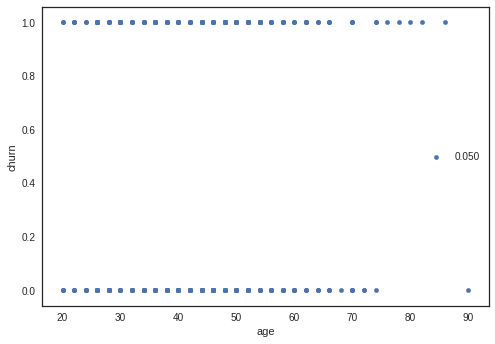

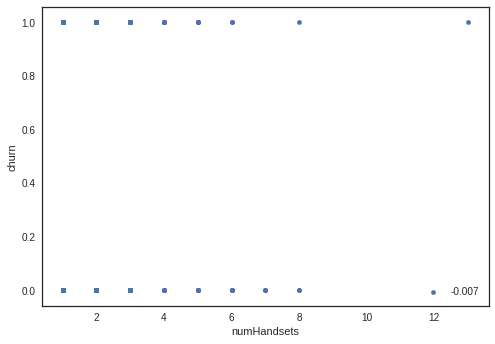

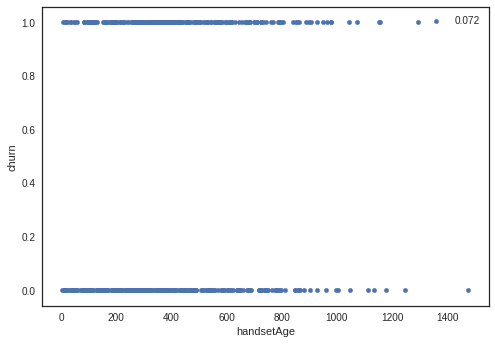

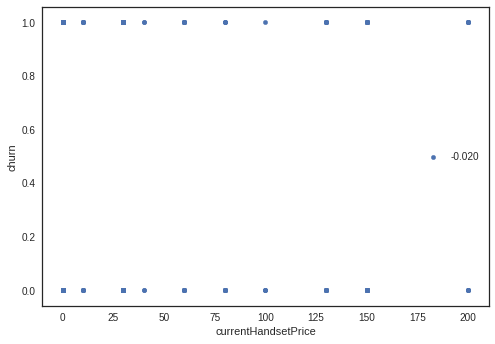

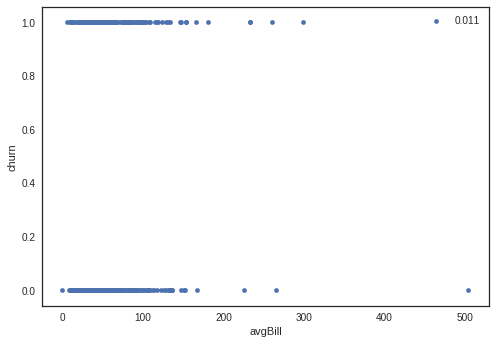

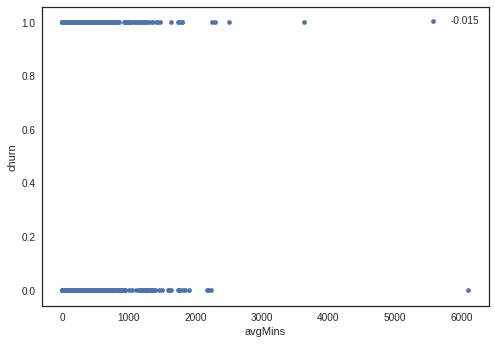

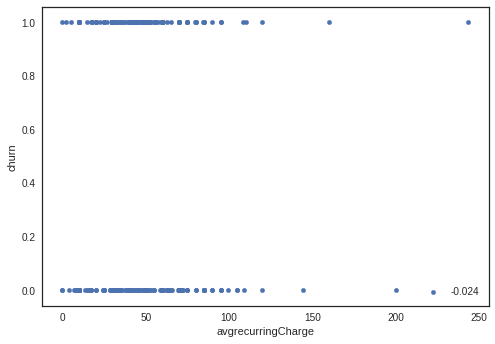

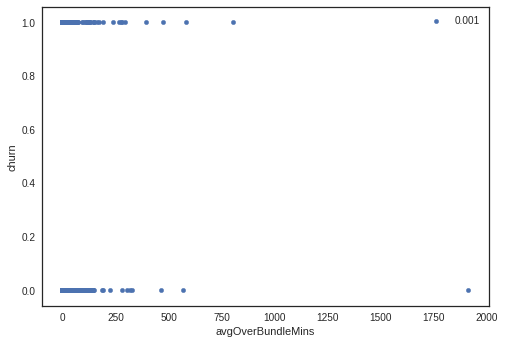

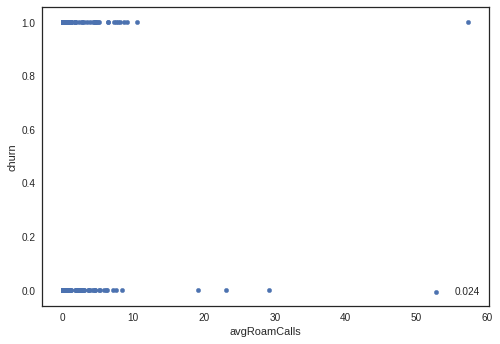

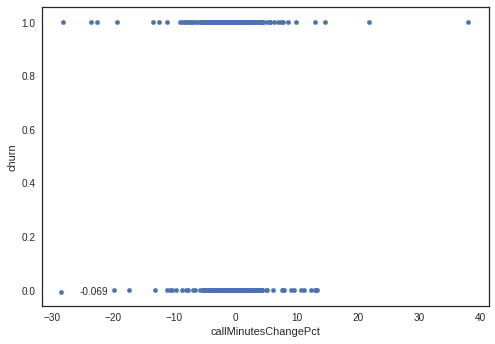

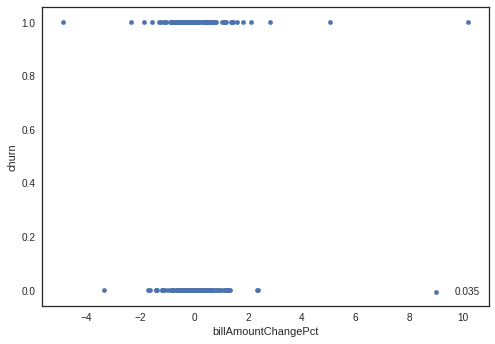

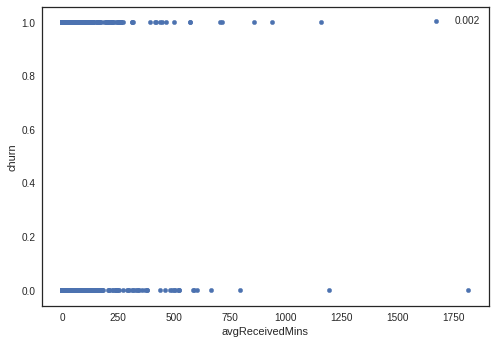

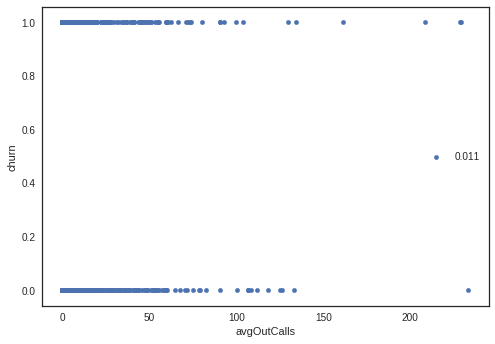

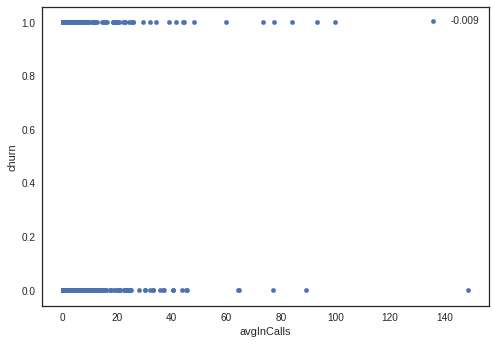

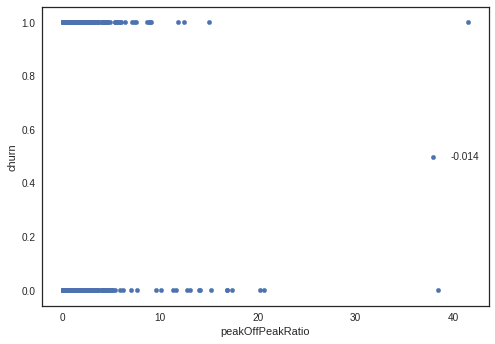

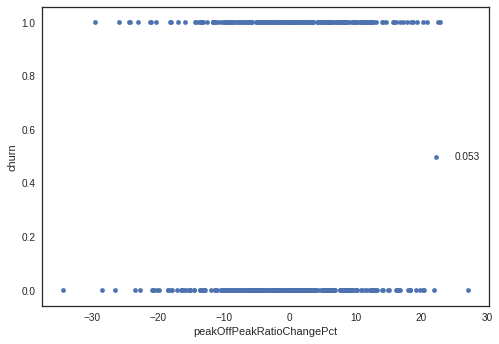

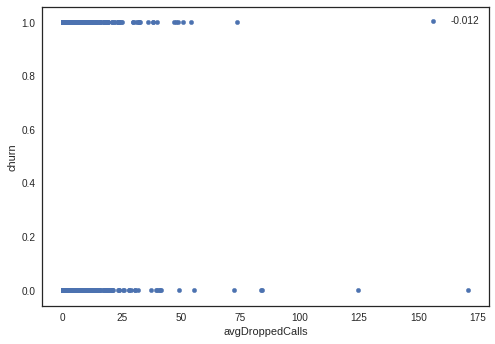

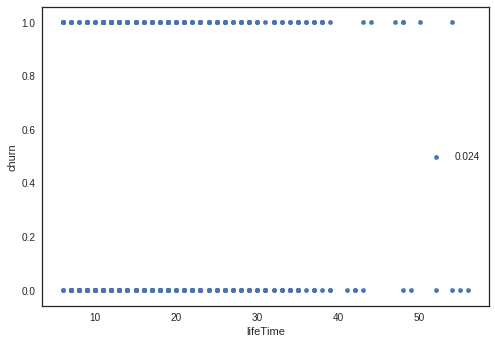

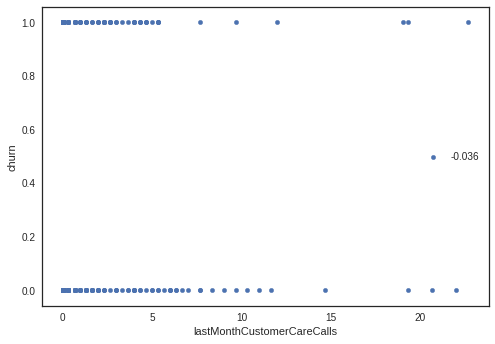

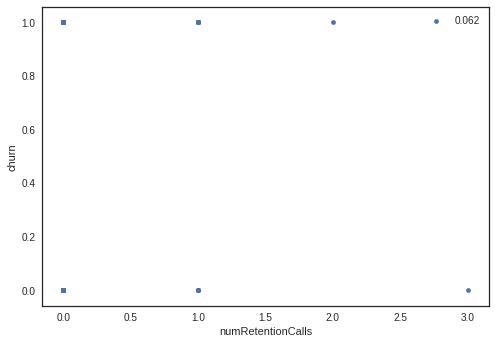

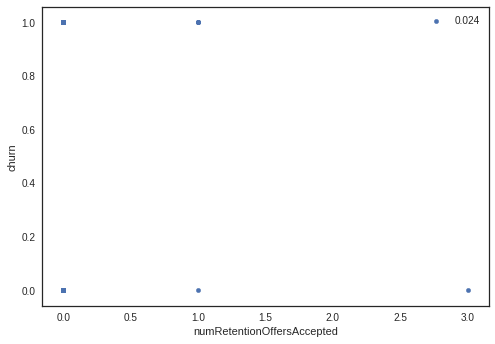

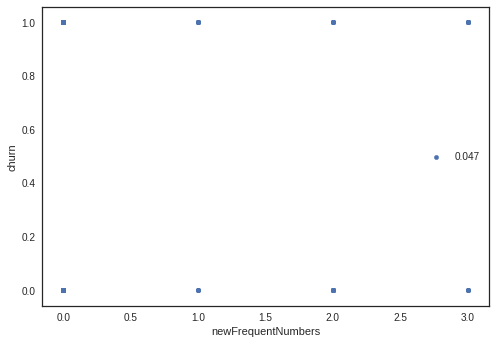

In [365]:


for colA in continuous_columns:
    
    
        
    df_train[[colA, 'churn']].corr().as_matrix()[0,1]
    df_train.plot(kind='scatter', x=colA, y='churn', label="%.3f" % df_train[[colA, 'churn']].corr().as_matrix()[0,1])
    plt.show()
    plt.clf( )

Looking at a description of two of these features

In [21]:
df_train[['lastMonthCustomerCareCalls', 'peakOffPeakRatio']].describe()

lastMonthCustomerCareCalls  peakOffPeakRatio
count                  507.000000        507.000000
mean                     1.304793          2.428203
std                      3.187125          3.649785
min                      0.000000          0.000000
25%                      0.000000          0.800443
50%                      0.000000          1.541667
75%                      1.330000          2.536671
max                     22.670000         41.541756

Considering these scatter plots, it seems like it will be very difficult to draw a linear regression curve over any of them. Except for maybe the outliers, we will be looking at best at a fifty-fity chance of correctly identifying churn from any one of these features. The majority of the plots consist of churn/non churn values almost directly above each other on the graph.

We can see that customers with a relatively high number of lastMonthCustomerCareCalls were less likely to churn. However, on investigating further, the mean number of lastMonthCustomerCareCalls was 1.3 - a region of the graph in which it is virtually impossible to distinguish between churn/non-churn. The same is more or less true for peakOffPeakRatio.

### Plotting separate boxplots for all continuous features, dependant on churn

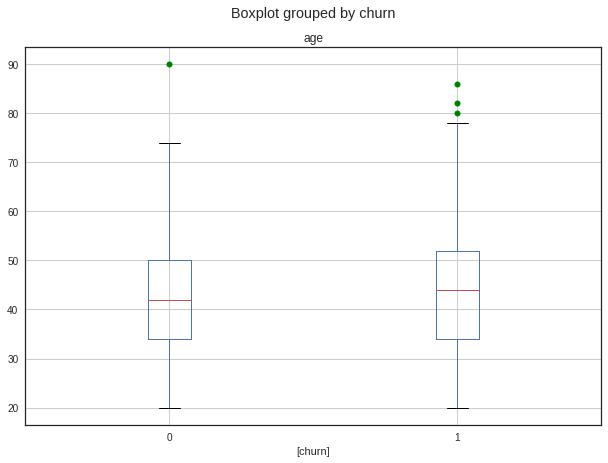

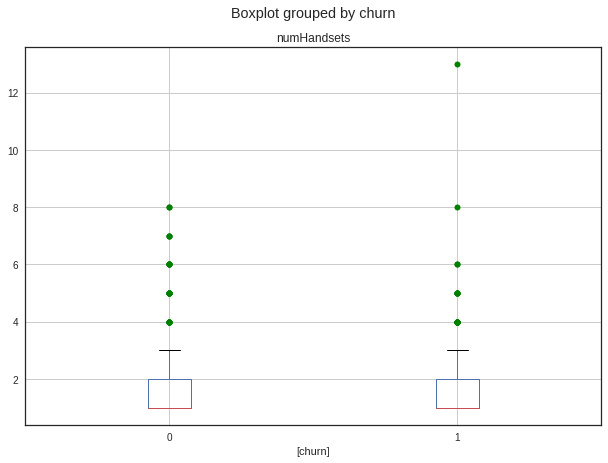

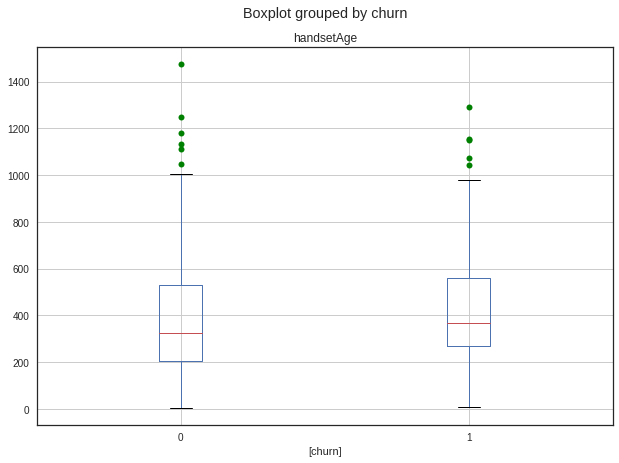

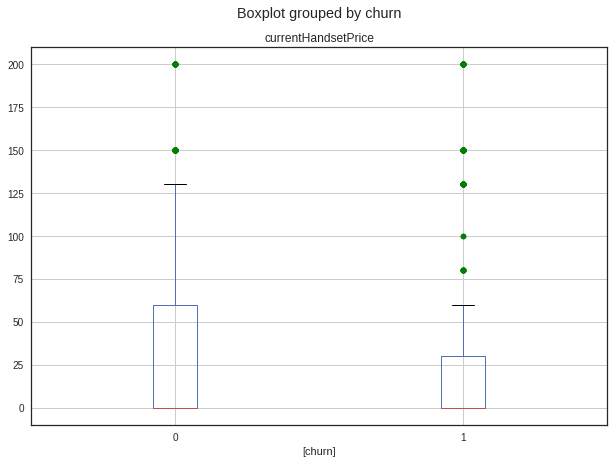

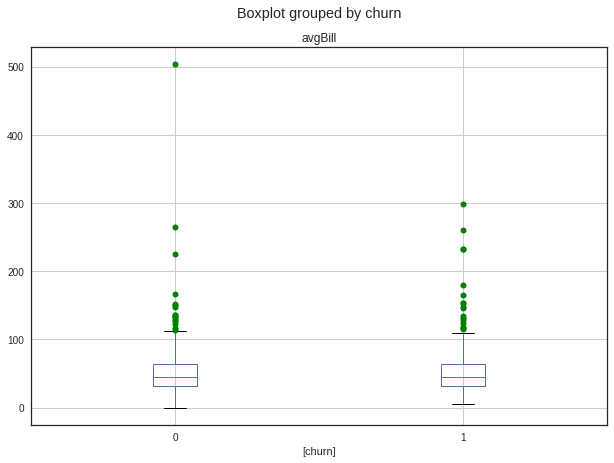

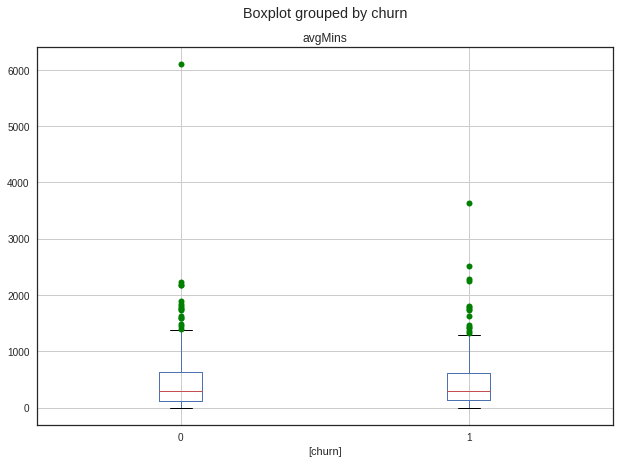

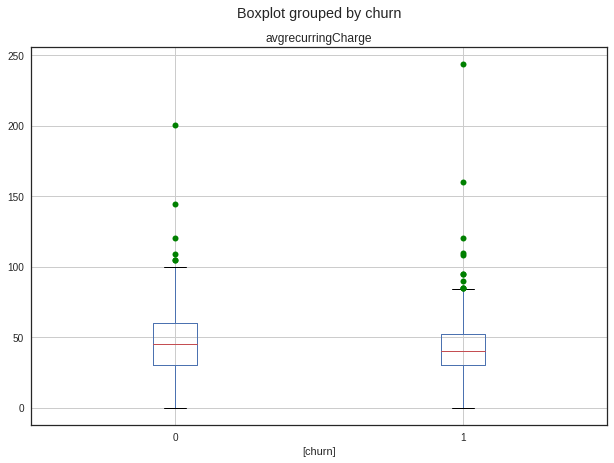

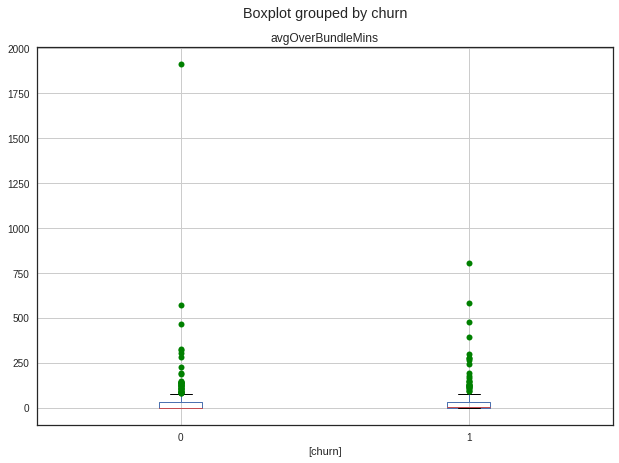

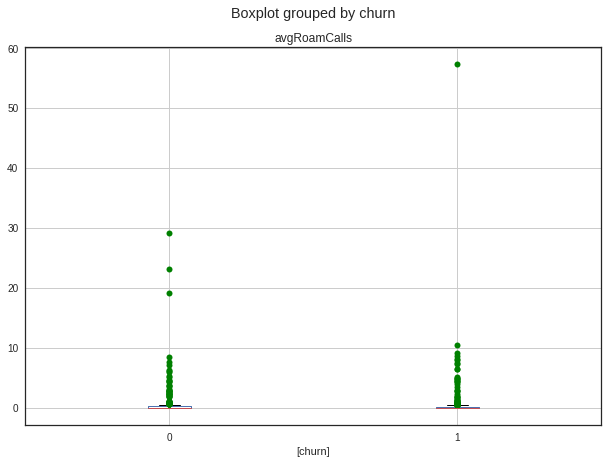

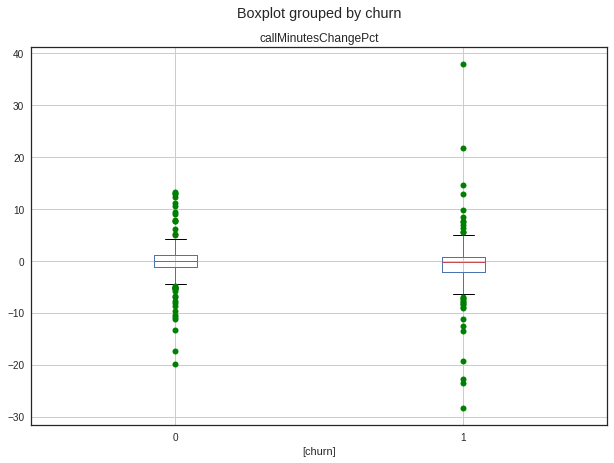

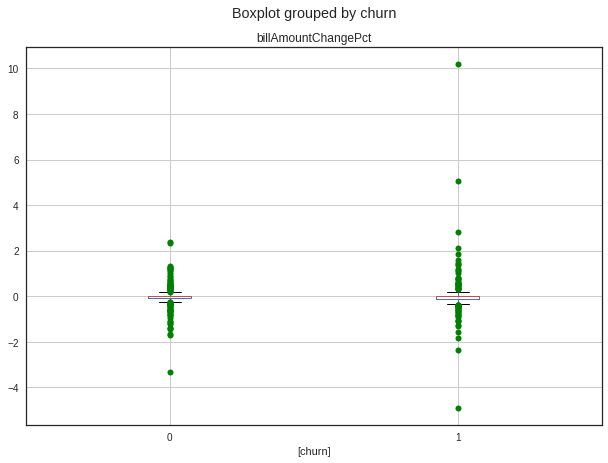

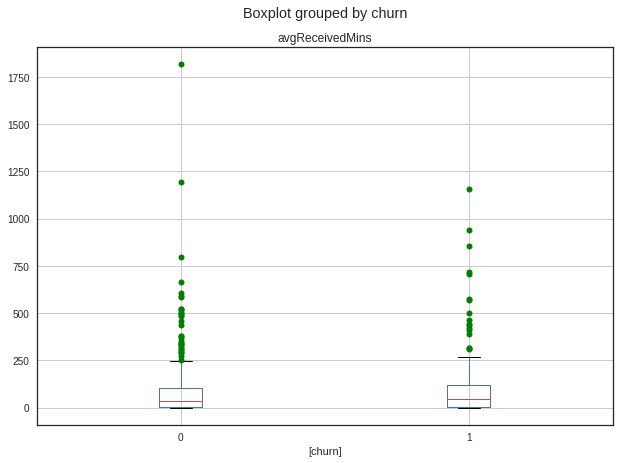

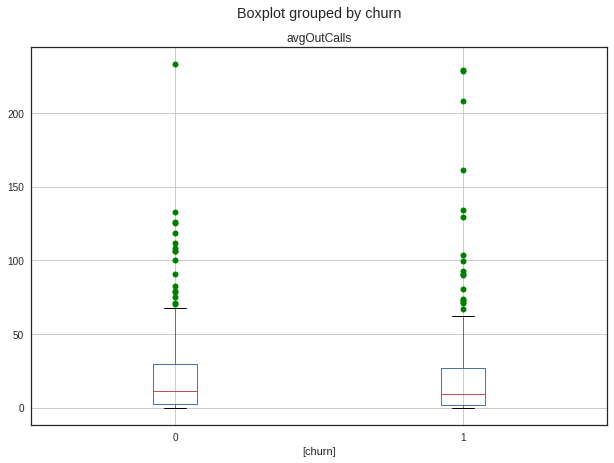

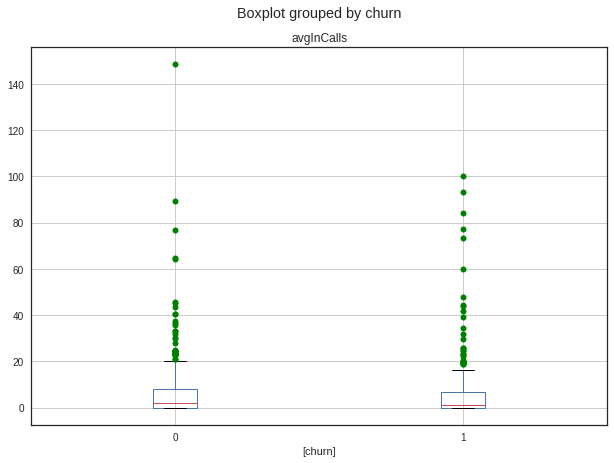

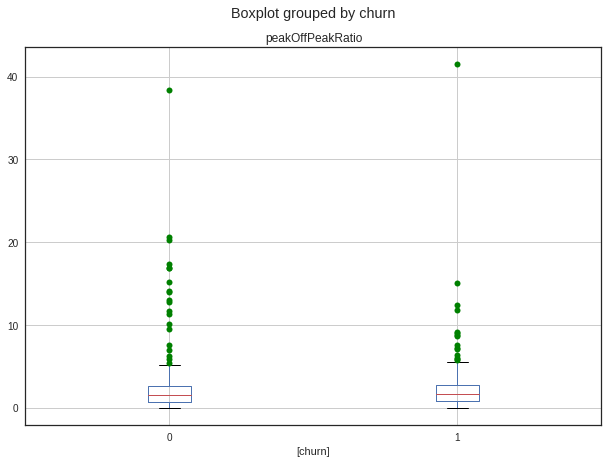

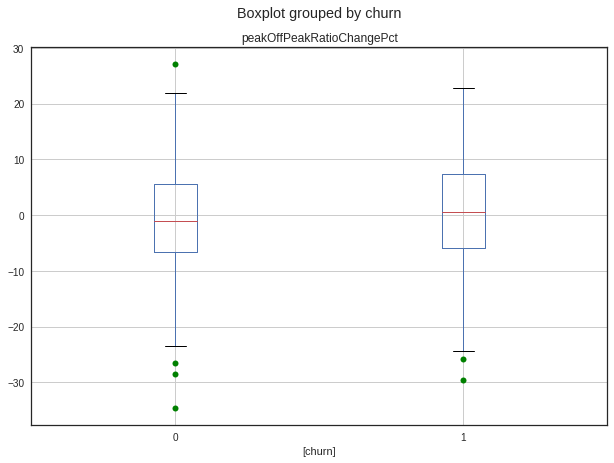

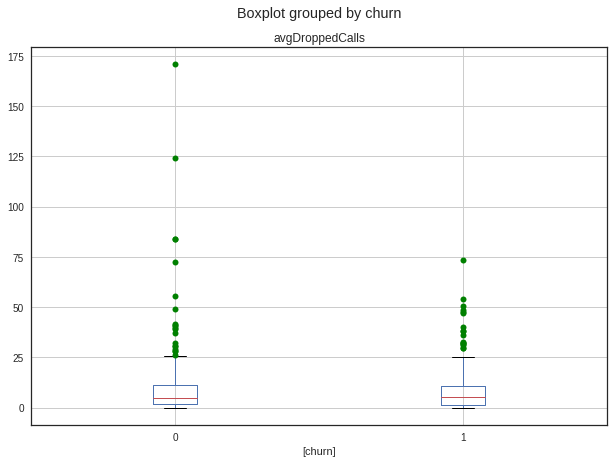

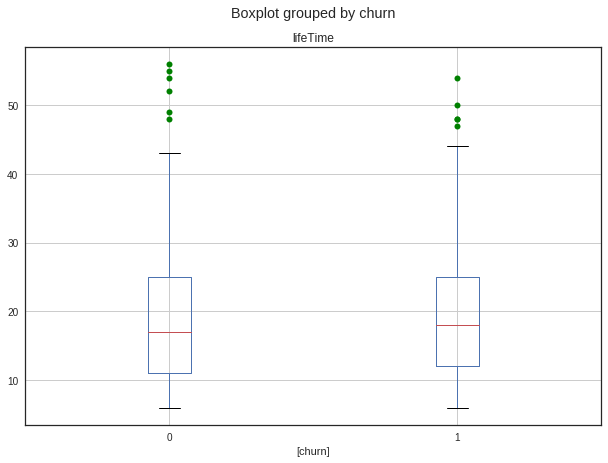

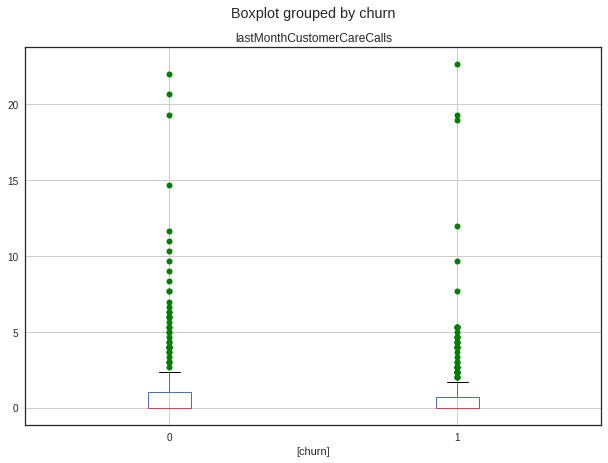

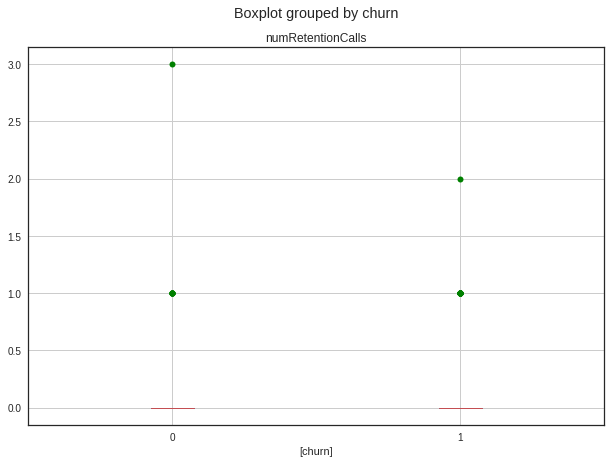

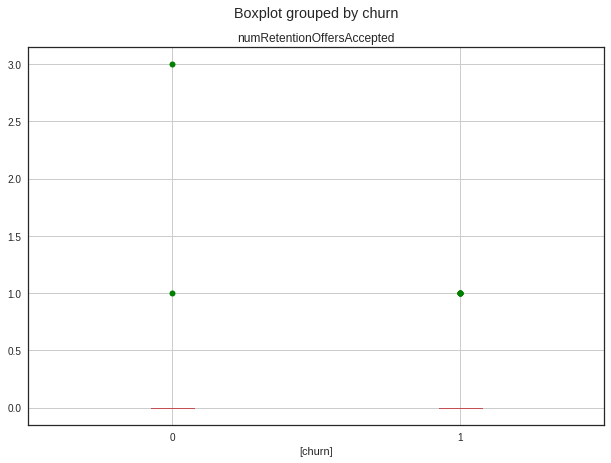

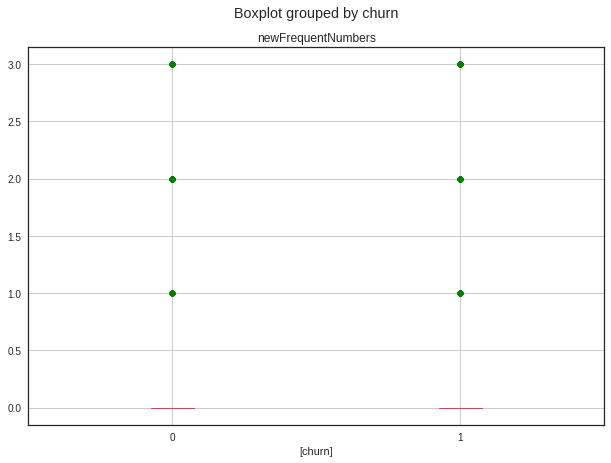

In [366]:

plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
for column in continuous_columns:
    df_train.boxplot(column=[column], by=['churn'], flierprops=flierprops, figsize=(10,7))
    plt.show()
    plt.clf()


In the above, we can see different distributions for the churn/not churn samples of a number of features. The distribution of currentHandsetPrice is noticeably wider for those who did not churn. It might be possible to deduce that those with expensive handsets are less likely to churn. 

Something similar can be seen while comparing the first and third quartiles of handsetage. This part of the distribution has slightly older phones for those customers who churn. The same is true of average recurring charge, indicating that those with a higher average recurring charge are more likely not to churn. They could be on a strict contract where they are paying off the cost of their phones every month. 

A very small difference can be seen with billAmountChangePct, indicating, perhaps, that customers use their phones slightly less when they are getting ready to churn.

For callMinutesChangePct, the centre of the distribution leans lower for those who are about to churn. However the outter parts of the distribution are slightly higher, and the outliers are more dispersed. I am unsure as to what insight can be taken from this.

### Plotting separate histograms for all continuous features, dependant on churn

In [628]:
continuous_columns = df[['age','numHandsets','handsetAge','currentHandsetPrice', 'avgBill',
                         'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 
                         'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 
                         'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls',
                         'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls',
                         'numRetentionOffersAccepted', 'newFrequentNumbers']].columns

age


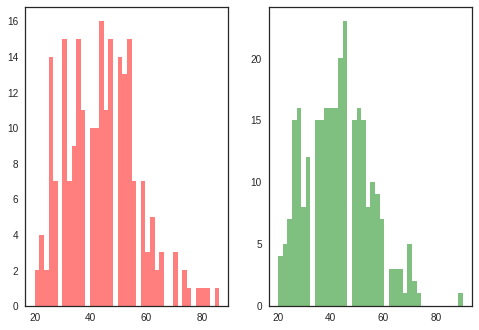

numHandsets


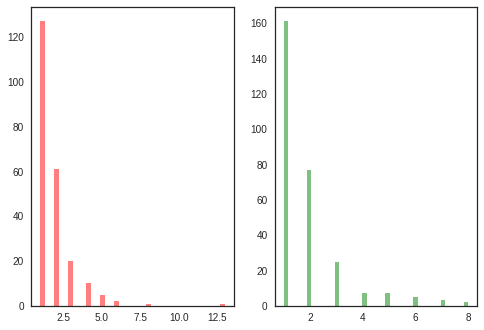

handsetAge


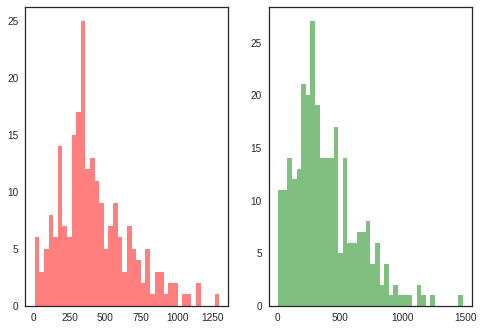

currentHandsetPrice


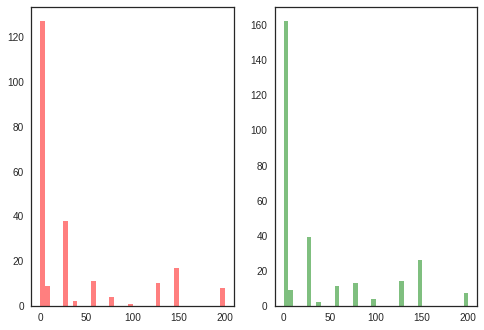

avgBill


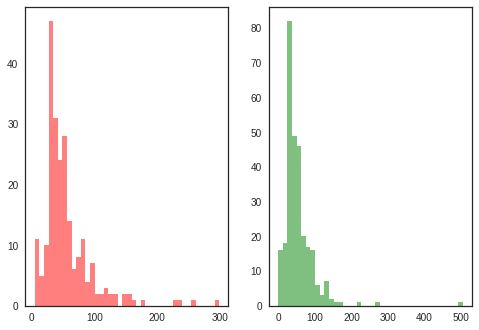

avgMins


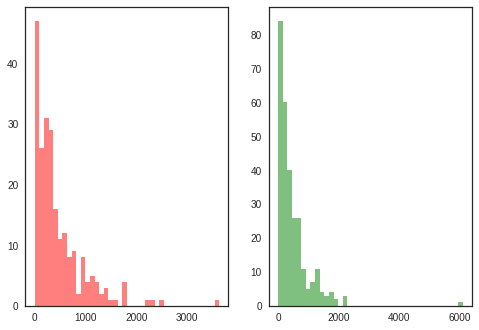

avgrecurringCharge


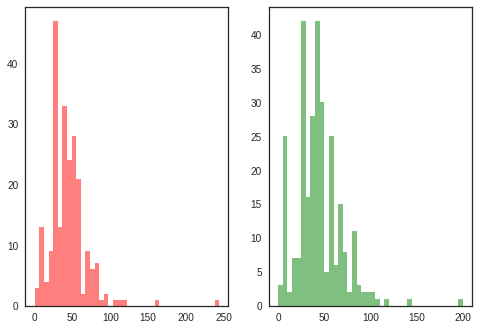

avgOverBundleMins


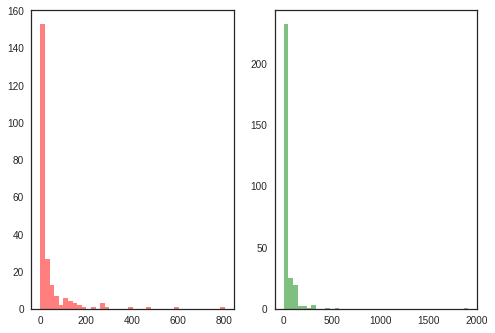

avgRoamCalls


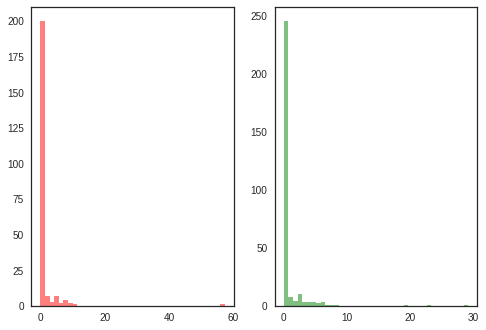

callMinutesChangePct


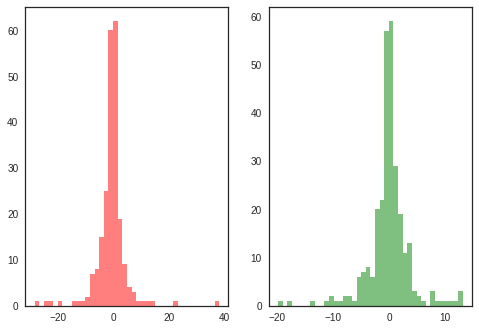

billAmountChangePct


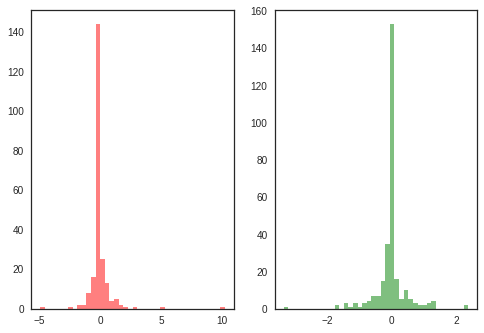

avgReceivedMins


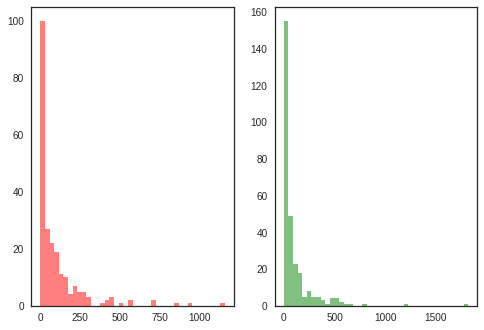

avgOutCalls


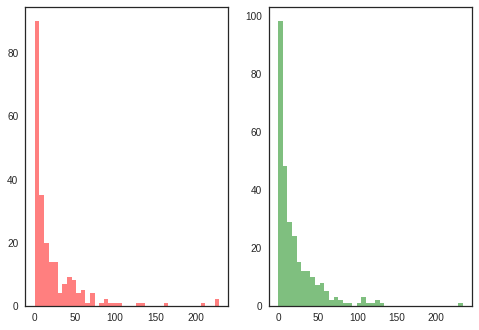

avgInCalls


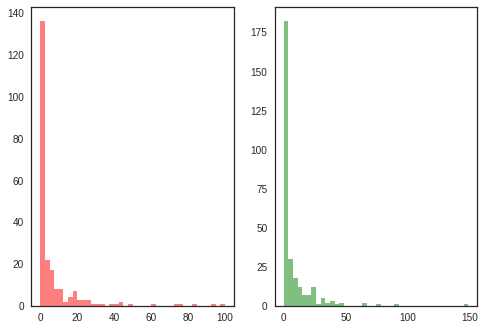

peakOffPeakRatio


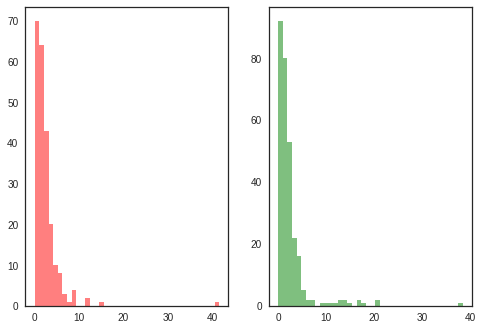

peakOffPeakRatioChangePct


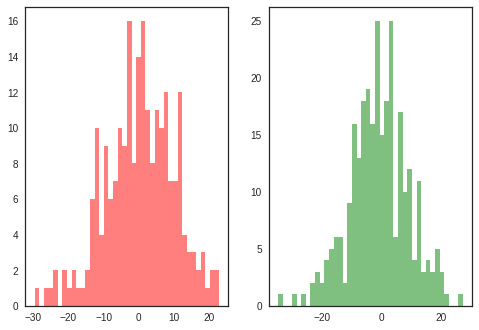

avgDroppedCalls


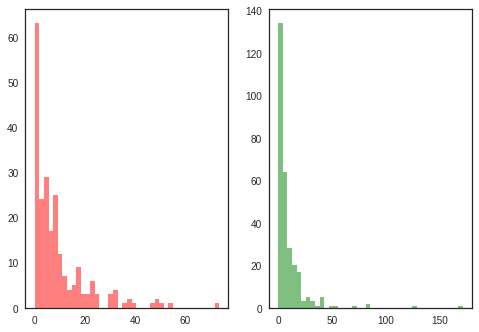

lifeTime


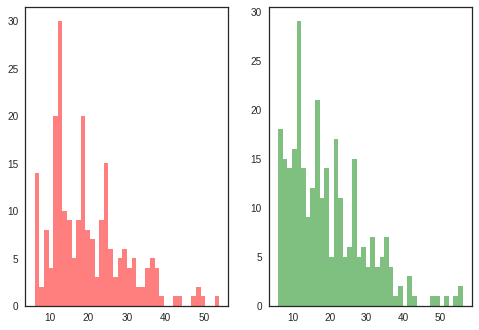

lastMonthCustomerCareCalls


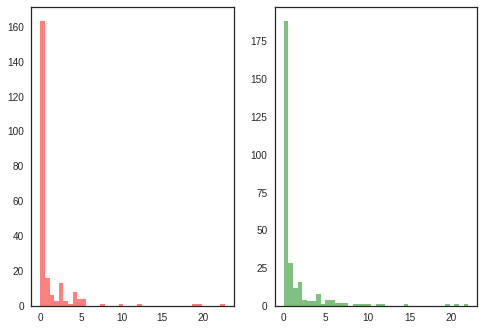

numRetentionCalls


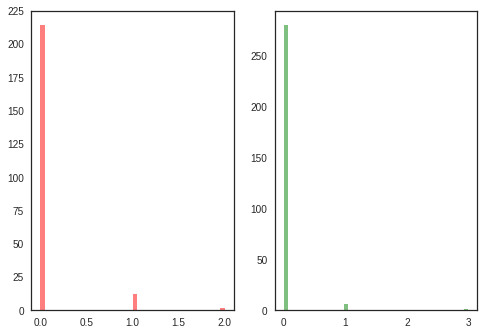

numRetentionOffersAccepted


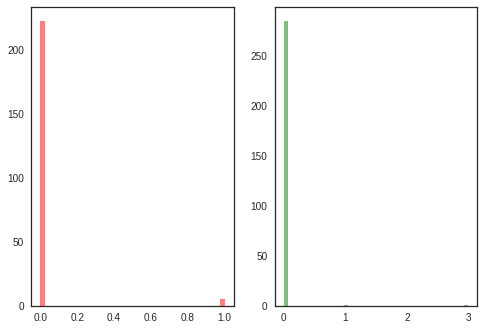

newFrequentNumbers


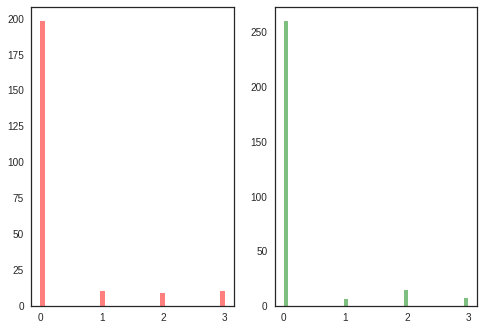

In [368]:
plt.figure()
for column in continuous_columns:
    print(column)
    fig, ax = plt.subplots(1,2)
    ax[0].hist(df_train[df_train['churn'] == True][column], bins=40, alpha=0.5, color='r')
    ax[1].hist(df_train[df_train['churn'] == False][column], bins=40, alpha=0.5, color='g')
   
    plt.show()
    plt.clf()

We can see different shapes in the distributions here, depending on churn/non churn. But nothing significant. The x axis is wider for some distributions, which makes it slightly harder to interpret. (E.g the values for avgRecurringCharge fall in the range 0-250 for churn, and 0-150 for non churn). Clamping outliers and re-plotting these graphs at a later stage might make this easier.

That some of the distributions have different shapes indicates that there is in fact information here about churn, but it is difficult to see how it might be represented in a way that our learning algorithms will be able to exploit.

With LifeTime, customers with a short lifetime seem less likely to churn. Customers whose life time is in the middle left of the range are also less likely to churn. This might be a candidate for fitting a polynomial curve.

Customers with a middling value of avgOutCalls also seem less likely to churn. This might be another candidate for a polynomial curve.

NumRetentionCalls, NewFrequentNumbers, and NumRetentionOffersAccepted all seem to contain too little information to be of any serious use.

## Binning continuous features and plotting them with churn proportion as stacked bar charts

The below method cuts the continuous features into equal width bins (based on the value of the continuous feature), and then shows the average churn rate for features in each bin. 

My thinking here is that this should allow us to get an impression of what the ideal regression line would look like for each feature. I did not think this was possible from the scatter plots. As such, we should be able to see if the feature would be better described as a polynomial or not.

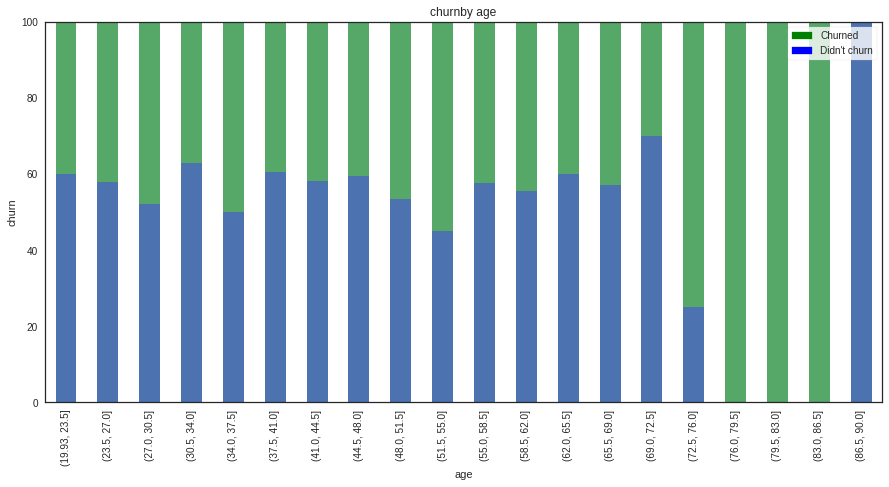

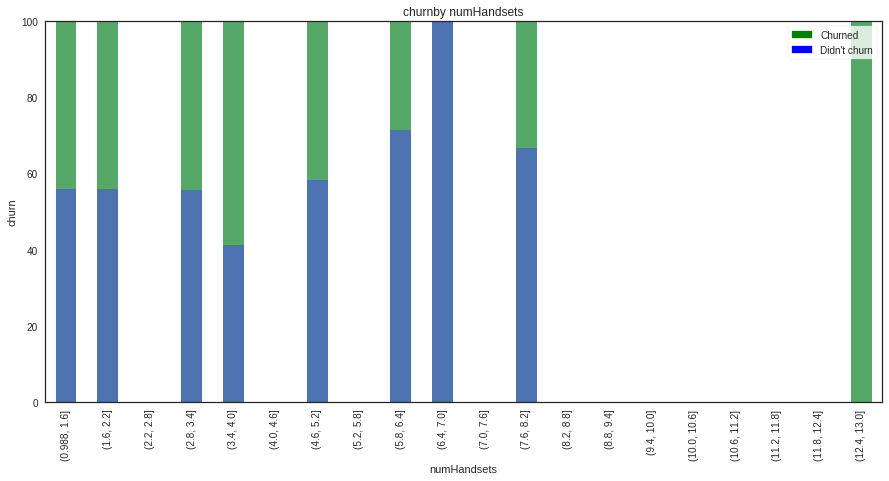

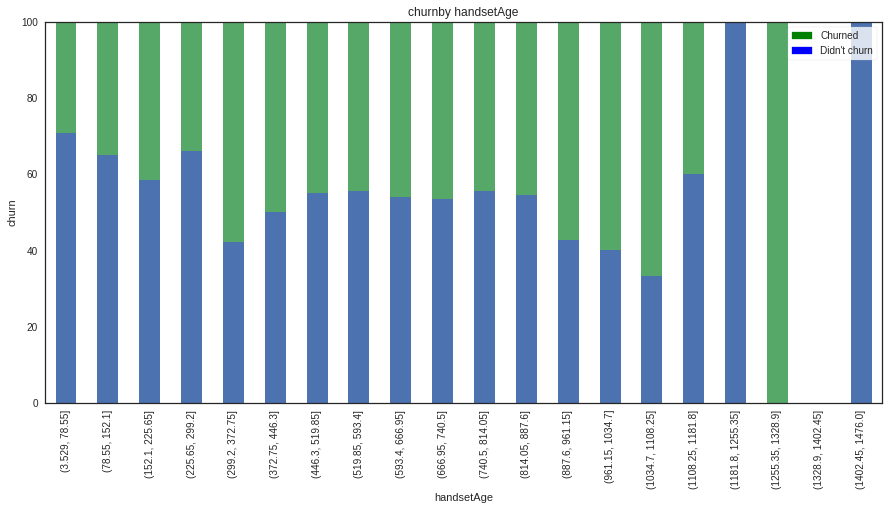

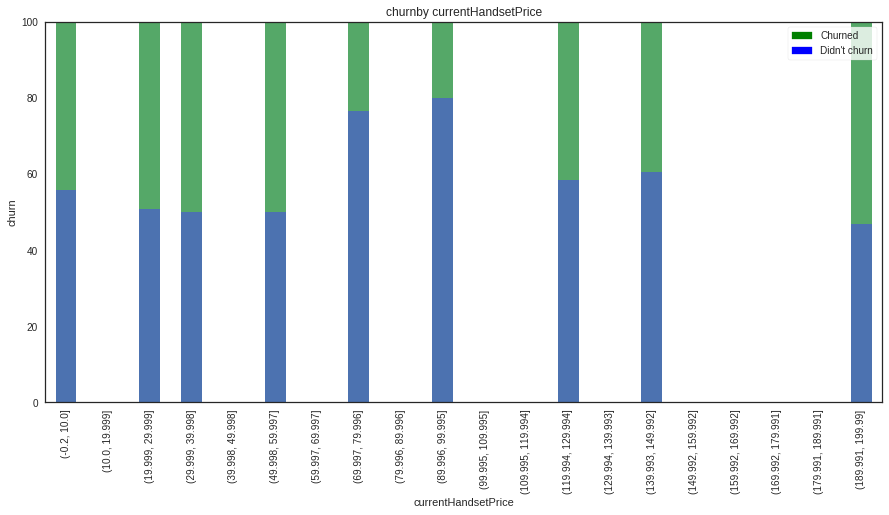

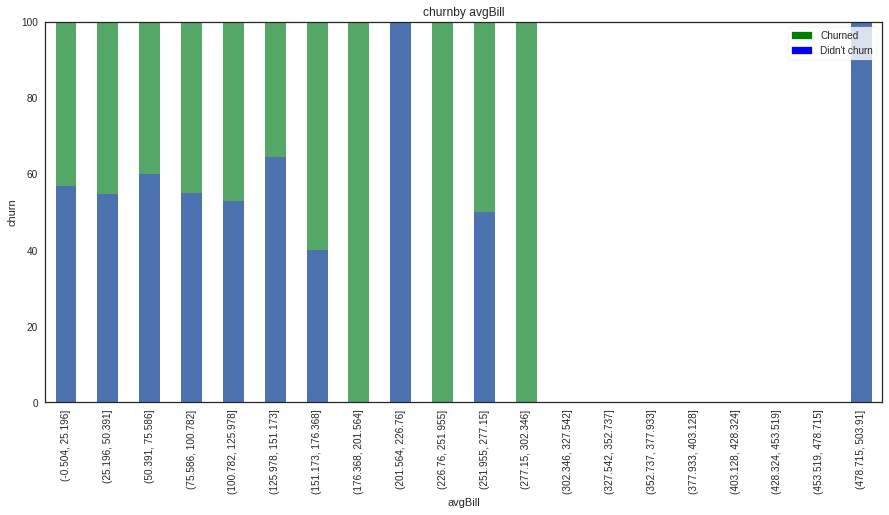

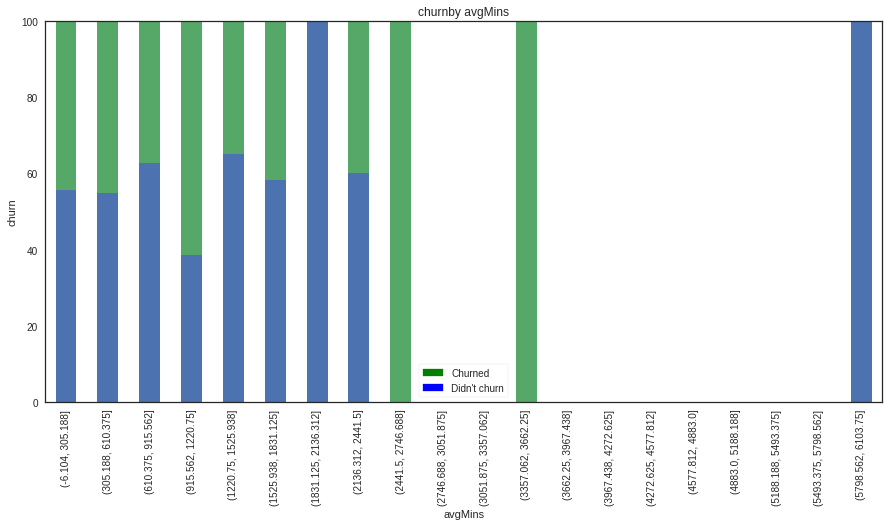

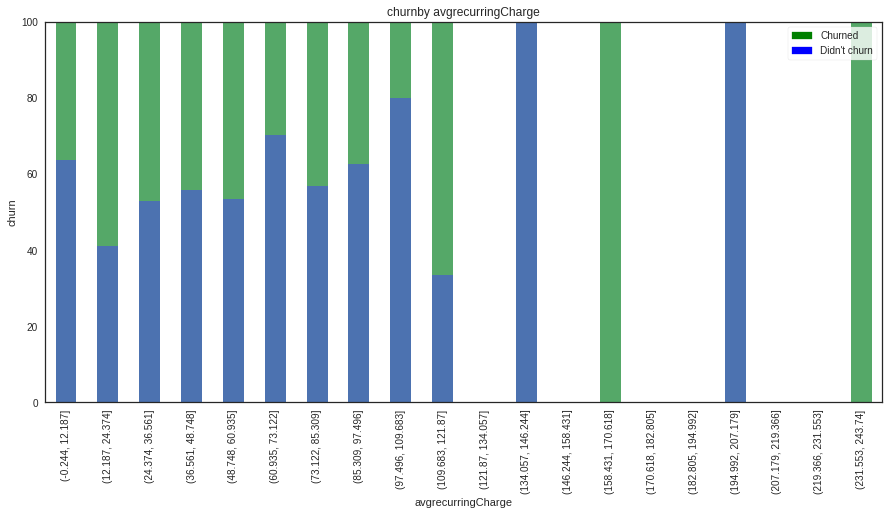

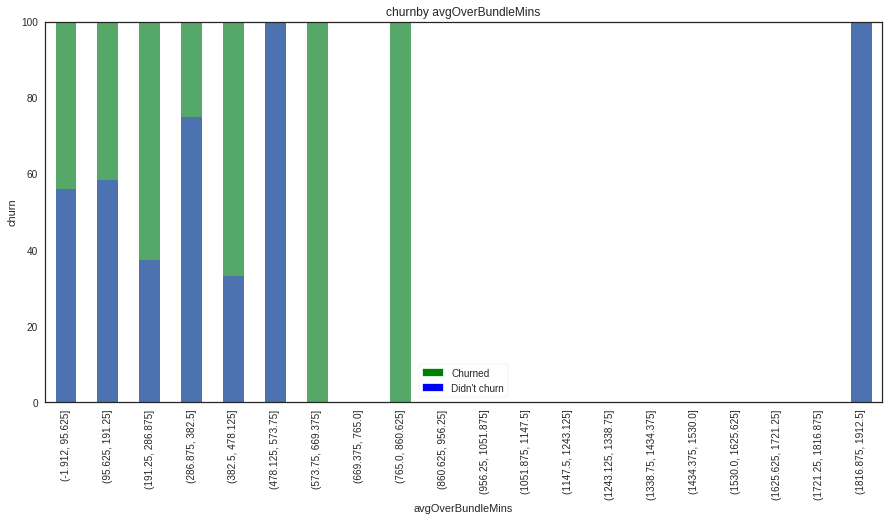

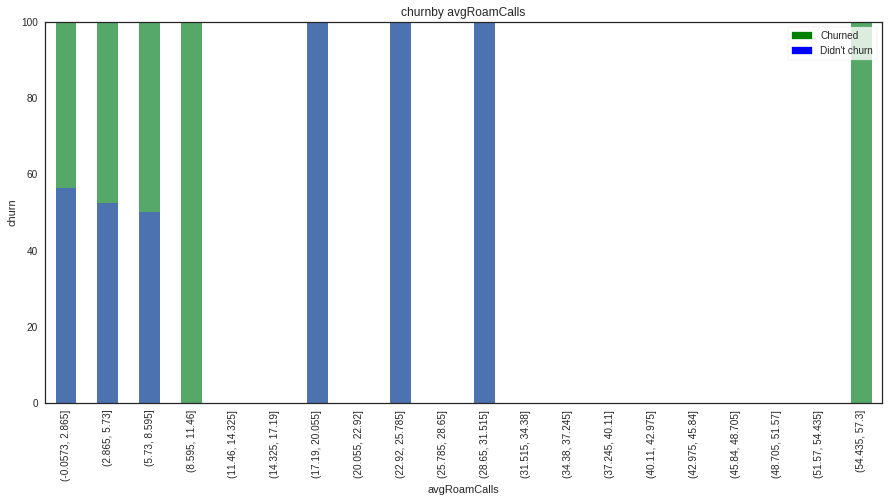

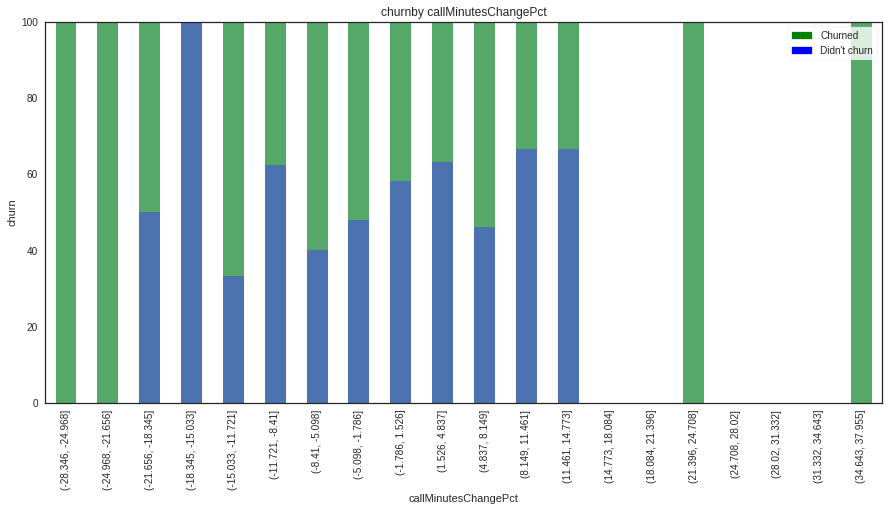

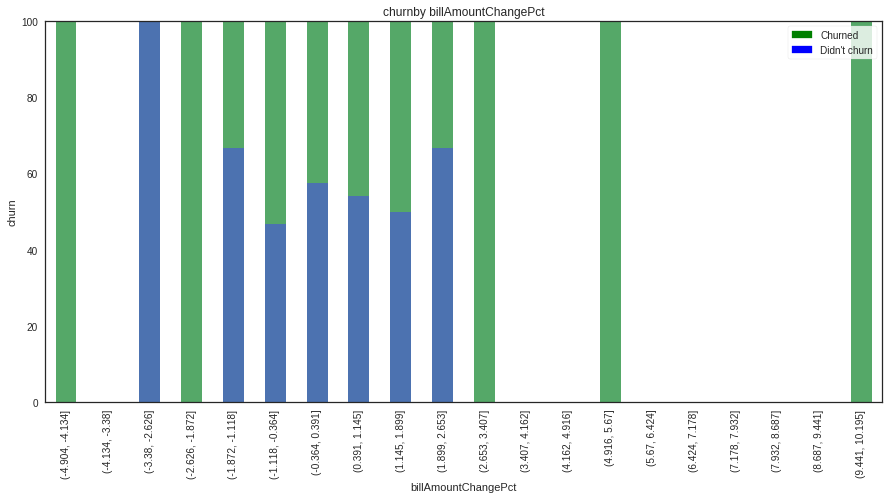

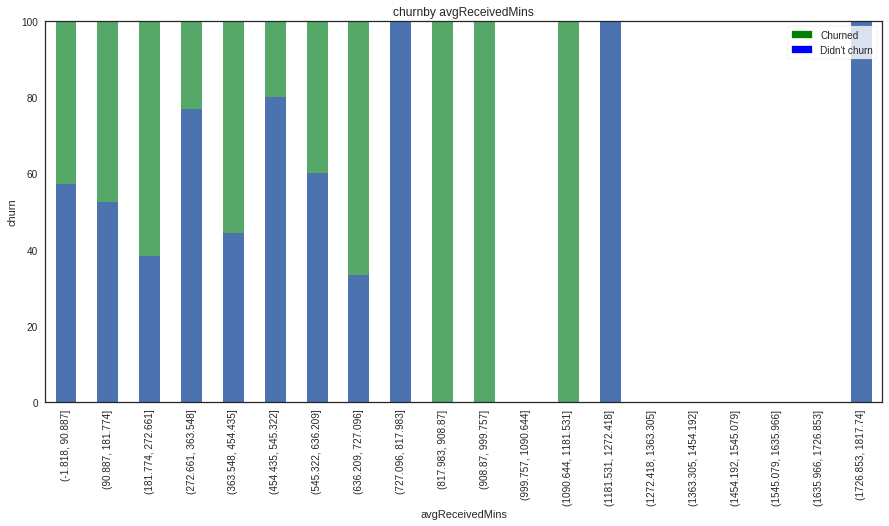

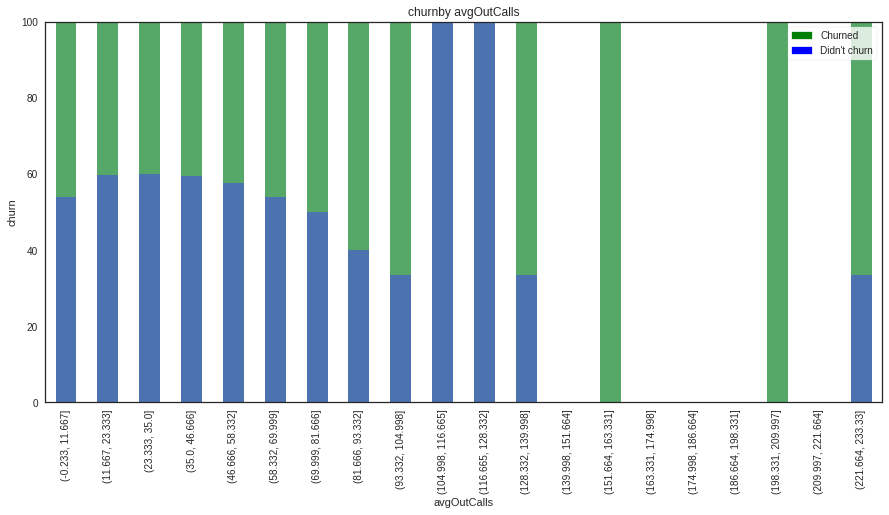

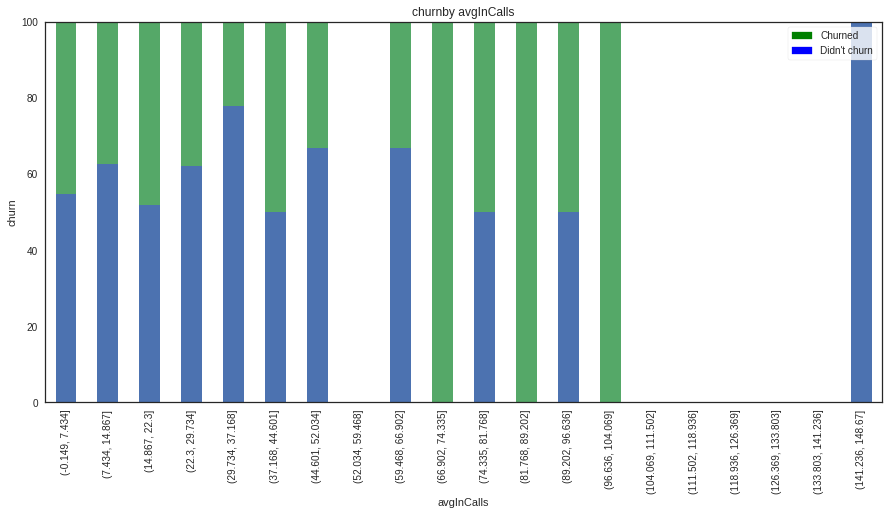

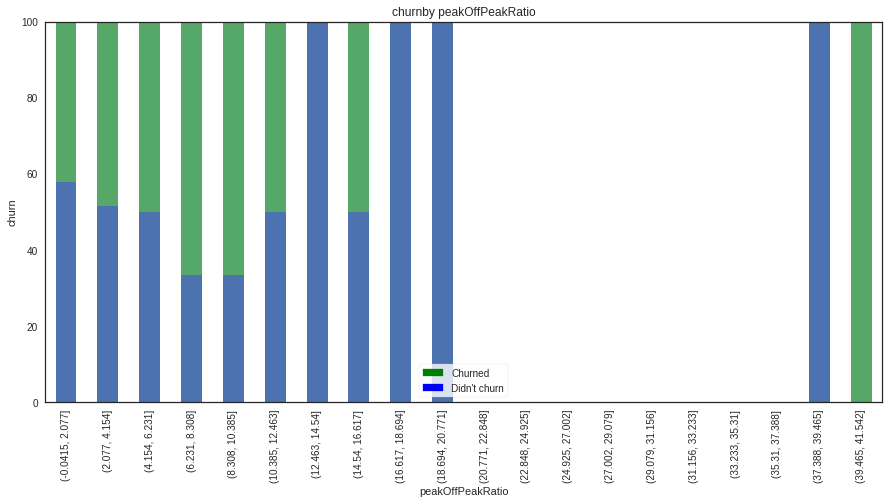

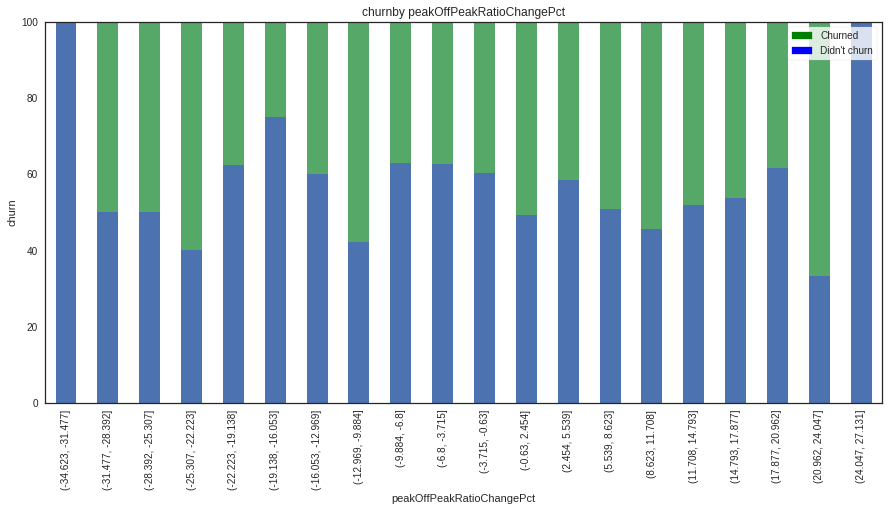

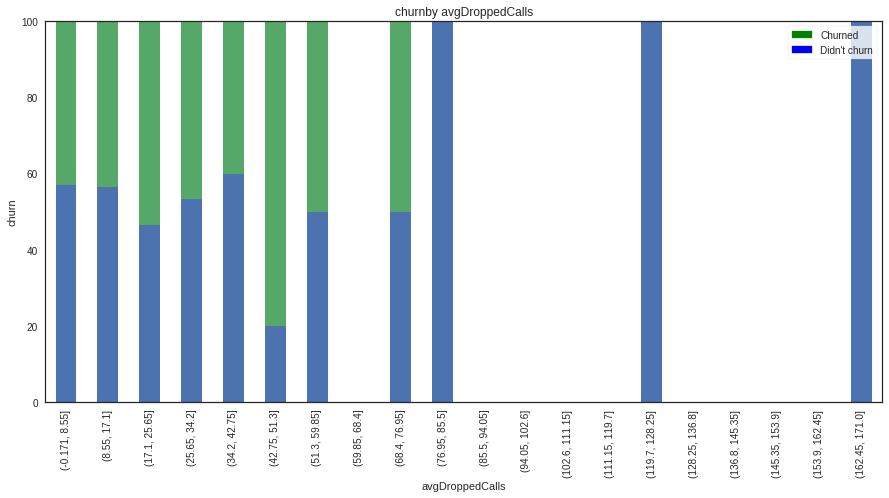

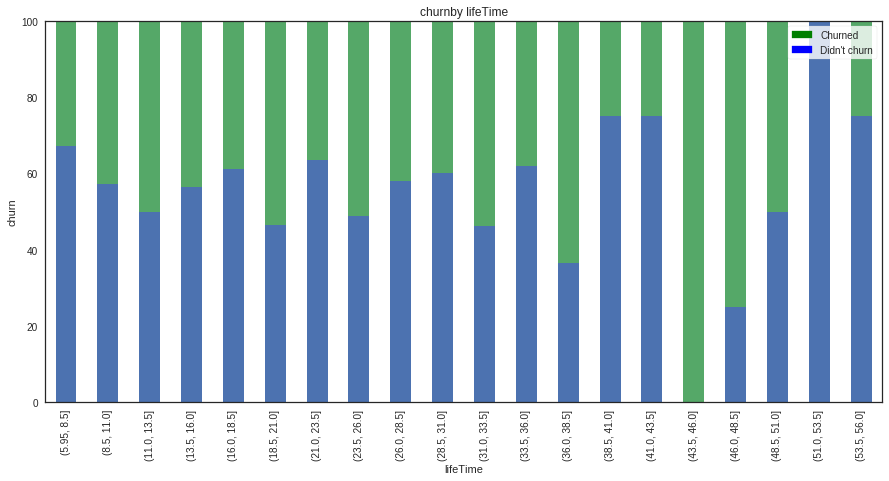

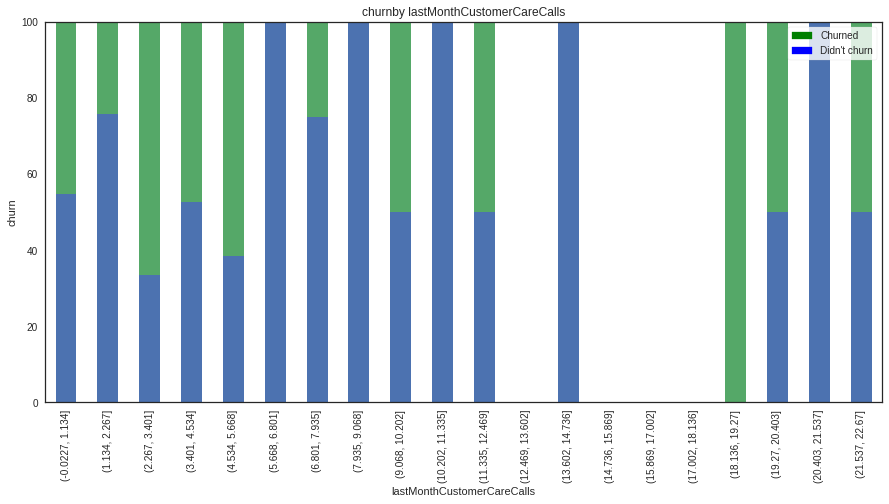

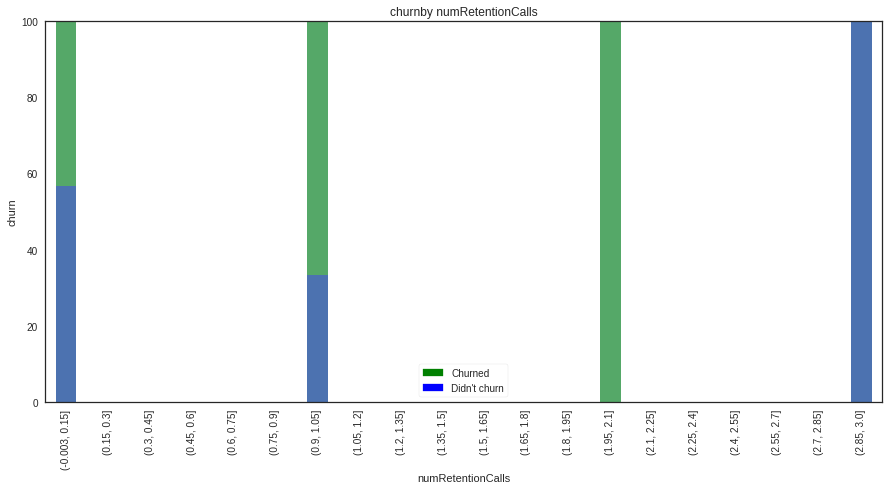

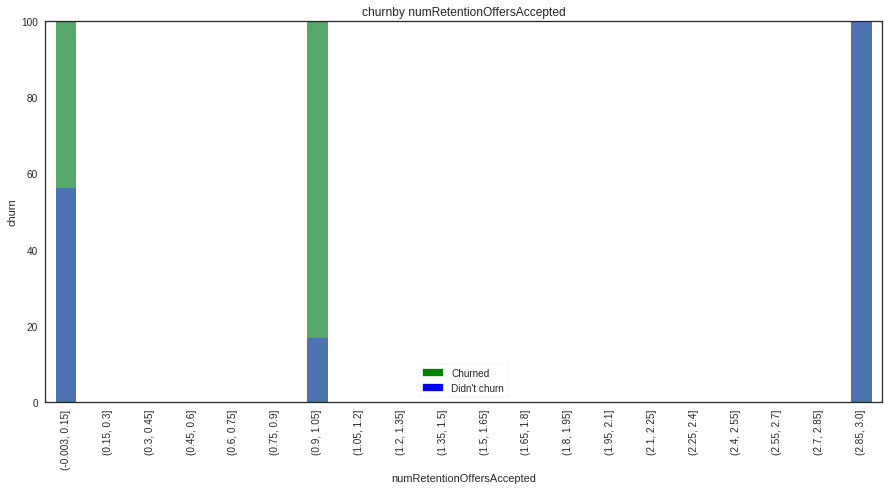

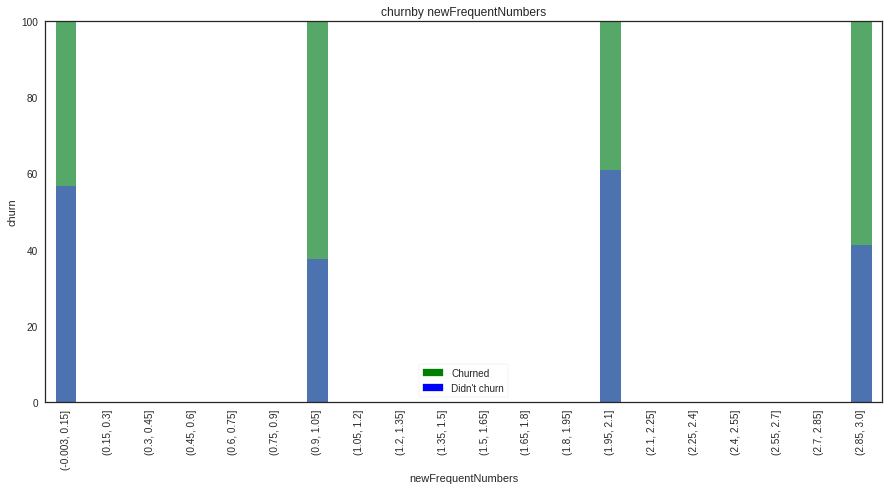

In [369]:
df_bins = df_train.copy()
for col in continuous_columns:
    try:
        df_bins[col] = pd.cut(df_train[col], bins=20).astype('category')
        barplots(col, 'churn', df_bins.copy())
    except:
        print(col)
    


It is hard for me to really see anything of substance in the above plots. Though they seem to indicate different average levels of churn outcomes for different levels of the continuous features, on closer inspection, alot of this is true only of the outliers.

For instance, handset prices in the range 69-79 seem very likely to churn

In [627]:
df['currentHandsetPrice'].describe()

count    725.000000
mean      35.540566
std       57.327860
min        0.000000
25%        0.000000
50%        0.000000
75%       39.990000
max      399.990000
Name: currentHandsetPrice, dtype: float64

But as we can see above, the vast majority of handset prices are much lower than that. As such, these charts are inherently misleading. They fail to describe what is happening with the majority of samples.

## Choosing a subset of features:

I feel that there is little immediately visible here that will help us predict churn. 

Based on the results above, I am going to choose a very small subset of features. I will choose handsetAge, billAmountChangePct and currentHandsetPrice, based on the slightly different distributions they display for churn/non churn in boxplots. I will choose income and creditRating based upon the different churn rates show in the stacked bar charts. I will won't choose lifeTime as of yet, but I might try to represent it as a polynomial in question 4.


In [31]:
cat_features = ['creditRating', 'income']
cont_features = ['handsetAge', 'currentHandsetPrice', 'billAmountChangePct']

# Q2. Performing Linear Regression

I have chosen a small group of features (handsetAge, currentHandsetPrice, billAmountChangePct, creditRating, income) to begin modelling with. Before I begin modelling, however, I should convert any boolean datatypes to int64, and create dummy 0/1 columns for my categorical data types.

### Setting boolean datatypes to int64

In [23]:
df['children']=df['children'].astype(np.int64)
df['homeOwner']=df['homeOwner'].astype(np.int64)
df['creditCard']=df['creditCard'].astype(np.int64)
df['smartPhone']=df['smartPhone'].astype(np.int64)

### Converting categorical columns into dummies

In [24]:
dummy_columns = ['income', 'regionType', 'marriageStatus', 'creditRating']

In [25]:
def makeFeatureIntoDummies(df, featureList, prefixes):
   
   #returns a dictionary object with the new dataframe, a string that can run on the stats linear regression model and an array containing the names of the new dummy features'''
    #returns a df with categorical features
    features_to_concat = [df]
    dummyarrs=[]
    dummystrings=[]
    pfx = 0
    for feature in featureList:
        
        dummystrings.append(makeDummyString(feature, df, prefixes[pfx]))
        dummyarrs.append(makeDummiesArray(feature, df, prefixes[pfx]))
        features_to_concat.append(pd.get_dummies(df[feature], prefix=prefixes[pfx]))
        pfx+=1
        
    
    print(features_to_concat)  
    df_new_dummies = pd.concat(features_to_concat, axis=1)
    for feature in featureList:
        #drop the original feature from the dataFrame
        df_new_dummies=df_new_dummies.drop([feature], axis=1)
    return {'df':df_new_dummies, 'string':concatDummyStrings(dummystrings), 'arr':concatDummyArrs(dummyarrs)}

def makeDummyString(column, df, prefix):
    #i ended up not using the results of this method
    '''creates a string that can be used with the stats linear regression model'''
    string=''
    for value in df[column].unique():
        
        string += prefix+'_'+str(value) + ' + '
        
    return string

def concatDummyStrings(strings):
    #or this method either
    '''concantanates strings into one single string that can be used with the stats linear regression model'''
    new_string=''
    for string in strings:
        new_string+=string
    
    return new_string[0:-2]
    
def makeDummiesArray(column, df, prefix):
    '''returns an array with the names of the new dummy columns'''
    arr=[]
    for value in df[column].unique():
        arr.append(prefix+'_'+str(value))
    return arr

def concatDummyArrs(arrs):
    '''puts all of the new dummy arrays into a single array'''
    new_arr=[]
    for arr in arrs:
        new_arr+=arr
        
    return new_arr
    

In [26]:
result = makeFeatureIntoDummies(df, dummy_columns, ['I', 'RT', 'MS', 'CR'] )

[     age regionType marriageStatus  children income  numHandsets  handsetAge  \
0     52    unknown            yes         1      9            4         291   
1     42   suburban            yes         0      4            2         745   
2     46    unknown            yes         1      6            1         330   
3     42   suburban            yes         1      5            2         348   
4     46    unknown            yes         1      7            3         434   
5     50      rural            yes         1      3            1         203   
6     34    unknown            yes         0      6            6         100   
7     50   suburban        unknown         1      9            2         301   
8     40    unknown            yes         0      1            1         353   
9     46    unknown            yes         1      6            1         605   
10    54    unknown             no         0      3            1         677   
11    28   suburban            yes     

In [27]:
df_new = result['df']
# I decided to replace most of the methods described above with the methods below for retrieving dummy columns

I create a dictionary here, mapping each original categorical feature to it's dummy columns. This will be important later, when I want to add/drop categorical features from my model

In [28]:
dummy_dict = {'income': ['I_9','I_4','I_6','I_5','I_7','I_3','I_1','I_8',\
                         'I_2','I_0'], 'regionType':['RT_unknown','RT_suburban','RT_rural',\
                                                     'RT_town',], 'creditRating':['CR_B','CR_E','CR_A',\
'CR_C','CR_F','CR_D','CR_G'], 'marriageStatus':['MS_yes','MS_unknown','MS_no']}

And a brief function for retrieving them:

In [29]:
def getCategoricalFeatures(features, dummy_dict):
    dummies=[]
    for feature in features:
        
        if feature in dummy_dict:
            
            dummies+=dummy_dict[feature]
            
    return dummies
    

In [32]:
cat_features = getCategoricalFeatures(cat_features,dummy_dict)

In [33]:
features=cont_features+cat_features


And a function for making the stats models logistic regression formula string

In [34]:
def makeLogRegString(features):
    string= 'churn ~ '
    for feature in features:
        string += feature+' + '
        
    return string[:-3]
    

In [35]:
logRegString = makeLogRegString(features)

### Splitting dataset once again into train/test data

As I've changed the whole dataset, I will have to perform the train/test split again.

In [36]:
msk = np.random.rand(len(df)) < 0.7
df_train = df_new[msk]
df_test = df_new[~msk]

In [37]:
df_train_y = df_train.churn
df_test_y = df_test.churn
df_whole = df_new
df_whole_y = df_new.churn

# Q2.1 Defining a base model

The base model will always predict the majority class. Our eventual model should do better than this!

In [38]:
threshold = df_train[df_train.churn == True].shape[0] / df_train.shape[0]
print('Print percentage churn:', threshold)
majorityClass = 1 if threshold > 0.5 else 0

Print percentage churn: 0.46382978723404256


The majority class here is 0, or churn is false for the majority of samples

In [39]:
def baseModel(df, majorityClass):
    import random
    NumberPredictions = df.shape[0]
    return [majorityClass for i in range (NumberPredictions)]

In [40]:
from sklearn import metrics

Define a function to print classification metrics. The code inside is copied from the lab notes.

In [41]:
def printMetrics(predictions, actual):
    print("Accuracy: ", metrics.accuracy_score(actual, predictions))
    print('\n')
    print("Confusion matrix: \n", metrics.confusion_matrix(actual, predictions))
    print('\n\n')
    print("Classification report:\n\n ", metrics.classification_report(actual, predictions))
    

### Note - As per the question, I will only be printing and discussing the classification evaluation measures (e.g., Accuracy, Confusion matrix, Precision, Recall, F1) for models in this assignment. Although we're using linear regression, we are thresholding its predictions and treating it as a classification model. As such, I won't be discussing R2 or mean squared error etc.

In [42]:
predictedClasses = baseModel(df_test,majorityClass)
printMetrics(predictedClasses, df_test.churn)



Accuracy:  0.549019607843


Confusion matrix: 
 [[140   0]
 [115   0]]



Classification report:

               precision    recall  f1-score   support

          0       0.55      1.00      0.71       140
          1       0.00      0.00      0.00       115

avg / total       0.30      0.55      0.39       255



/home/diarmuid/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Testing the base model on the test data, we have 0.5158 accuracy. There are no true or false positives, so the precision, recall and f1-scores are somewhat irrelevant, and create an error like response from the metrics function.

Any subsequent model should produce a better than 0.5490 accuracy score, if we are to judge it to be doing anything

# Q2.2 Training a full model

In [43]:
import statsmodels.formula.api as sm

In [44]:
lm = sm.ols(formula=logRegString, data=df_train).fit()

### Printing the model summary and coefficients

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.132
Date:                Sun, 08 Apr 2018   Prob (F-statistic):              0.318
Time:                        14:49:45   Log-Likelihood:                -329.51
No. Observations:                 470   AIC:                             697.0
Df Residuals:                     451   BIC:                             775.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2927    

### Interpreting the model

In [48]:
#produce a string describing the model
string=str(lm.params[0])
for i in range(1, len(lm.params)):
    string+=' + '+str(lm.params[i]) + ' * ' + features[i-1]

The model is:

$prob(Churn=1|handsetAge, currentHandsetPrice, billAmountChangePct, CreditRating, Income) = 0.292654355364 + 0.000216864584256 * handsetAge + 0.000305504355561 * currentHandsetPrice + 0.00898493222462 * billAmountChangePct + 0.00184935710151 * CR_B + 0.0136164671126 * CR_E + 0.0403226977708 * CR_A + 0.170296054041 * CR_C + -0.0505824029261 * CR_F + -0.0199649724274 * CR_D + 0.137117154692 * CR_G + 0.121293152473 * I_9 + 0.0651935948802 * I_4 + 0.0399555380582 * I_6 + 0.00187823674256 * I_5 + -0.00571155837345 * I_7 + 0.0722448086747 * I_3 + -0.0688436257132 * I_1 + -0.0114806218982 * I_8 + -0.113404541224 * I_2 + 0.191529371745 * I_0$

As we can see, our model has ascribed the highest coefficient to the intercept. It has decided that my continuous features are relatively unimportant to the model. Their coefficients are all tiny. Different values of categorical features are ascribed varying importances. For instance, an A credit rating has a a 0.172 coefficient, and thus a significant effect on the outcome, whilst an F rating has a small negative effect on the outcome. Being in income bracket 8 has a -0.11 coefficient and, data points in this bracket are more likely to return a non churn outcome. Being in income bracket 0 has a positive effect, and data points in this bracket are more likely to return a churn outcome.

### The predictions for the first 100 training examples

In [51]:
predictions = lm.predict(df_train.head(100))
print(str([i for i in predictions]))

[0.51938428334825082, 0.52437304487972125, 0.4030559417213655, 0.39402711875652874, 0.42881809899181295, 0.43680634433130472, 0.69496323588994879, 0.4721874204128319, 0.46481774036955331, 0.5324665481093328, 0.590386085353517, 0.41077941130399803, 0.35171950278467379, 0.41813597885539933, 0.45601974822713898, 0.49974897692199538, 0.44161300385694136, 0.52884734704134728, 0.37526588914588432, 0.51908857805683728, 0.37220417542372142, 0.31414473144306948, 0.60468394227504429, 0.35001307901021772, 0.6224853621637445, 0.46739534407789951, 0.56171913203793011, 0.29642261143154591, 0.52733902234987473, 0.69831801141450867, 0.38218887885512287, 0.63795746212030147, 0.5408115483699536, 0.43374386573071577, 0.42762141765480027, 0.52659885606456713, 0.66331930159068353, 0.63583545999754543, 0.55220280678917233, 0.41240450178515192, 0.43475653012385773, 0.42811240516644122, 0.35135701722940332, 0.4067026603590656, 0.77714553228331751, 0.28275940252845455, 0.35442753726320048, 0.54097122179192147,

### Predicted class for first 100 train examples (0 is false, 1 is churn)

In [52]:
predictedClasses = [1 if x>0.5 else 0 for x in predictions]
print(predictedClasses)

[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]


## Comparing actual and predicted values

In [53]:
#Using actual predicted values

print("Actual - Predicted:\n", (df_train.head(100).churn - lm.predict(df_train.head(100))))
print("\n(Actual - Predicted) squared:\n", (df_train.head(100).churn - lm.predict(df_train.head(100)))**2)

Actual - Predicted:
 0     -0.519384
1     -0.524373
2      0.596944
3     -0.394027
4      0.571182
6     -0.436806
7     -0.694963
8     -0.472187
9     -0.464818
10     0.467533
12    -0.590386
13     0.589221
14    -0.351720
15    -0.418136
17     0.543980
18     0.500251
19    -0.441613
20     0.471153
21    -0.375266
23    -0.519089
24    -0.372204
25    -0.314145
27    -0.604684
28     0.649987
30    -0.622485
32     0.532605
33     0.438281
34    -0.296423
37    -0.527339
38    -0.698318
         ...   
104    0.592937
106    0.613262
109    0.557259
110    0.346882
112   -0.427037
113    0.478952
114    0.355863
115   -0.409920
119    0.480935
120   -0.418514
121   -0.391131
125    0.462974
126    0.518768
127   -0.436774
128    0.589983
130    0.554787
131    0.517975
133    0.414002
134   -0.389278
135    0.343110
137    0.637716
138   -0.363063
140   -0.389283
141   -0.468338
142    0.650361
144   -0.635004
145   -0.470033
146    0.481367
147   -0.270936
148   -0.442207
Len

In [394]:
#Using predicted classes instead

print("Actual - Predicted:\n", (df_train.head(100).churn - predictedClasses))
print("\n(Actual - Predicted) squared:\n", (df_train.head(100).churn - predictedClasses)**2)

Actual - Predicted:
 0     -1
2      1
3      0
6      0
7     -1
10     0
11     0
12    -1
13     1
15     0
18     0
19     0
20     0
22     0
24     0
25     0
29    -1
30    -1
31     0
32     1
35    -1
36     0
37    -1
38    -1
39     1
40    -1
41     1
42    -1
44     1
45     0
      ..
100    1
101    0
102    0
103    0
104    1
105   -1
109    1
110    0
111    0
112    0
113    1
114    0
116    0
118    0
120    0
122    1
123    1
124    0
125    1
126    0
127   -1
128    1
129    1
130    1
131    0
132    0
133    1
134    0
135    1
136   -1
Name: churn, Length: 100, dtype: int64

(Actual - Predicted) squared:
 0      1
2      1
3      0
6      0
7      1
10     0
11     0
12     1
13     1
15     0
18     0
19     0
20     0
22     0
24     0
25     0
29     1
30     1
31     0
32     1
35     1
36     0
37     1
38     1
39     1
40     1
41     1
42     1
44     1
45     0
      ..
100    1
101    0
102    0
103    0
104    1
105    1
109    1
110    0
111    0

We can immediately see that our model is wrong a substantial portion of the time

### Printing model accuracy, a confusion matrix, and a classification report that contains the precision, recall and f1-score

In [54]:
printMetrics(df_train.head(100).churn, predictedClasses)

Accuracy:  0.57


Confusion matrix: 
 [[39 26]
 [17 18]]



Classification report:

               precision    recall  f1-score   support

          0       0.70      0.60      0.64        65
          1       0.41      0.51      0.46        35

avg / total       0.60      0.57      0.58       100



57% accuracy seems a better than the base model. This means that the model was right about 0.57 of the the predictions it made. But we have to remember that the model has already been trained on these samples, and is now seeing them for a second time. Ideally, it should be much higher for samples that it has already seen.

Also the precision scores show that the model tends to be right for the majority class (0), and wrong for the minority class (1). Of the samples it decided were 0, 70 percent of them were actually 0. But for the samples it decided were 1, only 40 percent of them were.

Similarly the recall scores show that it was only able to identify 0.60 of the samples which were actually class 0, and only 0.51 of the samples that were class 1.

From the confusion matrix we can see that it produces many true negatives, but few true positives. There are more false positives than true positives.

# Q2.3 Evaluating the model on hold out test data

In [55]:
predictions = lm.predict(df_test)
print(str([i for i in predictions]))

[0.41367596183947158, 0.42617265827254303, 0.50921698211870126, 0.32158953524285283, 0.53610459659350496, 0.59017558821153582, 0.55475446263034534, 0.55708656295517134, 0.44604590957261681, 0.42213848309676727, 0.43548998482219481, 0.54119370979955783, 0.40212639177111342, 0.5810740734446308, 0.43805141052157137, 0.49047289550782119, 0.43088095086155331, 0.51930784437176802, 0.58969382835500062, 0.4772071180199563, 0.51078896564418896, 0.4985417946759868, 0.4833464269028192, 0.42588097130036817, 0.42485455767665314, 0.54142562043216658, 0.36645492628013832, 0.47087322110255708, 0.61399899698496552, 0.35355766202891803, 0.37838649018975001, 0.41363046108799428, 0.28481529765690461, 0.39113970158121592, 0.63360866193392407, 0.60281591395333822, 0.52942051176981175, 0.35198827625876639, 0.31721405897087973, 0.3228999048333322, 0.51966926250792422, 0.45749984603363947, 0.40377471400500042, 0.42643668552738362, 0.39839504939162634, 0.62362805059273996, 0.60761087507474432, 0.536130090766388

In [57]:
predictedClasses = [1 if x>0.5 else 0 for x in predictions]
print(predictedClasses)

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]


In [58]:
printMetrics(predictedClasses,df_test.churn)

Accuracy:  0.537254901961


Confusion matrix: 
 [[91 49]
 [69 46]]



Classification report:

               precision    recall  f1-score   support

          0       0.57      0.65      0.61       140
          1       0.48      0.40      0.44       115

avg / total       0.53      0.54      0.53       255



The model's accuracy has dropped to 53%, now that it is evaluating samples that it hasn't seen before.

The values for negative precision have dropped, while positive precision has rise. The precision scores show that the model still tends to be right for the majority class (0), and wrong for the minority class (1). Of the samples it decided were 0.57 percent of them were actually 0. But for the samples it decided were 1, 48 percent of them were.

The recall scores for the negative class have risen, and dropped for the positive class. The recall scores show that it was only able to identify 0.65 of the samples which were actually class 0, and only 0.40 of the samples that were class 1.

From the confusion matrix we can see that it still produces many true negatives, but few true positives. The number of true and false positives is quite close.

# Q2.4 Using cross validation to evaluate the model

I can't use SKlearn's cross_val_scores function to do this, as we are dealing with a classification problem.

The below code will create 100 different train test/splits, evaluates the model on the train data, tests it on the test data, and saves the accuracy.At the end of the code, we will print the results and calculate the average accuracy.



I opted for 100 fold cross validation

In [59]:
accuracies = []

for i in range(100):
    
    pos1 = int(df_whole.shape[0]/100)*i
    pos2 = pos1 + int(df_whole.shape[0]/100)
    test=df_whole[pos1:pos2]
    train=pd.concat([df_whole[0:pos1],df_whole[pos2:]])
    lm = sm.ols(formula=logRegString, data=train).fit()
    predictions = lm.predict(test)
    predictedClasses = [1 if x>0.5 else 0 for x in predictions]
    accuracy=metrics.accuracy_score(test.churn, predictedClasses)
    
    accuracies.append(accuracy)
print(accuracies)  
print('\n\nMean accuracy:', sum(accuracies)/len(accuracies))
    
    

[0.42857142857142855, 0.42857142857142855, 0.7142857142857143, 0.7142857142857143, 0.2857142857142857, 0.14285714285714285, 0.7142857142857143, 0.5714285714285714, 0.7142857142857143, 0.8571428571428571, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.2857142857142857, 0.42857142857142855, 0.42857142857142855, 0.7142857142857143, 0.42857142857142855, 0.14285714285714285, 0.42857142857142855, 0.5714285714285714, 0.42857142857142855, 0.14285714285714285, 1.0, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.7142857142857143, 0.5714285714285714, 0.42857142857142855, 0.5714285714285714, 0.42857142857142855, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.2857142857142857, 0.7142857142857143, 0.7142857142857143, 0.14285714285714285, 0.7142857142857143, 0.5714285714285714, 0.2857142857142857, 0.14285714285714285, 0.5714285714285714, 1.0, 0.8571428571428571, 0.5714285714285714, 0.42857142857142855, 0.8571428571428571, 0.2857142857

What is especially interesting, is that on some folds of the data we scored as high as 0.85, whilst on others we managed a measly 0.42. It suggests that this model describes relatively little about the actual likelihood of churn in the dataset, but is able to luck out on certain train/test splits of the data.

I haven't cross validated my base model, but we could expect it to be right in 0.54 cases as well (as this is approximately the rate of non-churn in the whole dataset). So overall, a linear regression trained on this feature set is no better than predicting churn=0 for every given sample.



# Q3. Performing logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression

# Q3.1 Training a full model

### Training the model on selected features

In [61]:
logreg = LogisticRegression(fit_intercept=True).fit(df_train[features], df_train_y)

### Printing the model coefficients

In [62]:
print('Features :\n', features)
print("\n\nCoeficients: \n", logreg.coef_)
print("\n\nIntercept: \n", logreg.intercept_)

Features :
 ['handsetAge', 'currentHandsetPrice', 'billAmountChangePct', 'CR_B', 'CR_E', 'CR_A', 'CR_C', 'CR_F', 'CR_D', 'CR_G', 'I_9', 'I_4', 'I_6', 'I_5', 'I_7', 'I_3', 'I_1', 'I_8', 'I_2', 'I_0']


Coeficients: 
 [[ 0.00087376  0.0011616   0.03303953 -0.23532617 -0.16440143 -0.07959131
   0.42596522 -0.28104456 -0.31633153  0.20929438  0.32646608  0.10616224
   0.01247374 -0.12673682 -0.17061714  0.12348293 -0.374956   -0.18112566
  -0.50054847  0.34396371]]


Intercept: 
 [-0.4414354]


### Interpreting the model

In [63]:
string = str(logreg.intercept_[0]) + ' + '
for i in range(0, len(features)):
    string += str(logreg.coef_[0][i]) + ' * ' +features[i] +' + '
print(string)   

-0.441435395061 + 0.000873764171883 * handsetAge + 0.00116159816535 * currentHandsetPrice + 0.0330395324612 * billAmountChangePct + -0.235326167663 * CR_B + -0.164401432302 * CR_E + -0.0795913093841 * CR_A + 0.425965222747 * CR_C + -0.281044561349 * CR_F + -0.316331525924 * CR_D + 0.209294378814 * CR_G + 0.326466077387 * I_9 + 0.106162235982 * I_4 + 0.0124737361644 * I_6 + -0.126736815184 * I_5 + -0.170617139915 * I_7 + 0.123482930645 * I_3 + -0.374955998059 * I_1 + -0.181125659952 * I_8 + -0.500548470601 * I_2 + 0.343963708471 * I_0 + 


The logistic regression model is:

$prob(Churn=1| handsetAge, currentHandsetPrice, billAmountChangePct, CreditRating, Income)=\frac{1}{1 +e ^ -({-0.441435395061 + 0.000873764171883 * handsetAge + 0.00116159816535 * currentHandsetPrice + 0.0330395324612 * billAmountChangePct + -0.235326167663 * CR_B + -0.164401432302 * CR_E + -0.0795913093841 * CR_A + 0.425965222747 * CR_C + -0.281044561349 * CR_F + -0.316331525924 * CR_D + 0.209294378814 * CR_G + 0.326466077387 * I_9 + 0.106162235982 * I_4 + 0.0124737361644 * I_6 + -0.126736815184 * I_5 + -0.170617139915 * I_7 + 0.123482930645 * I_3 + -0.374955998059 * I_1 + -0.181125659952 * I_8 + -0.500548470601 * I_2 + 0.343963708471 * I_0})}$

Like with linear regression, the intercept has a large coefficient, though it is no longer the largest. My continuous features are ascribed larger coefficients than those that they received in the linear model. BillAmountChangePct, for instance, is 0.03. However, the categorical features still receive much larger coefficients. They are similar to those in the linear model. Being in the 0 income bracket gives a high 0.3 positive coefficient, while being in the second income bracket receives a high negative 0.5 coefficient. Being in income bracket 6 is deemed unimportant to the model, and it only receives a 0.012 coefficient. The same is true of the E credit rating, which has a -0.07 coefficient.

### Using the model to return prediction probabilities for the first 100 training samples

In [64]:
print(logreg.predict_proba(df_train.head(100)[features]))

[[ 0.48555712  0.51444288]
 [ 0.47678109  0.52321891]
 [ 0.59552704  0.40447296]
 [ 0.59606157  0.40393843]
 [ 0.57051452  0.42948548]
 [ 0.56471403  0.43528597]
 [ 0.32151182  0.67848818]
 [ 0.5190834   0.4809166 ]
 [ 0.53463599  0.46536401]
 [ 0.47308562  0.52691438]
 [ 0.41342002  0.58657998]
 [ 0.5882613   0.4117387 ]
 [ 0.61086004  0.38913996]
 [ 0.58109956  0.41890044]
 [ 0.54240014  0.45759986]
 [ 0.50098494  0.49901506]
 [ 0.56513579  0.43486421]
 [ 0.46758311  0.53241689]
 [ 0.62173934  0.37826066]
 [ 0.48613352  0.51386648]
 [ 0.62205544  0.37794456]
 [ 0.67529918  0.32470082]
 [ 0.39663765  0.60336235]
 [ 0.64661485  0.35338515]
 [ 0.38804106  0.61195894]
 [ 0.52892304  0.47107696]
 [ 0.43005563  0.56994437]
 [ 0.67098554  0.32901446]
 [ 0.47519053  0.52480947]
 [ 0.31510512  0.68489488]
 [ 0.57783017  0.42216983]
 [ 0.371649    0.628351  ]
 [ 0.45915303  0.54084697]
 [ 0.56556791  0.43443209]
 [ 0.57371391  0.42628609]
 [ 0.47615462  0.52384538]
 [ 0.34685409  0.65314591]
 

### Using the model to return predictions for the first 100 training samples

In [65]:
predictions = logreg.predict(df_train.head(100)[features])
print(predictions)


[1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1
 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0]


### Printing the model metrics, evaluating on the first 100 training samples

In [66]:
printMetrics(df_train.head(100).churn, predictions)

Accuracy:  0.57


Confusion matrix: 
 [[39 26]
 [17 18]]



Classification report:

               precision    recall  f1-score   support

          0       0.70      0.60      0.64        65
          1       0.41      0.51      0.46        35

avg / total       0.60      0.57      0.58       100



The accuracy is about the same as for linear regression on the training data, and it isn't much better than the base model.

Again, the precision scores show that the model tends to be right for the majority class (0), and wrong for the minority class (1). Of the samples it decided were 0, 70 percent of them were actually 0. But for the samples it decided were 1, 41 percent of them were.

Similarly the recall scores show that it was only able to identify 0.60 of the samples which were actually class 0, and only 0.51 of the samples that were class 1.

These are the exact same scores as for linear regression, which is interesting.

From the confusion matrix we can see that it produces many true negatives, but few true positives. There are more false positives than true positives, showing that while it might understand something about when churn is 0 (it is the majority class over all), it understands little about when it is 1.

# Q3.2 Evaluating model on hold out test data

In [67]:
predictions=logreg.predict(df_test[features])
print(predictions)

[0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1
 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1]


In [68]:
printMetrics(df_test.churn,predictions)

Accuracy:  0.549019607843


Confusion matrix: 
 [[95 70]
 [45 45]]



Classification report:

               precision    recall  f1-score   support

          0       0.68      0.58      0.62       165
          1       0.39      0.50      0.44        90

avg / total       0.58      0.55      0.56       255



Once again, the model's accuracy drops now that it is looking at samples that it hasn't seen before.

The values for negative precision have dropped, while positive precision has risen. The precision scores show that the model still tends to be right for the majority class (0), and wrong for the minority class (1). Of the samples it decided were 0, 68 percent of them were actually 0. But for the samples it decided were 1, only 39 percent of them were.

The recall scores for the negative class have dropped, and they have also dropped slightly for the positive class. The recall scores show that it was only able to identify 0.58 of the samples which were actually class 0, and only 0.50 of the samples that were class 1.

From the confusion matrix we can see that it still produces many true negatives, but few true positives. There are more false positives than true positives, showing that while it might understand something about when churn is 0 (it is the majority class over all), it understands little about when it is 1.

# Q3.3 Evaluating the model with cross validation

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [71]:
#performing cross validation
scores = cross_val_score(LogisticRegression(fit_intercept=True), df_whole[features], df_whole.churn, scoring='accuracy', cv=20)
print('Cross validated accuracy scores: \n')
print('\n',scores)
print('\n',scores.mean())

Cross validated accuracy scores: 


 [ 0.48648649  0.51351351  0.54054054  0.45945946  0.48648649  0.54054054
  0.51351351  0.45945946  0.62162162  0.72972973  0.45945946  0.56756757
  0.72222222  0.6         0.48571429  0.54285714  0.57142857  0.57142857
  0.6         0.6       ]

 0.553601458601


In [72]:
#performing cross validation
scores = cross_val_score(LogisticRegression(fit_intercept=True), df_whole[features], df_whole.churn, scoring='precision', cv=20)
print('Cross validated precision scores: \n')

print('\n', scores.mean())

Cross validated precision scores: 


 0.525436116171


In [73]:
scores = cross_val_score(LogisticRegression(fit_intercept=True), df_whole[features], df_whole.churn, scoring='f1', cv=20)
print('Cross validated f1 scores: \n')

print('\n',scores.mean())

Cross validated f1 scores: 


 0.425914261737


It performs slightly better (0.01 accuracy) on cross validation than it did on the hold out test data, and only ever so slightly better than the base model.

# Q4. Improving predictive models

So far my models have performed quite poorly. When cross validated, they have not done any better than the base model. Logistic regression did the best, with a cross validated accuracy of 0.55, while Linear Regression faired worse with 0.54. However, Linear Regression was cross validated on a much larger number of folds than Logistic regression (Sklearn's cross_val_score would return a bug if I upped the cv number too much), and the scores might hae been the same if Logistic Regression was cross validated on the same number of folds.

Both models were far more precise in identifying the majority class than the minority one. They also had better recall for the majority class. The confusion matrices showed that they were making far more predictions for 0 than for 1. There were more true negatives than false negatives - but this would be the case if the model had simply learned the majority class in the dataset. There were generally alot more false positives than true positives, which suggests that the models learned almost nothing about customers who do actually churn. My overall feeling was that these models were no better than just predicting churn=False for every sample in the test set.


In this section I am going to explore different techniques for improving predictive models. I will proceed in the following manner:

1. Clamp the outliers in my dataset.
2. Normalize my dataset.
3. Experiment with Sklearn's feature selection tools to select better groups of features
4. Employ an optimization algorithm to select better groups of features.
5. Test feature groups on new learning algorithms (Decision tree classifiers and Random Forest classifiers)
6. Combine models, and test these feature groups on the combined models.
7. Reconsider my results from question 1, and consider creating new features (polynomial features and interacting features)

From now on, I will consider only accuracy scores in evaluating the models, as I deem this to be what the client would be looking for in the real world. I will also cross validate all of the models, to get a better idea of their actual predictive power.



### Defining helper functions

To simplify things, I am going to put together two functions that will automate the modelling and evaluation of new feature sets

In [98]:
def performLinearRegression(df_train, df_test, df_whole, features):
    print('using these features -',features)
    featureString = 'churn ~ '
    for feature in features:
        featureString += feature + ' + '
    featureString = featureString[0:-3]

    lm = sm.ols(formula=featureString, data=df_train).fit()
   
    predictions = lm.predict(df_test[features])
    predictedClasses = [1 if x>0.5 else 0 for x in predictions]
    mse = ((df_test.churn - predictions)** 2).mean()
    print("\nMean Squared Error:\n", mse)
    print('\n')
    printMetrics(df_test.churn, predictedClasses)
    accuracies = []
    print('Cross validated scores: \n')
    for i in range(100):

        pos1 = int(df_whole.shape[0]/100)*i
        pos2 = pos1 + int(df_whole.shape[0]/100)
        test=df_whole[pos1:pos2]
        train=pd.concat([df_whole[0:pos1],df_whole[pos2:]])
        lm = sm.ols(formula=featureString, data=train).fit()
        predictions = lm.predict(test)
        predictedClasses = [1 if x>0.5 else 0 for x in predictions]
        accuracy=metrics.accuracy_score(test.churn, predictedClasses)

        accuracies.append(accuracy)
      
    print('\n\nMean accuracy:', sum(accuracies)/len(accuracies))
    
    
    
    
    
    
    

In [99]:
def performLogisticRegressionVerbose(df_train, df_test, df_whole, features):
    
    logreg = LogisticRegression(fit_intercept=True).fit(df_train[features], df_train.churn)
    predictions = logreg.predict(df_test[features])
    print(logreg.coef_, '\n')
    printMetrics(df_test.churn,predictions)
    print('\n Cross validation - accuracy')
    scores = cross_val_score(LogisticRegression(), df_whole[features], df_whole.churn, scoring='accuracy', cv=3)
    
    print(scores.mean())
    print('\n Cross validation - f1')
    scores = cross_val_score(LogisticRegression(), df_whole[features], df_whole.churn, scoring='f1', cv=3)
    print(scores)
    print(scores.mean())

# Q4.1. Clamping outliers

This was something that I avoided during homework 1. My reasoning was that the outliers might be useful to my model. As my models have so far proved useless, I will now try removing these outliers.

In [100]:
continuous_columns = ['age', 'numHandsets', 'handsetAge',
       'currentHandsetPrice', 'avgBill', 'avgMins',
       'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls',
       'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins',
       'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers']

In [101]:
def clampDataFrameByQuantile(df, lower_quantile_value, upper_quantile_value, features):
    
    for col in features:
        #avoid clamping age
        if col != 'age':
            minimum = df[col].quantile(lower_quantile_value)
            maximum = df[col].quantile(upper_quantile_value)

            df[col]=df[col].clip(minimum, maximum)
    return df
    
        
        
    

In [102]:
df_whole['handsetAge'].describe()

count     725.000000
mean      411.362759
std       265.639475
min         2.000000
25%       217.000000
50%       354.000000
75%       555.000000
max      1476.000000
Name: handsetAge, dtype: float64

On a side note, I was getting an awful bug here where the clamping function was modifying the underlying data frame

In [103]:
df_clamped_whole = df_whole.copy()
df_clamped_whole=clampDataFrameByQuantile(df_clamped_whole, 0.25, 0.75,continuous_columns)

In [104]:
df_clamped_whole['handsetAge'].describe()

count    725.000000
mean     376.877241
std      136.024423
min      217.000000
25%      217.000000
50%      354.000000
75%      555.000000
max      555.000000
Name: handsetAge, dtype: float64

Through clamping we have effectively destroyed the features numRetentionCalls, newFrequentNumbers, numRetentionOffersAccepted, so we should get rid of them

In [105]:
df_clamped_whole = df_clamped_whole.drop('numRetentionCalls', 1)
df_clamped_whole = df_clamped_whole.drop('newFrequentNumbers', 1)
df_clamped_whole = df_clamped_whole.drop('numRetentionOffersAccepted', 1)

In [106]:
#split data frame into train and test
msk = np.random.rand(len(df_clamped_whole)) < 0.7

df_clamped_train = df_clamped_whole[msk]

df_clamped_test = df_clamped_whole[~msk]



In [107]:
performLinearRegression(df_clamped_train,df_clamped_test,df_clamped_whole, features)


using these features - ['handsetAge', 'currentHandsetPrice', 'billAmountChangePct', 'CR_B', 'CR_E', 'CR_A', 'CR_C', 'CR_F', 'CR_D', 'CR_G', 'I_9', 'I_4', 'I_6', 'I_5', 'I_7', 'I_3', 'I_1', 'I_8', 'I_2', 'I_0']

Mean Squared Error:
 0.24541505427794397


Accuracy:  0.52466367713


Confusion matrix: 
 [[83 64]
 [42 34]]



Classification report:

               precision    recall  f1-score   support

          0       0.66      0.56      0.61       147
          1       0.35      0.45      0.39        76

avg / total       0.56      0.52      0.54       223

Cross validated scores: 



Mean accuracy: 0.537142857143


This has made our mean accuracy on linear regression worse

In [108]:
performLogisticRegressionVerbose(df_clamped_train, df_clamped_test, df_clamped_whole, features)

[[  1.86474171e-03   4.99213006e-04  -7.99262709e-01  -2.55403914e-01
   -1.80177914e-01  -2.56291153e-02   2.76549851e-01  -8.24974040e-01
   -1.66900782e-01   4.90168388e-01   1.78690143e-01   1.37655635e-01
   -2.67886378e-01  -2.66242794e-01  -2.18724512e-01   2.38477327e-01
   -2.47834148e-01  -2.62934185e-01  -8.33615013e-02   1.05792886e-01]] 

Accuracy:  0.533632286996


Confusion matrix: 
 [[85 64]
 [40 34]]



Classification report:

               precision    recall  f1-score   support

          0       0.68      0.57      0.62       149
          1       0.35      0.46      0.40        74

avg / total       0.57      0.53      0.55       223


 Cross validation - accuracy
0.521398443126

 Cross validation - f1
[ 0.4         0.41111111  0.43434343]
0.415151515152


It hasn't improved our logistic regression model either



### Review

The immediate effect of clamping seems to have been to reduce the accuracy of both learning algorithms



# Q4.2 Normalizing features

I will try normalizing features, to see if the learning algorithms can interpret them better when they are all within the same range

In [109]:
continuous_columns = [col for col in continuous_columns if col not in ['numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers']]

In [111]:
featureColumns = [column for column in df_clamped_whole.columns if column not in continuous_columns]
print(featureColumns)

['children', 'smartPhone', 'homeOwner', 'creditCard', 'churn', 'I_0', 'I_1', 'I_2', 'I_3', 'I_4', 'I_5', 'I_6', 'I_7', 'I_8', 'I_9', 'RT_rural', 'RT_suburban', 'RT_town', 'RT_unknown', 'MS_no', 'MS_unknown', 'MS_yes', 'CR_A', 'CR_B', 'CR_C', 'CR_D', 'CR_E', 'CR_F', 'CR_G']


In [112]:
#Normalization code copied from lab notebook

# We will first rescale the descriptive features to ranges [-1,1]
#Range normalise all columns to range [-1,1]
df_norm = (df_clamped_whole[continuous_columns] - df_clamped_whole[continuous_columns].min()) / (df_clamped_whole[continuous_columns].max() - df_clamped_whole[continuous_columns].min())
df_norm = df_norm * 2 - 1
#print(df_norm)

# Create a new dataframe df_classif_norm that has all descriptive features rescaled to [-1,1] 
# and the target feature as in original taking values 0 or 1.

df_norm.head()

age  numHandsets  handsetAge  currentHandsetPrice   avgBill  avgMins  \
0 -0.085714          1.0   -0.562130             1.000000  0.197115      1.0   
1 -0.371429          1.0    1.000000             0.499875 -0.889423     -1.0   
2 -0.257143         -1.0   -0.331361            -1.000000  1.000000      1.0   
3 -0.371429          1.0   -0.224852             0.499875 -1.000000     -1.0   
4 -0.257143          1.0    0.284024             0.499875  1.000000      1.0   

   avgrecurringCharge  avgOverBundleMins  avgRoamCalls  callMinutesChangePct  \
0                 1.0          -1.000000          -1.0              0.126143   
1                -1.0           0.969697          -1.0             -0.616088   
2                 1.0           1.000000          -1.0             -1.000000   
3                -1.0          -0.575758           1.0              0.228519   
4                 1.0           1.000000          -1.0             -1.000000   

   billAmountChangePct  avgReceivedMins  avgOutCalls  avgInCalls  \
0                  1.0         1.000000     1.000000    1.000000   
1                 -1.0        -0.623399    -1.000000   -1.000000   
2                 -1.0        -1.000000    -1.000000   -1.000000   
3                  1.0        -1.000000    -1.000000   -0.817190   
4                 -1.0         0.509735     0.795385   -0.727149   

   peakOffPeakRatio  peakOffPeakRatioChangePct  avgDroppedCalls  lifeTime  \
0         -1.000000                   1.000000        -0.429796       1.0   
1          0.669100                  -0.582476        -0.500536       1.0   
2         -1.000000                  -0.739029        -1.000000      -1.0   
3          0.391505                  -0.399961        -0.644159      -1.0   
4          0.377897                  -1.000000         0.356913       1.0   

   lastMonthCustomerCareCalls  
0                       -1.00  
1                       -1.00  
2                       -1.00  
3                        0.34  
4                       -1.00

In [113]:
df_norm = pd.concat([df_norm, df_clamped_whole[featureColumns]], axis=1)

## Run models with just these new continuous features

In [114]:
#split data frame into train and test again
msk = np.random.rand(len(df)) < 0.7
df_norm_whole = df_norm
df_norm_train = df_norm[msk]

df_norm_test = df_norm[~msk]



In [115]:
performLinearRegression(df_norm_train, df_norm_test, df_norm_whole, continuous_columns)

using these features - ['age', 'numHandsets', 'handsetAge', 'currentHandsetPrice', 'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime', 'lastMonthCustomerCareCalls']

Mean Squared Error:
 0.25309011133778103


Accuracy:  0.578947368421


Confusion matrix: 
 [[79 56]
 [32 42]]



Classification report:

               precision    recall  f1-score   support

          0       0.71      0.59      0.64       135
          1       0.43      0.57      0.49        74

avg / total       0.61      0.58      0.59       209

Cross validated scores: 



Mean accuracy: 0.577142857143


0.57 mean accuracy! This is the best mean accuracy on cross validation that we have had so far

In [116]:
performLogisticRegressionVerbose(df_norm_train, df_norm_test, df_norm, continuous_columns)

[[-0.26977842 -0.03253419  0.55833429  0.16726696  0.18376958 -0.15804295
  -0.09897359  0.05098501  0.02864758 -0.16750188 -0.23700052  0.35213827
  -0.53587523 -0.14050566 -0.02641956  0.18234996  0.36133211 -0.20876897
  -0.1751395 ]] 

Accuracy:  0.583732057416


Confusion matrix: 
 [[79 55]
 [32 43]]



Classification report:

               precision    recall  f1-score   support

          0       0.71      0.59      0.64       134
          1       0.44      0.57      0.50        75

avg / total       0.61      0.58      0.59       209


 Cross validation - accuracy
0.553147468651

 Cross validation - f1
[ 0.45714286  0.43877551  0.47368421]
0.456534192624


It doesn't perform so well on a logistic regression model however

### Run models with a select group of features

In [117]:
features = ['handsetAge', 'billAmountChangePct', 'currentHandsetPrice']+ getCategoricalFeatures(['creditRating','income'],dummy_dict)

In [118]:
performLogisticRegressionVerbose(df_norm_train, df_norm_test, df_norm_whole, features)

[[ 0.38916679 -0.30510214  0.02101426  0.06936329 -0.02713973 -0.03647217
   0.37113331 -0.38047597 -0.52893499  0.28954792  0.21968731  0.29568602
   0.21960733  0.02219763 -0.05690151  0.27543854  0.07594331 -0.15029897
  -0.46917382 -0.67516418]] 

Accuracy:  0.564593301435


Confusion matrix: 
 [[76 56]
 [35 42]]



Classification report:

               precision    recall  f1-score   support

          0       0.68      0.58      0.63       132
          1       0.43      0.55      0.48        77

avg / total       0.59      0.56      0.57       209


 Cross validation - accuracy
0.539276202234

 Cross validation - f1
[ 0.46575342  0.44444444  0.44549763]
0.451898499811


In [119]:
performLinearRegression(df_norm_train, df_norm_test, df_norm_whole, features)

using these features - ['handsetAge', 'billAmountChangePct', 'currentHandsetPrice', 'CR_B', 'CR_E', 'CR_A', 'CR_C', 'CR_F', 'CR_D', 'CR_G', 'I_9', 'I_4', 'I_6', 'I_5', 'I_7', 'I_3', 'I_1', 'I_8', 'I_2', 'I_0']

Mean Squared Error:
 0.2582971555045855


Accuracy:  0.555023923445


Confusion matrix: 
 [[73 55]
 [38 43]]



Classification report:

               precision    recall  f1-score   support

          0       0.66      0.57      0.61       128
          1       0.44      0.53      0.48        81

avg / total       0.57      0.56      0.56       209

Cross validated scores: 



Mean accuracy: 0.537142857143


### Review

While clamping seemed to, in the immediate case, make my results worse, after normalizing my models performed slightly better. However, the results were still only ever so slightly better than the base model. 

# Q4.3 Automating the feature selection process with SKlearn

The code for the two below methods was copied from a tutorial on https://machinelearningmastery.com/feature-selection-machine-learning-python/. I adapted it only slightly - to fit the given data, and print out the names of features

## Using recursive feature elimination to select features

As I understand it, we start with all of the features, and recursively eliminate features, testing the feature selections on a model, until we're down to a given number

In [120]:

import sklearn
from sklearn.feature_selection import RFE

In [121]:
cols=[col for col in df_new.columns if col != 'churn']

In [122]:
X = df_new[cols].values
Y = df_new['churn'].values

In [123]:
model = LogisticRegression()
rfe = RFE(model, 10) #number of features to keep
fit = rfe.fit(X, Y)
t=fit.n_features_
t=fit.support_
print(fit.ranking_)
print("Num Features:", fit.n_features_)  
print("Selected Features:", fit.support_) 
print("Feature Ranking:", fit.ranking_ ) 

string='['
for i in range(0, len(t)):
    
    if t[i] == True:
        
        string+= '\''+cols[i] + '\', '
        
print(string[:-2]+']')



[32 14  6 37  1 38  7  4 29 40 28 31 36 11  8 41 35 33 18 26 34 21 30  1  2
 22 12 23  1 13  1  3 10 16  9  1  1  1  5 15 17 20 19 24 25  1  1 27  1 39]
Num Features: 10
Selected Features: [False False False False  True False False False False False False False
 False False False False False False False False False False False  True
 False False False False  True False  True False False False False  True
  True  True False False False False False False False  True  True False
  True False]
Feature Ranking: [32 14  6 37  1 38  7  4 29 40 28 31 36 11  8 41 35 33 18 26 34 21 30  1  2
 22 12 23  1 13  1  3 10 16  9  1  1  1  5 15 17 20 19 24 25  1  1 27  1 39]
['smartPhone', 'numRetentionCalls', 'I_2', 'I_4', 'I_9', 'RT_rural', 'RT_suburban', 'CR_C', 'CR_D', 'CR_F']


I am not one hundred percent sure if these are even the features that the algorithm has recommended. Also, it has selected only certain dummy components from my individual categorical features. Anyway, below I try evaluating models with them

## Training models on features selected by Recursive feature elimination

In [124]:
performLinearRegression(df_train, df_test, df_whole, ['smartPhone', 'numRetentionCalls', 'I_2', 'I_4', 'I_9', 'RT_rural', 'RT_suburban', 'CR_C', 'CR_D', 'CR_F']
)

using these features - ['smartPhone', 'numRetentionCalls', 'I_2', 'I_4', 'I_9', 'RT_rural', 'RT_suburban', 'CR_C', 'CR_D', 'CR_F']

Mean Squared Error:
 0.2509293442956124


Accuracy:  0.556862745098


Confusion matrix: 
 [[92 65]
 [48 50]]



Classification report:

               precision    recall  f1-score   support

          0       0.66      0.59      0.62       157
          1       0.43      0.51      0.47        98

avg / total       0.57      0.56      0.56       255

Cross validated scores: 



Mean accuracy: 0.57


In [125]:
performLogisticRegressionVerbose(df_train,df_test,df_whole, ['smartPhone', 'numRetentionCalls', 'I_2', 'I_4', 'I_9', 'RT_rural', 'RT_suburban', 'CR_C', 'CR_D', 'CR_F']
)

[[-0.18872405  1.16740567 -0.45770378  0.22152856  0.51181017  0.31850905
  -0.10406123  0.58705405 -0.21858403 -0.20127744]] 

Accuracy:  0.556862745098


Confusion matrix: 
 [[92 65]
 [48 50]]



Classification report:

               precision    recall  f1-score   support

          0       0.66      0.59      0.62       157
          1       0.43      0.51      0.47        98

avg / total       0.57      0.56      0.56       255


 Cross validation - accuracy
0.558639964336

 Cross validation - f1
[ 0.43        0.46632124  0.47179487]
0.456038705106


Cross validated accuracy is slightly better than the baseline model (0.57 for linear regression), but not significantly

## Using ExtraTreesClassifier to estimate importance of features

As per the article from which I copied this code, "bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features." I am not sure how. But I will give it a go, and then run a model on the five most important features.

In [126]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
t=model.feature_importances_
for i, value in enumerate(t):
    
    print('Importance of', cols[i], ':', value)

Importance of age : 0.0414426862371
Importance of children : 0.0238284456972
Importance of numHandsets : 0.0283926585379
Importance of handsetAge : 0.0350134392054
Importance of smartPhone : 0.0134050083886
Importance of currentHandsetPrice : 0.024590175401
Importance of homeOwner : 0.0106197963517
Importance of creditCard : 0.010793764624
Importance of avgBill : 0.0346488782377
Importance of avgMins : 0.0336652153142
Importance of avgrecurringCharge : 0.0386093129484
Importance of avgOverBundleMins : 0.0336796377779
Importance of avgRoamCalls : 0.0249892494554
Importance of callMinutesChangePct : 0.0377727533804
Importance of billAmountChangePct : 0.036856705909
Importance of avgReceivedMins : 0.0338750787691
Importance of avgOutCalls : 0.0356090108441
Importance of avgInCalls : 0.0303379001524
Importance of peakOffPeakRatio : 0.0427840173248
Importance of peakOffPeakRatioChangePct : 0.032890440377
Importance of avgDroppedCalls : 0.0334272562121
Importance of lifeTime : 0.031170078033

### Training and testing a model on the 7 most important features

In [127]:
most_important_features = ['age', 'handsetAge', 'avgBill', 'avgOverBundleMins', 'lifeTime']

In [128]:
performLogisticRegressionVerbose(df_train,df_test,df_whole, most_important_features)


[[ 0.00218665  0.00104137  0.00408418 -0.00091638 -0.00500713]] 

Accuracy:  0.549019607843


Confusion matrix: 
 [[105  80]
 [ 35  35]]



Classification report:

               precision    recall  f1-score   support

          0       0.75      0.57      0.65       185
          1       0.30      0.50      0.38        70

avg / total       0.63      0.55      0.57       255


 Cross validation - accuracy
0.550352639941

 Cross validation - f1
[ 0.41450777  0.34567901  0.38857143]
0.382919404313


In [129]:
performLinearRegression(df_train,df_test,df_whole, most_important_features)

using these features - ['age', 'handsetAge', 'avgBill', 'avgOverBundleMins', 'lifeTime']

Mean Squared Error:
 0.24287420434846443


Accuracy:  0.549019607843


Confusion matrix: 
 [[104  79]
 [ 36  36]]



Classification report:

               precision    recall  f1-score   support

          0       0.74      0.57      0.64       183
          1       0.31      0.50      0.39        72

avg / total       0.62      0.55      0.57       255

Cross validated scores: 



Mean accuracy: 0.54


The results are no better than the base model.

### Review of using SKlearn to select best features.

Overall I found this unhelpful. I feel as if I didn't understand the parameters to plug into the functions. I would like to learn more about automated feature selection at a later date. The results were no better than the base model. At this point I am becoming despondant. It is a strange feeling to explain. It's like part of me doubts whether any of the packaged algorithms are actually working properly on my personal computer. It's as if nobody has bothered to tell me that they rely on a GPU card that my computer doesn't have or something. I know this isn't true, but still.

# Q4.4 Using  a genetic algorithm to select the best group of features

I felt that it would be worth getting the computer to do the feature selection for me. In this section, I explore using a genetic algorithm to select optimal sets of features.

At first, I considered simply brute force searching for a good set of features. I wrote code for that, but I haven't included it here. I've included the code below for a very poor genetic algorithm that I actually wrote myself (after having looked at a ton of examples on the internet). It uses the mean accuracy score from cross validation, performed with sklearn LogisticRegression(), to try and grow a population representing the best features to run the model on. However, I don't really understand how certain parameters should be set, such as the chance of mutating a value, how the members of the new generations should be picked, how individuals should be crossed over etc.

I made the following decisions which I feel are important:

1. I've implemented 'two-point' cross over, where I randomly select start and end points within an array, and splice the middle of an individual with the two ends of another individual. I'm aware that there are more advanced ways of doing cross over. E.g I might have used the feature 'importance' results from previous tests to say that some features are more likely to get crossed over than others, but this was well beyond the scope of my programming ability.

2. I've set the chance of mutation fairly low (0.05), so for each iteration, each feature in an indiviual selection has a 0.05 chance of being flipped from true to false and vice versa. As with above, a more advanced algorithm might have specified whether certain features were more or less likely to be flipped on any iteration.

3. I've always included a full set of features in my starting population.

4. I've made it so that features have a low chance of being selected in my starting population e.g except for the above, the starting selections only include a few features.

5. I am not including fragments of categorical features. The whole categorical feature will be included, rather than just elements from the individual dummy columns that make up that feature.

6. I've kept the population small (100 sets of features), to ensure that the algorithm can run to completion on my computer.

7. I always add the best set of features so far, unmutated, into each subsequent population. This might actually increase the chance of getting stuck in local maxima. 

8. I add a small number of brand new individuals into the population each time, to ensure diversity, and to try and avoid getting stuck in local maxima.

9. I used mean accuracy on cross validation as my scoring metric. I set the number of folds to five. I am aware that a more advanced algorithm might have used a combination of different metrics.

I feel that there's a lot of potential to play around with the decisions above. I felt that I didn't really know enough about either genetics, or optimization algorithms, to do this effectively. But it was much better than the brute force search algorithm that I tried first. Much better!

### Code for evaluating feature sets with logistic regression and cross validation

In [161]:
def performLogisticRegression(df, features, folds=3):
    '''Given a data frame and a set of features, performs cross validation using a logistic regression model
    Returns the mean accuracy for the model with the listed set of features'''
    #cross validate and return the mean score
    scores = cross_val_score(LogisticRegression(fit_intercept=True), df[features], df.churn, scoring='accuracy', cv=folds)
    return scores.mean()

### This is the code for generating individual feature selections, and an inital population of such selections

In [ ]:
import random
import statistics

def createIndividual(features, threshold):
    
    '''Generate a new individual set of features to add to the population'''
    #the threshold basically amounts to the percentage of features that won't be included
    
    # an individual is a numpy array with true/false values representing whether a feature is used or not
    
    array = np.zeros([len(features)],dtype=np.bool)
    for i in range(0, len(array)):
        
            #randomly set features to true, if the threshold is exceeded
            
            chance = random.random()
            if chance > threshold:
                array[i] = not array[i]
               
    return array

def createPopulation(populationSize, features, threshold):
    '''create a population of randomly generated individuals'''
    #create a population of such individuals
    population = []
    for i in range(populationSize):
        
        population.append(createIndividual(features, threshold))
        
    #add a row with all features turned on. This should help to increase diversity in the population.
    
    population.append(np.ones([len(features)],dtype=np.bool))
    
    return population

This is the code for mutating and crossing over individuals

In [ ]:
def mutate(individual, threshold):
    '''randomly flip bits in an individual'''
    #randomly flip features, according to the threshold. A high threshold, and there will be very few flips
    for i in range(0, len(individual)):
        
        chance = random.random()
        if chance > threshold:
            print(individual[i])
            individual[i] = not individual[i]
            
    return individual
            
def crossOver(individual1, individual2):
    '''Splice parts of two individuals together to return two new individuals'''
    #Using the 'two-point' crossover method, taking a chunk out of the middle of each array
    #splicing it together with the ends of the other array
    #returning two new members
    randomInt1 = random.randint(0, len(individual1))
    randomInt2 = random.randint(0, len(individual1))
    if randomInt1>randomInt2:
        randomInt1, randomInt2 = randomInt2, randomInt1
    
    a = np.concatenate((individual1[0:randomInt1], individual2[randomInt1:randomInt2], individual1[randomInt2:len(individual1)]), axis=0)
    b = np.concatenate((individual2[0:randomInt1], individual1[randomInt1:randomInt2], individual2[randomInt2:len(individual2)]), axis=0)
    return[a,b]

### This is the code for evaluating individual selections, and for getting the total scores for a population and killing off individuals that fall beneath the median.

The choice of five folds for cross validation was necessary to have the code run in anything like a reasonable time. Ideally, the amount of cross validation folds would be much higher

In [ ]:

        
def scoreIndividual(dataframe, individual, features):
    
    '''Evaluate a set of individual features using cross validation on a logistic regression function.
    The Metric used is the accuracy of a model run on that individual set of features'''
    
    new_features = []
    
    for i in range(0, len(features)):
        
        if individual[i] == True:
            
            if features[i] in dummy_dict:
                for dummy in dummy_dict[features[i]]:
                    new_features.append(dummy)
                    
            else:
                new_features.append(features[i])
        
    
    accuracy = performLogisticRegression(dataframe, new_features, folds=5)
    
    return accuracy

def scorePopulation(dataframe,population, best_score, generation, best_individual):
    '''evaluate all of the individuals in a population and kill those that are beneath the median score'''
    scores=[]
    kills = 0
    for index, individual in enumerate(population):
        
        score = scoreIndividual(dataframe,individual, features)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_individual = individual
            #print('new best score: ', best_score)
            #print('new best individual', best_individual)
        
    median = statistics.median(scores)
    new_population = []
    
    #only keep the individuals whose score is above the median
    for i in range(len(population)):
        
        
        if scores[i]>median:
            
            new_population.append(population[i])
        elif kills > len(population)-(len(population)/10):
            #if we've killed too many already... Not a great method I know
            new_population.append(population[i])
        else:
            kills+=1
            
            
    #make sure the best individual so far always gets put back into the mix
    print('Population has been reduced to : ', len(new_population))
    population.append(best_individual)
  
    population.append(np.ones([len(features)],dtype=np.bool))
            
    return {'population':new_population, 'best_score':best_score, 'best_individual':best_individual}

### Code for performing mutations and cross overs

In [ ]:
def mutateAndCrossOverPopulation(population):
    new_population = population[:]
    while len(new_population) < 99:
        
        #while there is room in the population, cross over random individuals and add the results to the population
        individual1 = population[random.randint(0, len(population)-1)]
        
        individual2 = population[random.randint(0, len(population)-1)]
        
        new_members = crossOver(individual1, individual2)
        new_population.append(new_members[0])
        new_population.append(new_members[1])
        
    for index in range (len(new_population)):
        
        new_population[index]=mutate(new_population[index], 0.95)
        
    return new_population

### Code for running the algorithm

In [ ]:
i

def fauxGeneticFeatureSelection(generations, dataframe, features):
    
    '''Wrapper for all of the above methods. Should return a near optimal set of features for our model.
    I say should, but the results are none to inspiring.'''
    
    print('working')
    best_score = 0.1
    
    currentPopulation = createPopulation(100, features, 0.8)
    
    best_individual = currentPopulation[0]
    
    generation = 0
    found = False
    
    while generation < generations:
        
        generation +=1
        
        print('generation: ', generation)
        print('Population sze: ', len(currentPopulation))
        result = scorePopulation(dataframe,currentPopulation, best_score, generation, best_individual)
        
        if result['best_score'] > best_score:
            best_score = result['best_score']
            best_individual = result['best_individual']
            
            
            print('New best score: ', best_score)
            
            string=''
            
            for index, feature in enumerate(best_individual):
                if feature == True:
                    string+=features[index]+' '
            
            print('Best feature selection: ', string)
        
        #should add a method to diversify if we have gone a few rounds without a better result - e.g
        #mutate and crossOver the population multiple times, or generate some completely new members
        #keep adding new members to the population on each iteration
        if len(currentPopulation) < 40:
            for i in range (10):
                currentPopulation.append(createIndividual(features, 0.5))
                
        currentPopulation = mutateAndCrossOverPopulation(result['population'])
        currentPopulation.append(best_individual)
        
        
    print('finished')
    
    print('Best score: ', best_score)
    
    string = ''
    for index, feature in enumerate(best_individual):
        if feature == True:
            string+=features[index]+' '
            
    print('Best feature selection: ', string)
    
    return string


                              



### All code - due to some bug in jupyter, it just won't seem to work unless it's all in a single cell

In [ ]:
import random
import statistics

def createIndividual(features, threshold):
    
    '''Generate a new individual set of features to add to the population'''
    #the threshold basically amounts to the percentage of features that won't be included
    
    # an individual is a numpy array with true/false values representing whether a feature is used or not
    
    array = np.zeros([len(features)],dtype=np.bool)
    for i in range(0, len(array)):
        
            #randomly set features to true, if the threshold is exceeded
            
            chance = random.random()
            if chance > threshold:
                array[i] = not array[i]
    #arrays that are all zero will break our model
    if np.sum(array) == 0:
        pos = random.randint(0,len(array)-1)
        array[pos]=True
    return array

def createPopulation(populationSize, features, threshold):
    '''create a population of randomly generated individuals'''
    #create a population of such individuals
    population = []
    for i in range(populationSize):
        
        population.append(createIndividual(features, threshold))
        
    #add an empty dummy row, and a row with all features turned on. For the sake of diversity.
    
    population.append(np.ones([len(features)],dtype=np.bool))
    
    return population
        
def scoreIndividual(dataframe, individual, features):
    
    '''Evaluate a set of individual features using cross validation on a logistic regression function.
    The Metric used is the accuracy of a model run on that individual set of features'''
    
    new_features = []
    #empty indiviuals will break our model
    if np.sum(individual)==0:
        return 0
    
    for i in range(0, len(features)):
        
        if individual[i] == True:
            
            if features[i] in dummy_dict:
                for dummy in dummy_dict[features[i]]:
                    new_features.append(dummy)
                    
            else:
                new_features.append(features[i])
        
    
    accuracy = performLogisticRegression(dataframe, new_features, folds=5)
    
    return accuracy

def scorePopulation(dataframe,population, best_score, generation, best_individual, features):
    '''evaluate all of the individuals in a population and kill those that are beneath the median score'''
    scores=[]
    kills = 0
    for index, individual in enumerate(population):
        
        
        
        score = scoreIndividual(dataframe,individual, features)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_individual = individual
            #print('new best score: ', best_score)
            #print('new best individual', best_individual)
        
    median = statistics.median(scores)
    new_population = []
    
    #only keep the individuals whose score is above the median
    for i in range(len(population)):
        #get stricter and stricter as we go on
        
        if scores[i]>median:
            
            new_population.append(population[i])
        elif kills > len(population)-(len(population)/10):
            #if we've killed too many already... Not a great method I know
            new_population.append(createIndividual(features, 0.8))
        else:
            kills+=1
            
            
    #make sure the best individual so far always gets put back into the mix
    
    population.append(best_individual)
  
   
            
    return {'population':new_population, 'best_score':best_score, 'best_individual':best_individual}

def mutate(individual, threshold):
    '''randomly flip bits in an individual'''
    #randomly flip features, according to the threshold. A high threshold, and there will be very few flips
    for i in range(0, len(individual)):
        
        chance = random.random()
        if chance > threshold:
            
            individual[i] = not individual[i]
            
    return individual
            
def crossOver(individual1, individual2):
    '''Splice parts of two individuals together to return two new individuals'''
    #Using the 'two-point' crossover method, taking a chunk out of the middle of each array
    #splicing it together with the ends of the other array
    #returning two new members
    randomInt1 = random.randint(0, len(individual1))
    randomInt2 = random.randint(0, len(individual1))
    if randomInt1>randomInt2:
        randomInt1, randomInt2 = randomInt2, randomInt1
    
    a = np.concatenate((individual1[0:randomInt1], individual2[randomInt1:randomInt2], individual1[randomInt2:len(individual1)]), axis=0)
    b = np.concatenate((individual2[0:randomInt1], individual1[randomInt1:randomInt2], individual2[randomInt2:len(individual2)]), axis=0)
    return[a,b]


def mutateAndCrossOverPopulation(population):
    new_population = population[:]
    while len(new_population) < 99:
        
        individual1 = population[random.randint(0, len(population)-1)]
        
        individual2 = population[random.randint(0, len(population)-1)]
        
        crossovers= crossOver(individual1, individual2)
        new_population.append(crossovers[0])
        new_population.append(crossovers[1])
        
        
    for index in range (len(new_population)):
        
        
        new_population[index]=mutate(new_population[index], 0.95)
        
    return new_population

def fauxGeneticFeatureSelection(generations, dataframe, features):
    
    '''Wrapper for all of the above methods. Should return a near optimal set of features for our model.
    I say should, but the results are none to inspiring.'''
    
    print('working..')
    best_score = 0.1
    
    currentPopulation = createPopulation(100, features, 0.8)
    
    best_individual = currentPopulation[0]
    
    generation = 0
    found = False
    
    while generation < generations:
        
        generation +=1
        
       
        result = scorePopulation(dataframe,currentPopulation, best_score, generation, best_individual, features)
        
        if result['best_score'] > best_score:
            best_score = result['best_score']
            best_individual = result['best_individual']
            
            print('\nGeneration:', generation)
            print('\nNew best score: ', best_score)
            
            string=''
            
            for index, feature in enumerate(best_individual):
                if feature == True:
                    string+=features[index]+' '
            
            print('Best feature selection: ', string)
            print('Working...')
        
        #should add a method to diversify if we have gone a few rounds without a better result - e.g
        #mutate and crossOver the population multiple times, or generate some completely new members
        #keep adding new members to the population on each iteration
        if len(currentPopulation) < 40:
            for i in range (10):
                currentPopulation.append(createIndividual(features, 0.5))
                
        currentPopulation = mutateAndCrossOverPopulation(result['population'])
        currentPopulation.append(best_individual)
        
        
    print('finished')
    
    print('Best score: ', best_score)
    
    arr=[]
    for index, feature in enumerate(best_individual):
        if feature == True:
            arr.append(features[index])
            
    print('Best feature selection: ', arr)
    
    return arr


                              



### Run the code on the standard (not clamped or normalized) data frame

In [ ]:
features = [feature for feature in df.columns if feature != 'churn']

In [ ]:
best_features1 = fauxGeneticFeatureSelection(100, df_whole, features)

### Run the code on the normalized data frame

In [ ]:
features = [feature for feature in df.columns if feature not in ['numRetentionCalls',
 'numRetentionOffersAccepted',
 'newFrequentNumbers', 'churn']]

These results are an improvement. I obtained 0.622016611557 cross validated mean accuracy on the normalized dataset, and  0.612513252506 on the standard dataset. However, this was with only 5 folds in my cross validation.

In [ ]:
best_features2 = fauxGeneticFeatureSelection(100, df_norm_whole, features)

In [ ]:
geneticfeatures=[]
for feature in best_features1:
    
    if feature in dummy_dict:
        
        geneticfeatures += getCategoricalFeatures([feature],dummy_dict)
    else:
        geneticfeatures.append(feature)
geneticfeaturesnorm = []
for feature in best_features2:
    
    if feature in dummy_dict:
        
        for dummy in dummy_dict[feature]:
            geneticfeaturesnorm += getCategoricalFeatures([feature],dummy_dict)
    else:
        geneticfeaturesnorm.append(feature)

I have hard coded the results here, so that I won't lose them the next time I run the algorithm. The algorithm takes a long time to run and due to its randomized nature it always outputs slightly different results.

In [130]:
geneticfeatures=['RT_unknown', 'RT_suburban', 'RT_rural', 'RT_town', 'handsetAge', 'creditCard', 'avgRoamCalls', 'callMinutesChangePct', 'avgInCalls', 'peakOffPeakRatioChangePct', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls']

In [131]:
geneticfeaturesnorm=['age', 'RT_unknown', 'RT_suburban', 'RT_rural', 'RT_town', 'MS_yes', 'MS_unknown', 'MS_no', 'numHandsets', 'handsetAge', 'CR_B', 'CR_E', 'CR_A', 'CR_C', 'CR_F', 'CR_D', 'CR_G', 'creditCard', 'avgMins', 'avgrecurringCharge', 'callMinutesChangePct', 'billAmountChangePct', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lastMonthCustomerCareCalls']

### Testing features with more cross validation folds

Though these results have been good so far, we should what happens when we test them with more cross validation folds

In [617]:
performLogisticRegression(df_whole, geneticfeatures, folds=20)

0.5727145002145001

In [622]:
performLogisticRegression(df_norm_whole, geneticfeaturesnorm, folds=20)

0.58611540111540106

In [619]:
performLinearRegression(df_train, df_test, df_whole, geneticfeatures)

using these features - ['RT_unknown', 'RT_suburban', 'RT_rural', 'RT_town', 'handsetAge', 'creditCard', 'avgRoamCalls', 'callMinutesChangePct', 'avgInCalls', 'peakOffPeakRatioChangePct', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls']

Mean Squared Error:
 0.24147523902223259


Accuracy:  0.559633027523


Confusion matrix: 
 [[90 62]
 [34 32]]


Classification report:
               precision    recall  f1-score   support

          0       0.73      0.59      0.65       152
          1       0.34      0.48      0.40        66

avg / total       0.61      0.56      0.58       218

Cross validated scores: 



Mean accuracy: 0.572857142857


In [620]:
performLinearRegression(df_norm_train, df_norm_test, df_norm, geneticfeaturesnorm)

using these features - ['age', 'RT_unknown', 'RT_suburban', 'RT_rural', 'RT_town', 'MS_yes', 'MS_unknown', 'MS_no', 'numHandsets', 'handsetAge', 'CR_B', 'CR_E', 'CR_A', 'CR_C', 'CR_F', 'CR_D', 'CR_G', 'creditCard', 'avgMins', 'avgrecurringCharge', 'callMinutesChangePct', 'billAmountChangePct', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lastMonthCustomerCareCalls']

Mean Squared Error:
 0.24703363624682287


Accuracy:  0.552631578947


Confusion matrix: 
 [[77 53]
 [49 49]]


Classification report:
               precision    recall  f1-score   support

          0       0.61      0.59      0.60       130
          1       0.48      0.50      0.49        98

avg / total       0.55      0.55      0.55       228

Cross validated scores: 



Mean accuracy: 0.568571428571


As we can see, we probably just got lucky with certain cross validation folds. I only used 5 in the genetic algorithm. Using 20 for logistic regression, and 100 for linear regression, the results are not really much of an improvement on the baseline model.

## Genetic algorithm review:

These results were better than what I had managed before. However, I was doing it so many times, I began to think that it was just a matter of getting lucky on a certain set of features that would fit well with the given cross validation set.

Cross validating with a larger number of folds reduced the accuracy scores significantly.

All though this didn't lead to a significantly better model, it did help me understand the importance of cross validation.

# Q4.5 Running a random forest model on the data set

I decided to try introducing a new algorithm - sklearn's RandomForestClassifier. As I understand it, it interprets the data in a fundamentally different way, mapping it to a series of 'decision trees', where each node in the tree will be a decision regarding outcome, based on the value of a particular feature.

As singular decision trees can rapidly lead to overfitting, a RandomForestClassifier creates a forest of such trees, all trained on a portion (a number of rows) from the provided data state. It then returns something like the average prediction, from all of the included trees.

In [132]:
from sklearn.ensemble import RandomForestClassifier



In [133]:
clf = RandomForestClassifier(max_depth=100)

clf.fit(df_norm_train[geneticfeaturesnorm], df_norm_train.churn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [134]:
predictions=clf.predict(df_norm_test[geneticfeaturesnorm])

In [135]:
printMetrics(df_norm_test.churn, predictions)
print('\n Cross validation - accuracy')
scores = cross_val_score(RandomForestClassifier(max_depth=2, random_state=1), df_norm[geneticfeaturesnorm], df_norm.churn, scoring='accuracy', cv=3)
print(scores)
print(scores.mean())
print('\n Cross validation - f1')
scores = cross_val_score(RandomForestClassifier(max_depth=2, random_state=1), df_norm[geneticfeaturesnorm], df_norm.churn, scoring='f1', cv=3)
print(scores)
print(scores.mean())

Accuracy:  0.555023923445


Confusion matrix: 
 [[79 61]
 [32 37]]



Classification report:

               precision    recall  f1-score   support

          0       0.71      0.56      0.63       140
          1       0.38      0.54      0.44        69

avg / total       0.60      0.56      0.57       209


 Cross validation - accuracy
[ 0.54545455  0.55785124  0.54356846]
0.548958083285

 Cross validation - f1
[ 0.43298969  0.33540373  0.25675676]
0.341716724729




As seen above, the results were no better than the base model.




# Q4.5.1 Binning all continuous features and running random forest on them

I thought I might as well give this a try

In [136]:
df_bins = df_new.copy()

In [137]:
for col in continuous_columns:
    df_bins[col] = pd.cut(df_bins[col], bins=40, labels=False).astype('category')

In [138]:
df_bins_train=df_bins[msk]
df_bins_test=df_bins[~msk]

In [139]:
bin_features =[feature for feature in df_bins.columns if feature != 'churn']

In [140]:
clf = RandomForestClassifier(max_depth=100, random_state=1)

clf.fit(df_bins_train[bin_features], df_bins_train.churn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Evaluating on the training set

In [141]:
predictions=clf.predict(df_bins_train[bin_features])

In [142]:
printMetrics(df_bins_train.churn, predictions )

Accuracy:  0.984496124031


Confusion matrix: 
 [[281   8]
 [  0 227]]



Classification report:

               precision    recall  f1-score   support

          0       1.00      0.97      0.99       289
          1       0.97      1.00      0.98       227

avg / total       0.99      0.98      0.98       516



At this point, my heart momentarily jumped and I thought "Wow, I've got it!". Sadly that wasn't to be the case.

### Evaluating on the test set

In [143]:
predictions=clf.predict(df_bins_test[bin_features])
printMetrics(df_bins_test.churn, predictions )

Accuracy:  0.55023923445


Confusion matrix: 
 [[77 60]
 [34 38]]



Classification report:

               precision    recall  f1-score   support

          0       0.69      0.56      0.62       137
          1       0.39      0.53      0.45        72

avg / total       0.59      0.55      0.56       209



The random forest algorithm has over fitted itself to the training data. It can predict on the training data with near 100% accuracy, but is no better than the base model on data it hasn't seen before. At this point, I don't think it is even worthwhile cross validating the results.

# Q4.5.2 Running decision trees and random forest on the features described in the case study from the course book

It was only at the last minute that I realized this problem comes from a case study described at the end of the course book 'Fundamentals of machine learning for predictive data analytics'.

First I follow the book's example and train a decision tree on all of the features

In [144]:
feat = [feature for feature in df_train.columns if feature!='churn']

In [145]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_train[feat], df_train.churn)
predictions=clf.predict(df_test[feat])
printMetrics(df_test.churn, predictions )

Accuracy:  0.478431372549


Confusion matrix: 
 [[70 63]
 [70 52]]



Classification report:

               precision    recall  f1-score   support

          0       0.50      0.53      0.51       133
          1       0.45      0.43      0.44       122

avg / total       0.48      0.48      0.48       255



It's accuracy is well below the 0.78 listed in the book.


Next I train a random forest on just the features recommended in the book.

In [148]:
case_study_features = ['avgOverBundleMins','billAmountChangePct','handsetAge']
clf = RandomForestClassifier(max_depth=5, random_state=1)

clf.fit(df_train[case_study_features], df_train.churn)
predictions=clf.predict(df_test[case_study_features])
printMetrics(df_test.churn, predictions )

Accuracy:  0.552941176471


Confusion matrix: 
 [[105  79]
 [ 35  36]]



Classification report:

               precision    recall  f1-score   support

          0       0.75      0.57      0.65       184
          1       0.31      0.51      0.39        71

avg / total       0.63      0.55      0.58       255



Again, it's accuracy is well below that listed in the book. At this point, I am starting to think there is a problem with my dataset. In the case study in the book, the data analyst runs a decision tree with all of his features and achieves 0.78 accuracy on the first run (on the hold out test data). I am seeing nothing of the kind here.

# Q4.6 Combining  random forest with linear and logistic regression models 

I decided to combine the three models into one, as this was one of the suggestions included in the homework description. I made two implementations.  

Model 1 works like this:

1. Train linear and logistic regression and random forest classifier models on the same training data.
2. Get individual predictions, and prediction probabilites for each model
3. Average them, and then return a predicted class based on whether the average is above or below a 0.5 threshold

Model 2 works by feeding predictions from one model into the next one:

1. A linear regression model is trained on the first 30 percent of the training data. It makes predictions for the remaining 70% of the training data. These predictions are appended to a second data frame.

2. A logistic regression model is trained on 40% of the second data frame. It makes predictions on the remaining 60% of the second data frame, which are appeneded to a third data frame.

3. A random forest classifier is trained on this remaining portion of the training data (the third data frame), which contains predictions made by both the linear and logistic regression models).

4. For the remaining 30% of the data (the hold out test data), predictions are obtained from the linear model and appended to a second data frame. The logistic regression model makes predictions on this data frame, which are appended to a third data frame. The random forest classifier makes predictions on this data frame, which are then returned as the combined model's actual predictions.

So essentially, the logistic model trains on the original data plus the linear model's predictions. The random forest trains on the original data plus predictions from the previous two models.

In [149]:


def combinedModel1(df_train, df_test, features,print_stats=False):
    
    linearModel = LinearRegression(fit_intercept=True).fit(df_train[features],df_train.churn)
    logisticModel = LogisticRegression(fit_intercept=True).fit(df_train[features],df_train.churn)
    forestModel = RandomForestClassifier(max_depth=5).fit(df_train[features],df_train.churn)
    pred_a = linearModel.predict(df_test[features])
    pred_b = logisticModel.predict_proba(df_test[features])
    pred_c = forestModel.predict_proba(df_test[features])
    final_predictions = [1 if (pred_a[i]+pred_b[i][1]+pred_c[i][1])/3 >0.5 else 0 for i in range(len(pred_a))]
    accuracy = metrics.accuracy_score(df_test.churn, final_predictions)
    if print_stats:
        print("Accuracy: ", accuracy)
        print("Confusion matrix: \n", metrics.confusion_matrix(df_test.churn, final_predictions))
        print("Classification report:\n ", metrics.classification_report(df_test.churn, final_predictions))
        print("F1 sscore: ", metrics.f1_score(df_test.churn, final_predictions))
        
    return {'accuracy':accuracy, 'predictions':final_predictions}
    
    
    
    
        
  
    
    
   

In [150]:
result=combinedModel1(df_norm_train,df_norm_test, geneticfeaturesnorm, print_stats=True)
print('\nPredictions: \n',result['predictions'])

Accuracy:  0.607655502392
Confusion matrix: 
 [[80 31]
 [51 47]]
Classification report:
               precision    recall  f1-score   support

          0       0.61      0.72      0.66       111
          1       0.60      0.48      0.53        98

avg / total       0.61      0.61      0.60       209

F1 sscore:  0.534090909091

Predictions: 
 [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1]


In [151]:
from sklearn.ensemble import RandomForestClassifier
def combinedModel2(df_train, df_test, features,print_stats=False):
    
    df_test = df_test[features + ['churn']]
    df_train = df_train[features + ['churn']]
    cutpoint = int(df_train.shape[0]*0.3)
    
    df_A = df_train.iloc[0:cutpoint]
    
    df_B = df_train.iloc[cutpoint:]
    
    
    linearModel = LinearRegression(fit_intercept=True).fit(df_A[features],df_A.churn)
    predicts = linearModel.predict(df_B[features])
    
    df_B['linearPredicts']=predicts
    
    cutpoint = int(df_B.shape[0]*0.4)
    df_C = df_B.iloc[0:cutpoint]
    df_D=df_B.iloc[cutpoint:]
    
    features2 = features+['linearPredicts']
    df_D.shape
    logisticModel = LogisticRegression(fit_intercept=True).fit(df_C[features2], df_C.churn)
    predicts = logisticModel.predict(df_D[features2])
    df_D['logPredicts']=predicts
    features3=features2+['logPredicts']
    
    forestModel = RandomForestClassifier(max_depth=10).fit(df_D[features3], df_D.churn)
    
    #now that three models are trained, let's try the test data
    predicts1 = linearModel.predict(df_test[features])
    df_test['linearPredicts']=predicts1
    predicts2 = logisticModel.predict(df_test[features+['linearPredicts']])
    df_test['logPredicts']=predicts2
    final_predictions = forestModel.predict(df_test[features+['linearPredicts', 'logPredicts']])
    
    accuracy = metrics.accuracy_score(df_test.churn, final_predictions)
    if print_stats:
        print("Accuracy: ", accuracy)
        print("Confusion matrix: \n", metrics.confusion_matrix(df_test.churn, final_predictions))
        print("Classification report:\n ", metrics.classification_report(df_test.churn, final_predictions))
        print("F1 sscore: ", metrics.f1_score(df_test.churn, final_predictions))

    return {'predictions':final_predictions, 'accuracy':accuracy}
    

In [152]:
print(combinedModel2(df_norm_train,df_norm_test, geneticfeaturesnorm, print_stats=True))

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

Accuracy:  0.55980861244
Confusion matrix: 
 [[68 43]
 [49 49]]
Classification report:
               precision    recall  f1-score   support

          0       0.58      0.61      0.60       111
          1       0.53      0.50      0.52        98

avg / total       0.56      0.56      0.56       209

F1 sscore:  0.515789473684
{'predictions': array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

## Cross validating the combined models

### Cross validating combined model 1

In [154]:
accuracies=[]
for i in range(100):

        pos1 = int(df_new.shape[0]/100)*i
        pos2 = pos1 + int(df_new.shape[0]/100)
        test=df_new[pos1:pos2]
        train=pd.concat([df_new[0:pos1],df_new[pos2:]])
        
        
        accuracy=combinedModel1(df_norm_train,df_norm_test,geneticfeaturesnorm)['accuracy']

        accuracies.append(accuracy)
        

print('\n\nMean accuracy:', sum(accuracies)/len(accuracies))



Mean accuracy: 0.5995215311


### Cross validating combined model 2

In [157]:
accuracies=[]
for i in range(100):

        pos1 = int(df_new.shape[0]/100)*i
        pos2 = pos1 + int(df_new.shape[0]/100)
        test=df_new[pos1:pos2]
        train=pd.concat([df_new[0:pos1],df_new[pos2:]])
        
        
        accuracy=combinedModel2(df_norm_train,df_norm_test,geneticfeaturesnorm)['accuracy']

        accuracies.append(accuracy)
        


/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/diarmuid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

### I'm not sure why it produced all these error like responses above. Here are the results below:

In [158]:

print('\n\nMean accuracy:', sum(accuracies)/len(accuracies))



Mean accuracy: 0.540717703349


### Results:

Both of these models performed poorly - 0.59 cross validated mean accuracy for model 1, 0.54 for model 2. Overall, this was only slightly better than the base model, if at all, and it seemed like a lot of wasted time and effort.

0.59 100 fold cross validated accuracy, with model 1, was overall the best result that I achieved in this assignment.


# Q4.7 Manually looking for and constructing better features


What all of the above has told me, is that there is probably nothing in the features, by themselves, that will lead to a better predictive model. I feel like I've exhausted all the possibilites for coming at this problem with a 'computational mindset'.

In this final section, I am going to rethink my results from question 1, and try to think more intuitively about the situation. I mean, I am going to stare at the graphs drawn in question 1, and wonder 'why would a customer churn anyway?'


### Possible features

#### 1 - Polynomials - 

These are features where we would expect the regression line to look like a curve. E.g customers in the middle of the distribution are more likely to churn, or customers at both edges are more likely. Also, there could be higher order relationships with churn, though I really struggle to intuitively imagine why.

However, as I described in question one, it is difficult to see any such curves in the data due to the way that the values are distributed. Where there appears to be a curve, it mainly just describes the outliers. 

One simple measure here might be creating quadratic features for everything, and seeing how linear regression models trained on them compare with linear regression models trained on standard features. I computed polynomials for all of my continuous features, and ran the genetic algorithm again on this dataframe, but it quickly looked like a mess and I haven't included it here/

#### 2 - Binning features

As I saw in question 1, some levels of certain features are significantly more likely to churn than others. However, binning everything earlier, my random forest classifier just overfit itself to the training data. I will not attempt this again here.

#### 3 - Product/Quotients

I will briefly consider the ratio of bill to minutes, as I feel this might be an indication of the value that a customer is getting from his contract. I will also consider the ratio of handsetPrice to handsetAge, as this might capture the value that a customer has got out of his handset so far.








In [165]:
df_explore = df_whole.copy()
df_explore_train=df_explore[msk]
df_explore_test=df_explore[~msk]

## Polynomials

As I mentioned in question one, some features might perform better as curves. This is why I created the stacked bar plots. But as I also mentioned, they didn't prove anything of substance, as the outliers obscured what was happening in the section of the data where most of the samples lay.

### Handset Price 
In the below graph, it seems to me that a curve might describe the data's relation to churn better than a line.

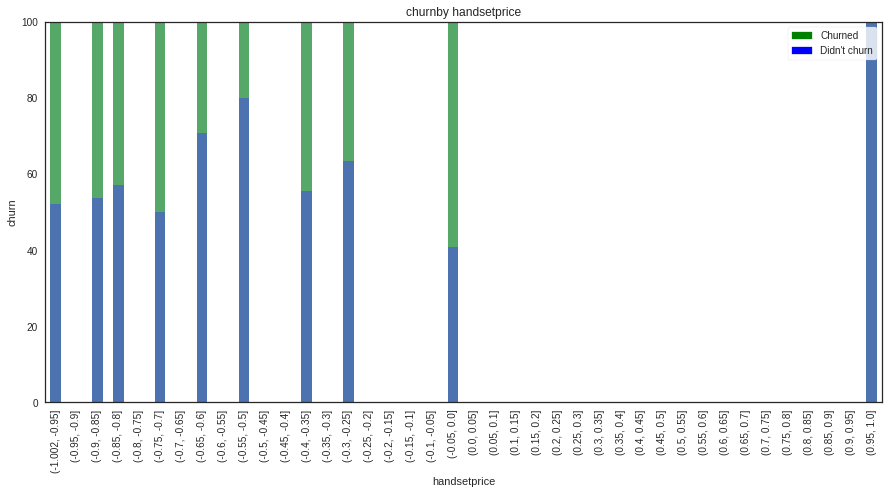

In [550]:
df_bins['handsetprice'] = pd.cut(df_explore['currentHandsetPrice'], bins=40).astype('category')
barplots('handsetprice', 'churn', df_bins)

In [551]:
df_explore['currentHandsetPrice'].describe()

count    725.000000
mean      -0.822293
std        0.286646
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       -0.800045
max        1.000000
Name: currentHandsetPrice, dtype: float64

Most of the values though, fall within the first four bars, where the rate of churn is more or less fity - fifty.

### Searching for features that perform better as polynomials

I am not certain if this is a valid method, but I figured I could compare how features performed on Logistic regression as second and third order polynomials.

In [162]:
for col in continuous_columns:
    
    df_explore[col+'2']=df_explore[col]**2
    df_explore[col+'3']=df_explore[col]**3
    
    print('evaluating:', col)
    
    a=performLogisticRegression(df_explore, [col], folds=20)
    b=performLogisticRegression(df_explore, [col, col+'2'], folds=20)
    c=performLogisticRegression(df_explore, [col, col+'2', col+'3'], folds=20)
    
    if b>a:
        print('Quadratic works better for', col)
        print(a,b)
    elif c>b and c>a:
        print('Cubic works better for', col)
        print(a,c)
    print('\n\n')
    
    

evaluating: age



evaluating: numHandsets



evaluating: handsetAge
Quadratic works better for handsetAge
0.54376018876 0.559205276705



evaluating: currentHandsetPrice



evaluating: avgBill



evaluating: avgMins



evaluating: avgrecurringCharge
Quadratic works better for avgrecurringCharge
0.5171996997 0.540865508366



evaluating: avgOverBundleMins
Quadratic works better for avgOverBundleMins
0.522916130416 0.528551051051



evaluating: avgRoamCalls



evaluating: callMinutesChangePct
Cubic works better for callMinutesChangePct
0.560444015444 0.560483697984



evaluating: billAmountChangePct



evaluating: avgReceivedMins



evaluating: avgOutCalls
Quadratic works better for avgOutCalls
0.5271996997 0.543528528529



evaluating: avgInCalls



evaluating: peakOffPeakRatio



evaluating: peakOffPeakRatioChangePct



evaluating: avgDroppedCalls



evaluating: lifeTime



evaluating: lastMonthCustomerCareCalls





Again, I am not sure if this is even a valid method. Either way, the difference in the results is so slight that it doesn't seem to prove anything.

## Quotients/ratios

### Ratio of average bills to average minutes

It would make sense for this to be a feature. It represents the value that a customer is getting for their money

In [175]:
df_norm['billMinsRatio']=(df_norm['avgBill'] / df_norm['avgMins']+0000.1) 
#add 0.0001 because sometimes avgMins is zero

In [176]:
df_norm[['avgBill','avgMins','billMinsRatio']].head(5)

avgBill  avgMins  billMinsRatio
0  0.197115      1.0       0.297115
1 -0.889423     -1.0       0.989423
2  1.000000      1.0       1.100000
3 -1.000000     -1.0       1.100000
4  1.000000      1.0       1.100000

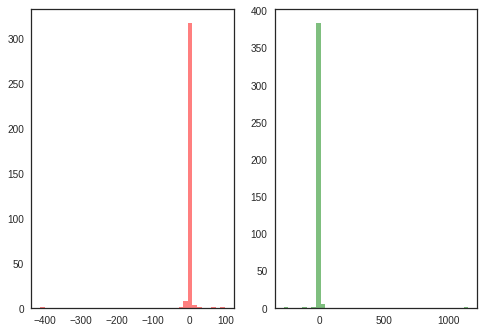

In [178]:
plt.figure()
fig, ax = plt.subplots(1,2)
ax[0].hist(df_norm[df_norm['churn'] == True]['billMinsRatio'], bins=40, alpha=0.5, color='r')
ax[1].hist(df_norm[df_norm['churn'] == False]['billMinsRatio'], bins=40, alpha=0.5, color='g')
plt.show()

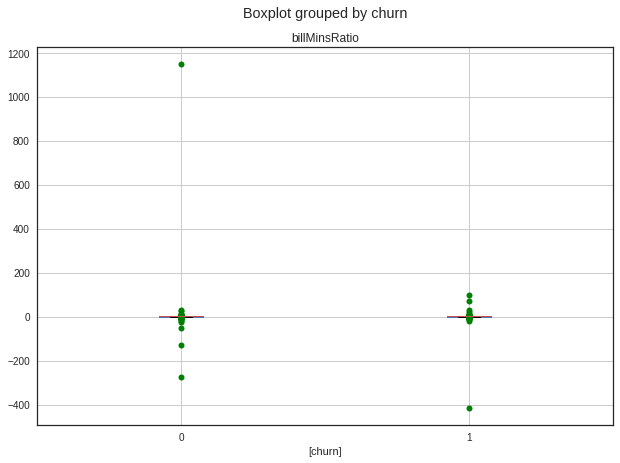

In [177]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')

df_norm.boxplot(column=['billMinsRatio'], by=['churn'], flierprops=flierprops, figsize=(10,7))
plt.show()
plt.clf()

The shapes are very similar, and this feature won't be any good for predicting churn

### Ratio of  current handset price to handset age

This could represent the long term value that a customer has got out of their cell phone

In [179]:
df_explore['priceAgeRatio']=df_explore['currentHandsetPrice']/(df_explore['handsetAge']+0.001)

In [616]:
df_explore['priceAgeRatio'].describe()

count    725.000000
mean       1.198492
std       19.349694
min     -201.150344
25%        0.321299
50%        1.427857
75%        2.358822
max      336.541032
Name: priceAgeRatio, dtype: float64

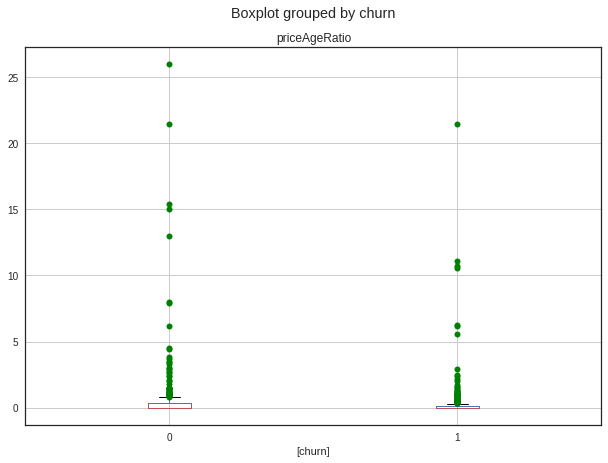

In [180]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')

df_explore.boxplot(column=['priceAgeRatio'], by=['churn'], flierprops=flierprops, figsize=(10,7))
plt.show()
plt.clf()

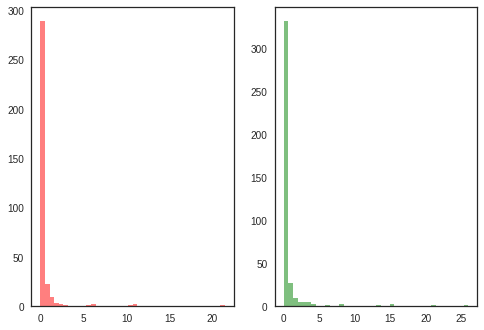

In [181]:
plt.figure()
fig, ax = plt.subplots(1,2)
ax[0].hist(df_explore[df_explore['churn'] == True]['priceAgeRatio'], bins=40, alpha=0.5, color='r')
ax[1].hist(df_explore[df_explore['churn'] == False]['priceAgeRatio'], bins=40, alpha=0.5, color='g')
plt.show()

The boxplot for non-churn seems to contain slightly higher values than for churn. Consdidering the above paired histograms, however, it looks like it will be impossible to predict anything from this feature.

### I am not going to bother training models on these features

# Conclusion 

I wasn't able to produce a model that would perform significantly better than the baseline one. Although, from my classmates. I heard rumours of there being a 'weak signal' in the data, I wasn't able to find it. It has started to feel like an exercise in futility, and I am going to stop now.

Overall, my best model was my first combined model, trained on the features selected by the genetic algorithm, on a clamped and normalized dataframe. It achieved 0.59 accuracy. However, this is only slightly above the accuracy of my base model, and in truth I believe it to be just a lucky result.

Given this, I don't feel as if I've actually haven't found anything 'predictive' in my dataset at all. I feel as if this dataset has provided a somewhat harsh introduction to the reality of data analytics. I am eager to learn more, but afraid that it will prove very difficult.

In homework one, I believe I wrote something to the effect that a machine learning algorithm would be able to (almost magically) pick up on underlying structures in the dataset. Well, my Random Forest model was able to do this, but only on data that it had seen before. When presented with new data, it returned predictions that were no better than the base model.

I read the case study for this assignment in the course book, and learned that an analyst found a relatively simple solution to the  dataset by training a decision tree. This did not work for me.

I think, if anything, this assignment has worked to dispell the allure of 'dark magic' that sometimes surrounds machine learning in the contemporary media discourse (e.g Cambridge Analytica). There is no magic. Machine learning is hard work.